<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Titanic Survival Prediction: Advanced Ensemble ML Models for Improved Accuracy
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Decision Tree - Random Forest - AdaBoost - Gradient - XGBoost - LightBoost - CatBoost - Stacking</font></h2>

---
    
<p align="right">
  Duygu Jones | Data Scientist  | Aug 2024 
    <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>


## <font color=#20a0ff> <b>Project Description</b><font>

 The goal of this project is to build a predictive model that identifies the characteristics and conditions associated with a higher likelihood of survival.   
 The Titanic disaster revealed that survival was influenced by a range of factors, such as class, age, and gender.    
 Using the available passenger data, the project aims to predict who was more likely to survive based on passenger information.  

    
 This is my first Kaggle competition, and I'm starting with the Titanic dataset. This well-known dataset offers a great opportunity to delve into advanced machine learning techniques.   
 If you have any suggestions for improving this notebook, please comment or fork it to try your own ideas. If you any question, feel free to ask.

### <font color=#20a0ff> <b>About the Dataset</b><font>
    
The sinking of the Titanic is one of the most well-known maritime disasters in history. 

 The RMS Titanic was a British ship that sank on April 15, 1912, after hitting an iceberg during its maiden voyage. Despite being known for its luxury and being deemed “unsinkable,” the ship lacked enough lifeboats for all passengers. This tragic disaster resulted in the deaths of over 1,500 people out of 2,224 on board.
The Titanic dataset includes details about the passengers, such as their age, class, and whether they survived.  
    
 *The Titanic dataset is commonly used to train and evaluate machine learning models for predicting survival outcomes, making it ideal for classification tasks in data science.*
    
    
- **Dataset:** Titanic Dataset  
- **Content:** Data on various attributes of Titanic passengers, including demographic and ticket information.  
- **Number of Rows:** 891  
- **Number of Columns:** 12 (11 features + 1 class label)  

| **INPUTS**         | **Description**                                                                                       |
|--------------------|-------------------------------------------------------------------------------------------------------|
| **PassengerId**    | Unique identifier for each passenger.                                                                 |
| **Pclass**         | Passenger class (1, 2, or 3).                                                                         |
| **Name**           | Name of the passenger.                                                                               |
| **Sex**            | Gender of the passenger (male or female).                                                             |
| **Age**            | Age of the passenger in years.                                                                        |
| **SibSp**          | Number of siblings or spouses aboard the Titanic.                                                     |
| **Parch**          | Number of parents or children aboard the Titanic.                                                     |
| **Ticket**         | Ticket number of the passenger.                                                                       |
| **Fare**           | Fare paid by the passenger.                                                                          |
| **Cabin**          | Cabin number where the passenger stayed.                                                              |
| **Embarked**       | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).                                 |
| **Survived**       | Categorical variable representing the survival status (0 = No, 1 = Yes).                              |


**Reference:**
 Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic

**Table of Contents**

1. <a href='#eda'>EXPLORATORY DATA ANALYSIS (EDA)</a>
   - 1.1 <a href='#basic-statistics'>Basic Statistics</a>
   - 1.2 <a href='#duplicated-values'>Duplicated Values</a>
   - 1.3 <a href='#missing-values'>Missing Values</a>
   - 1.4 <a href='#distributions'>Distributions</a>
   - 1.5 <a href='#featureeng'>Feature Engineering</a>
2. <a href='#machine-learning'>MACHINE LEARNING</a>
   - 2.1 <a href='#data-preprocessing'>Data Preprocessing</a>
   - 2.2 <a href='#decisiontree'>Decision Tree Classification</a>
   - 2.3 <a href='#randomforest'>Random Forest Classification</a>
   - 2.4 <a href='#adaboost'>AdaBoost Classification</a>
   - 2.5 <a href='#gradient'>Gradient Boosting Classification</a>
   - 2.6 <a href='#xgboost'>XGBoost Classification</a>
   - 2.7 <a href='#lightboost'>LightBoost Classification</a>
   - 2.8 <a href='#catboost'>CatBoost Classification</a>
   - 2.9 <a href='#stacking'>Stacking Classification</a>
   - 2.10 <a href='#comparing-models'>Comparing All the Models</a>
   - 2.11 <a href='#conclusion'>Conclusion</a>
   - 2.12 <a href='#final-model'>Final Model and Submission</a>
   

<a id='eda'></a>
# EXPLORATORY DATA ANALYSIS (EDA)

## Import and Load

In [1]:
!pip install scikit-learn lightgbm xgboost lazypredict yellowbrick

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from yellowbrick.classifier import PrecisionRecallCurve, ClassPredictionError, ROCAUC
from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test["PassengerId"] # will be used for submission prediction

# train + test data all together
df0 = pd.concat([train,test], sort=False).reset_index(drop=True) 
df = df0.copy()

In [4]:
# gender submission will be used to evaluate the model performance
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<a id='basic-statistics'></a>
## Understanding the the Data

![](https://upload.wikimedia.org/wikipedia/commons/3/33/Titanic_sinking_gif.gif)

In [8]:
# Display df.shape, duplicate and misisng values count

print(f'Data shape (rows, columns): {df.shape}')
print(f'Number of duplicate rows: {df.duplicated().sum()}')
print(f'Number of missing values: {df.isnull().sum().sum()}')

Data shape (rows, columns): (1309, 12)
Number of duplicate rows: 0
Number of missing values: 1698


In [9]:
# Summary of Categorical Features

def object_summary(df):
    obs = df.shape[0]
   
    object_df = df.select_dtypes(include='object')
    summary_df = pd.DataFrame({
        'Dtype': object_df.dtypes,
        'Counts': object_df.apply(lambda x: x.count()),
        'Nulls': object_df.apply(lambda x: x.isnull().sum()),
        'NullPercent': (object_df.isnull().sum() / obs) * 100,
        'Top': object_df.apply(lambda x: x.mode()[0] if not x.mode().empty else '-'),
        'Frequency': object_df.apply(lambda x: x.value_counts().max() if not x.value_counts().empty else '-'),
        'Uniques': object_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': object_df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')
    })
    
    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')
    print('Categorical Features Summary:')
    
    return summary_df

object_summary(df)

___________________________
Data Types:
Dtype
object    5
Name: count, dtype: int64
___________________________
Categorical Features Summary:


Dtype  Counts  Nulls  NullPercent                   Top  Frequency  \
Name      object    1309      0     0.000000  Connolly, Miss. Kate          2   
Sex       object    1309      0     0.000000                  male        843   
Ticket    object    1309      0     0.000000              CA. 2343         11   
Cabin     object     295   1014    77.463713           C23 C25 C27          6   
Embarked  object    1307      2     0.152788                     S        914   

          Uniques    UniqueValues  
Name         1307               -  
Sex             2  [male, female]  
Ticket        929               -  
Cabin         187               -  
Embarked        4  [S, C, Q, nan]

In [10]:
# Summary of Numeric Features 

def numeric_summary(df):
    obs = df.shape[0]
    
    numeric_df = df.select_dtypes(include='number')
    summary_df = pd.DataFrame({
        'Dtype': numeric_df.dtypes, 
        'Counts': numeric_df.apply(lambda x: x.count()), 
        'Nulls': numeric_df.apply(lambda x: x.isnull().sum()), 
        'NullPercent': (numeric_df.isnull().sum() / obs) * 100,
        'Min': numeric_df.min(),
        'Max': numeric_df.max(),
        'Uniques': numeric_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': numeric_df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')
    })
    
    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')
    print('Numreical Features Summary:')
    
    return summary_df


numeric_summary(df)

___________________________
Data Types:
Dtype
int64      4
float64    3
Name: count, dtype: int64
___________________________
Numreical Features Summary:


Dtype  Counts  Nulls  NullPercent   Min        Max  Uniques  \
PassengerId    int64    1309      0     0.000000  1.00  1309.0000     1309   
Survived     float64     891    418    31.932773  0.00     1.0000        3   
Pclass         int64    1309      0     0.000000  1.00     3.0000        3   
Age          float64    1046    263    20.091673  0.17    80.0000       99   
SibSp          int64    1309      0     0.000000  0.00     8.0000        7   
Parch          int64    1309      0     0.000000  0.00     9.0000        8   
Fare         float64    1308      1     0.076394  0.00   512.3292      282   

                         UniqueValues  
PassengerId                         -  
Survived              [0.0, 1.0, nan]  
Pclass                      [3, 1, 2]  
Age                                 -  
SibSp           [1, 0, 3, 4, 2, 5, 8]  
Parch        [0, 1, 2, 5, 3, 4, 6, 9]  
Fare                                -

<a id='distributions'></a>
## Distributions

In [11]:
# Columns list
categoricals = df.select_dtypes(include='object').columns
numericals = df.select_dtypes(include=['int64','float64']).columns

# Numerical and Categorial Dataframes to use later
cat_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(include='number')

print('Categoricals:', list(categoricals))
print('---------------------------')
print('Numericals:',list(numericals))

Categoricals: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
---------------------------
Numericals: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
cat_df.head(3)

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S

In [13]:
num_df.head(3)

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1       0.0       3  22.0      1      0   7.2500
1            2       1.0       1  38.0      1      0  71.2833
2            3       1.0       3  26.0      0      0   7.9250

In [14]:
# Fonction for counting and percentage values in the each column

def get_value_count(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='percent')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['percent']], axis=1)
    
    return df_result

### Target Feature: `Survived` 

- 0: The passenger did not survive (deceased).
- 1: The passenger survived (alive).


In [15]:
get_value_count(df, 'Survived') # Total Number of values and percentage (Unbalanced Data)

Survived  counts   percent
0       0.0     549  0.616162
1       1.0     342  0.383838

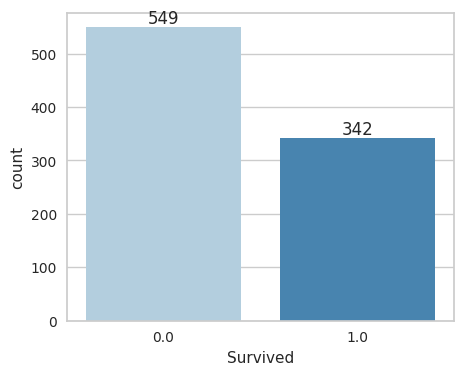

In [16]:
plt.figure(figsize=(5,4))
ax = sns.countplot( data=df, x="Survived", palette='Blues')

ax.bar_label(ax.containers[0])
plt.show()

### Categorical Features

- `Pclass`, `Embarked`, `Sex`, `Parch`, and `SibSp`, represent distinct groups or categories, allowing us to effectively visualize and compare their distributions across the train and test datasets.

In [17]:
# Function to plot distributions in both the train and test datasets for comparison.

def plot_train_test_dist(features, train_df, test_df):
    fig, axes = plt.subplots(len(features), 2, figsize=(18, len(features) * 5))
    axes = axes.flatten()
    
    for i, cat in enumerate(features):
        # Train data
        sns.countplot(x=cat, data=train_df, palette='Blues', ax=axes[i*2])
        total_train = len(train_df[cat])
        
        for p in axes[i*2].patches:
            height = p.get_height()
            axes[i*2].text(p.get_x() + p.get_width() / 2.,
                           height + 0.02 * total_train,
                           '{:1.2f}%'.format((height / total_train) * 100),
                           ha="center",
                           fontsize=15)  # Reduced font size
        
        axes[i*2].set_xlabel(f'Train Data: {cat}', fontsize=14)
        axes[i*2].set_ylabel('Count', fontsize=15)
        axes[i*2].tick_params(axis='x', labelsize=15)
        axes[i*2].tick_params(axis='y', labelsize=15)
    
        # Test data
        sns.countplot(x=cat, data=test_df, palette='Greens', ax=axes[i*2+1])
        total_test = len(test_df[cat])
        
        for p in axes[i*2+1].patches:
            height = p.get_height()
            axes[i*2+1].text(p.get_x() + p.get_width() / 2.,
                             height + 0.02 * total_test,
                             '{:1.2f}%'.format((height / total_test) * 100),
                             ha="center",
                             fontsize=15)  # Reduced font size
        
        axes[i*2+1].set_xlabel(f'Test Data: {cat}', fontsize=14)
        axes[i*2+1].set_ylabel('Count', fontsize=15)
        axes[i*2+1].tick_params(axis='x', labelsize=15)
        axes[i*2+1].tick_params(axis='y', labelsize=15)
    
    plt.tight_layout()
    plt.show()

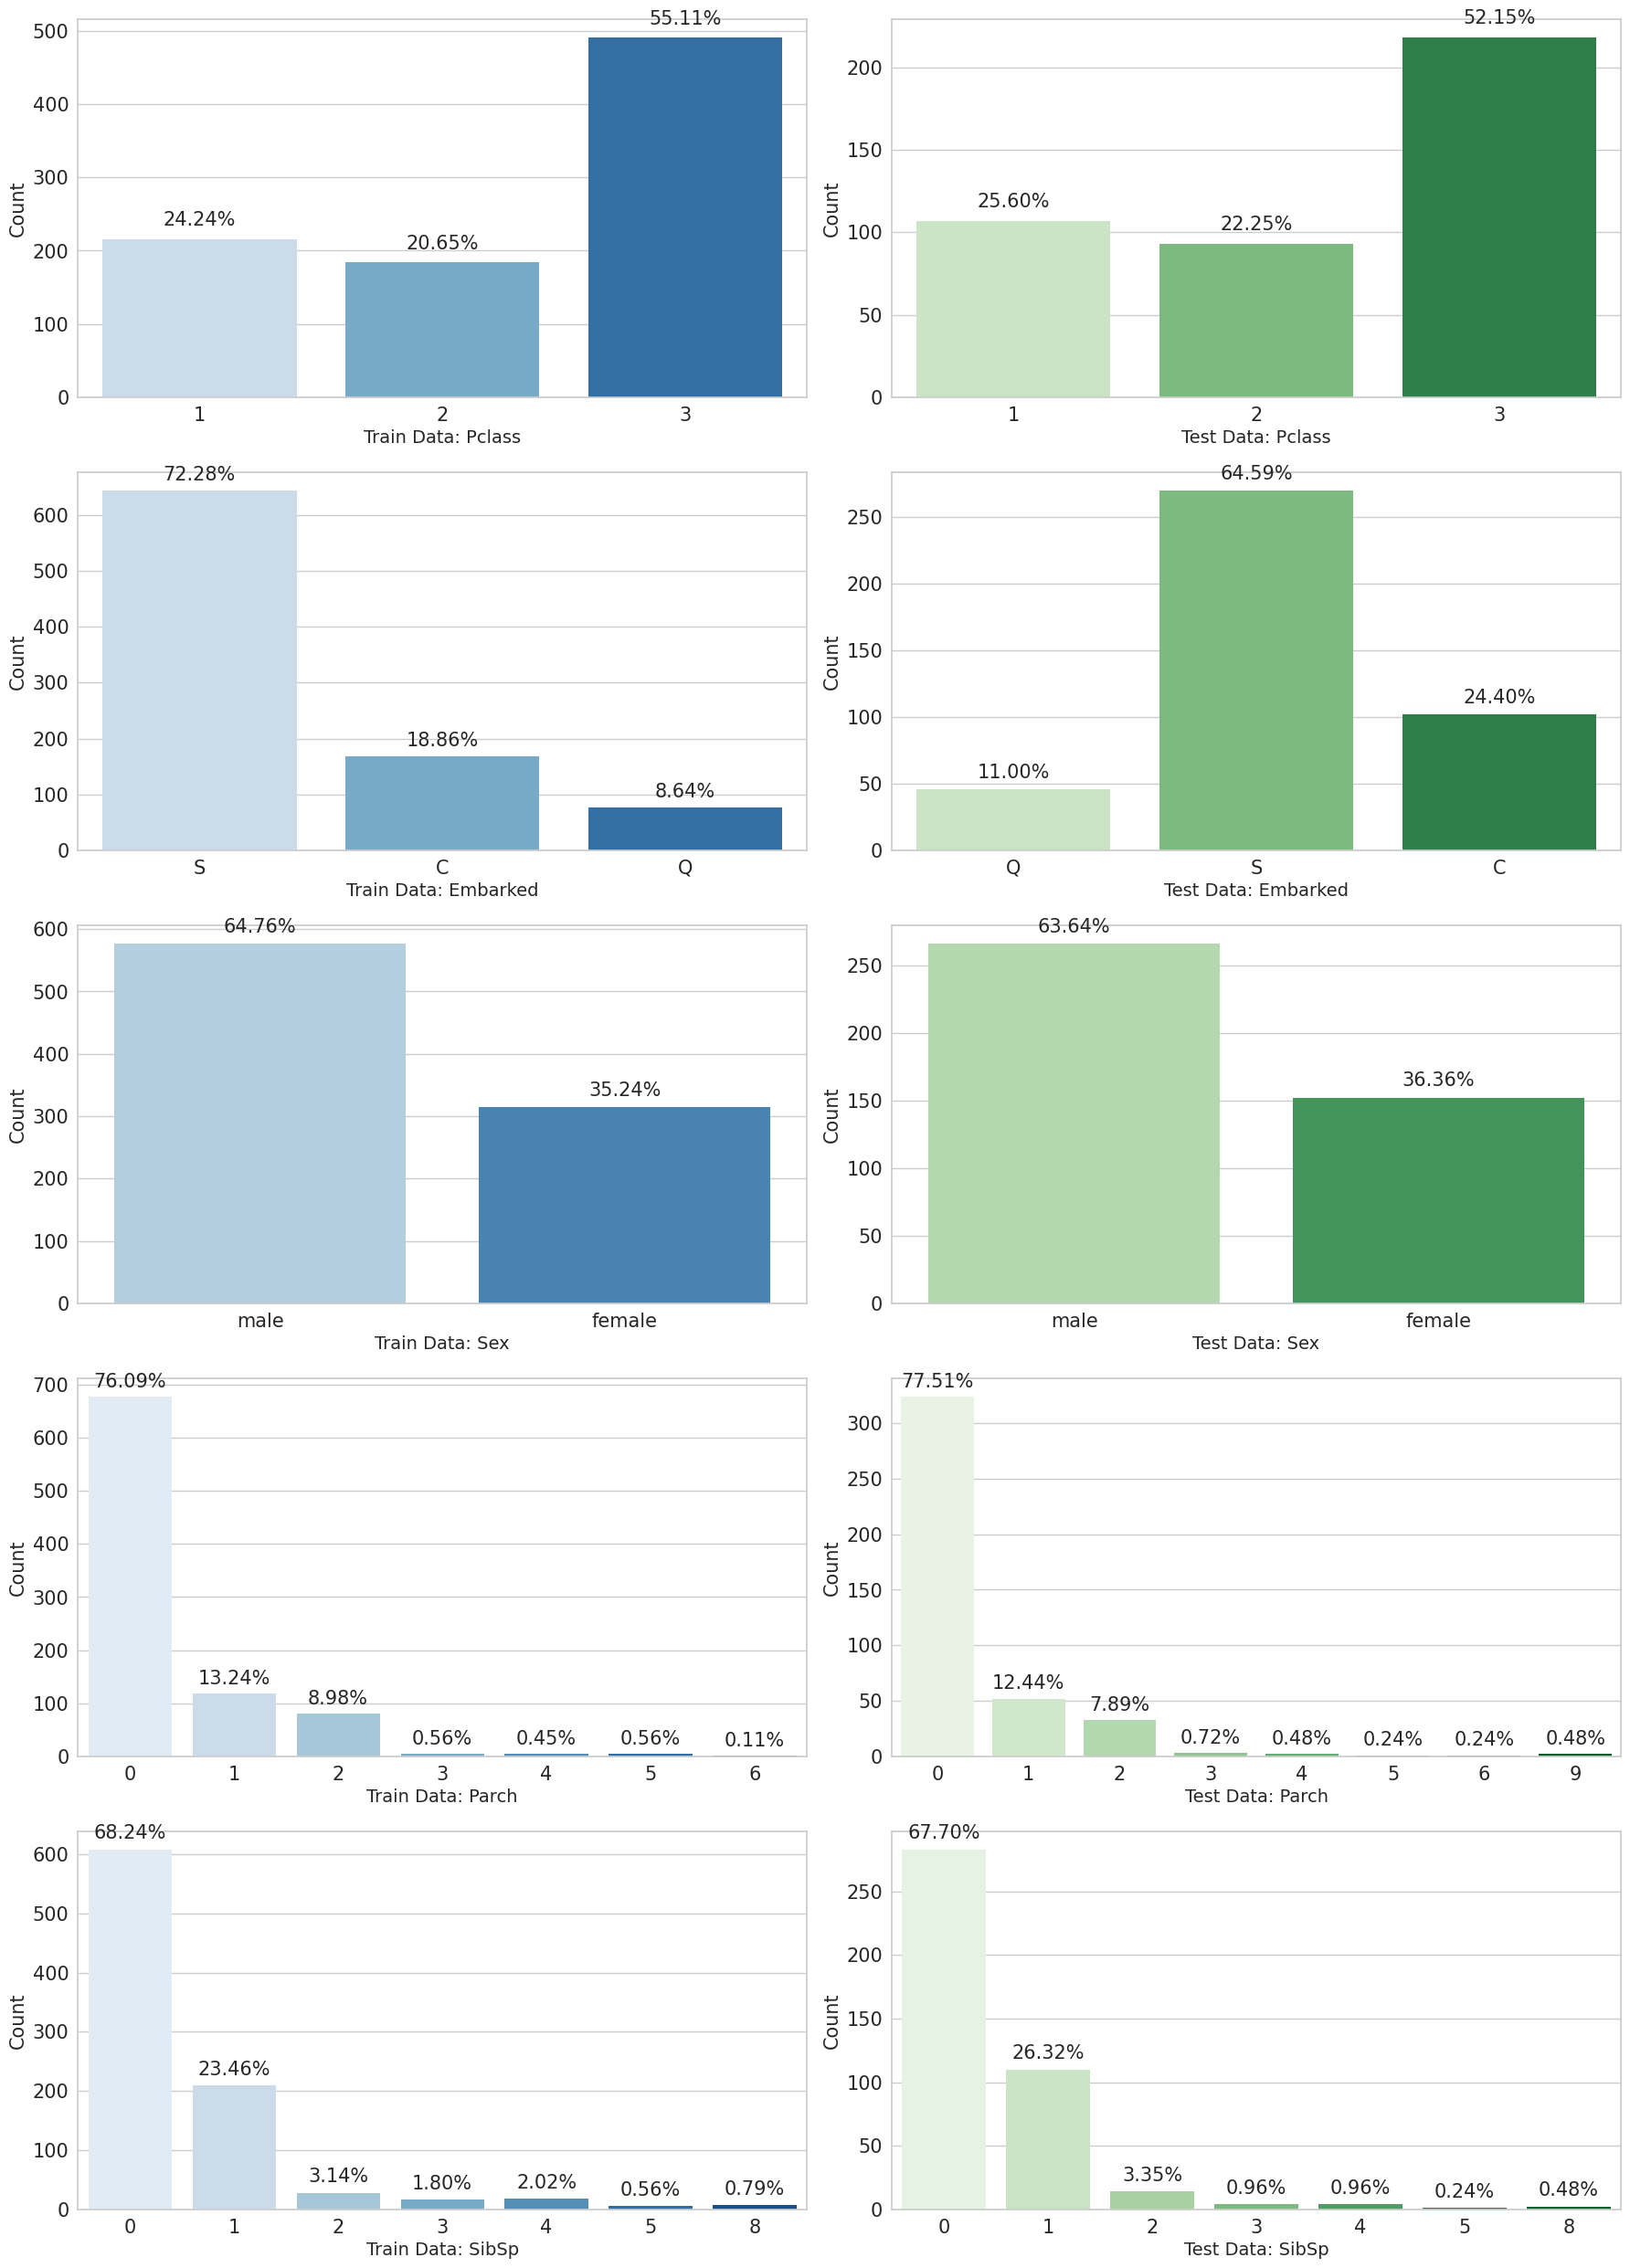

In [18]:
# Categorical Features to plot
cat_features = ['Pclass', 'Embarked', 'Sex', 'Parch', 'SibSp']

# Call the function with train and test datasets
plot_train_test_dist(cat_features, train, test)

**Overall:**

- The distributions of key features such as `Pclass`, `Embarked`, `Sex`, `Parch`, and `SibSp` are largely consistent between the train and test datasets, which suggests that a model trained on the training data should generalize well to the test data. 
- Minor differences, particularly in the proportions of embarkation points and passenger classes, could introduce slight variations in model performance. 
- However, the overall similarity between the datasets reduces the risk of the model encountering unexpected patterns, making it likely to perform reliably on the test data.

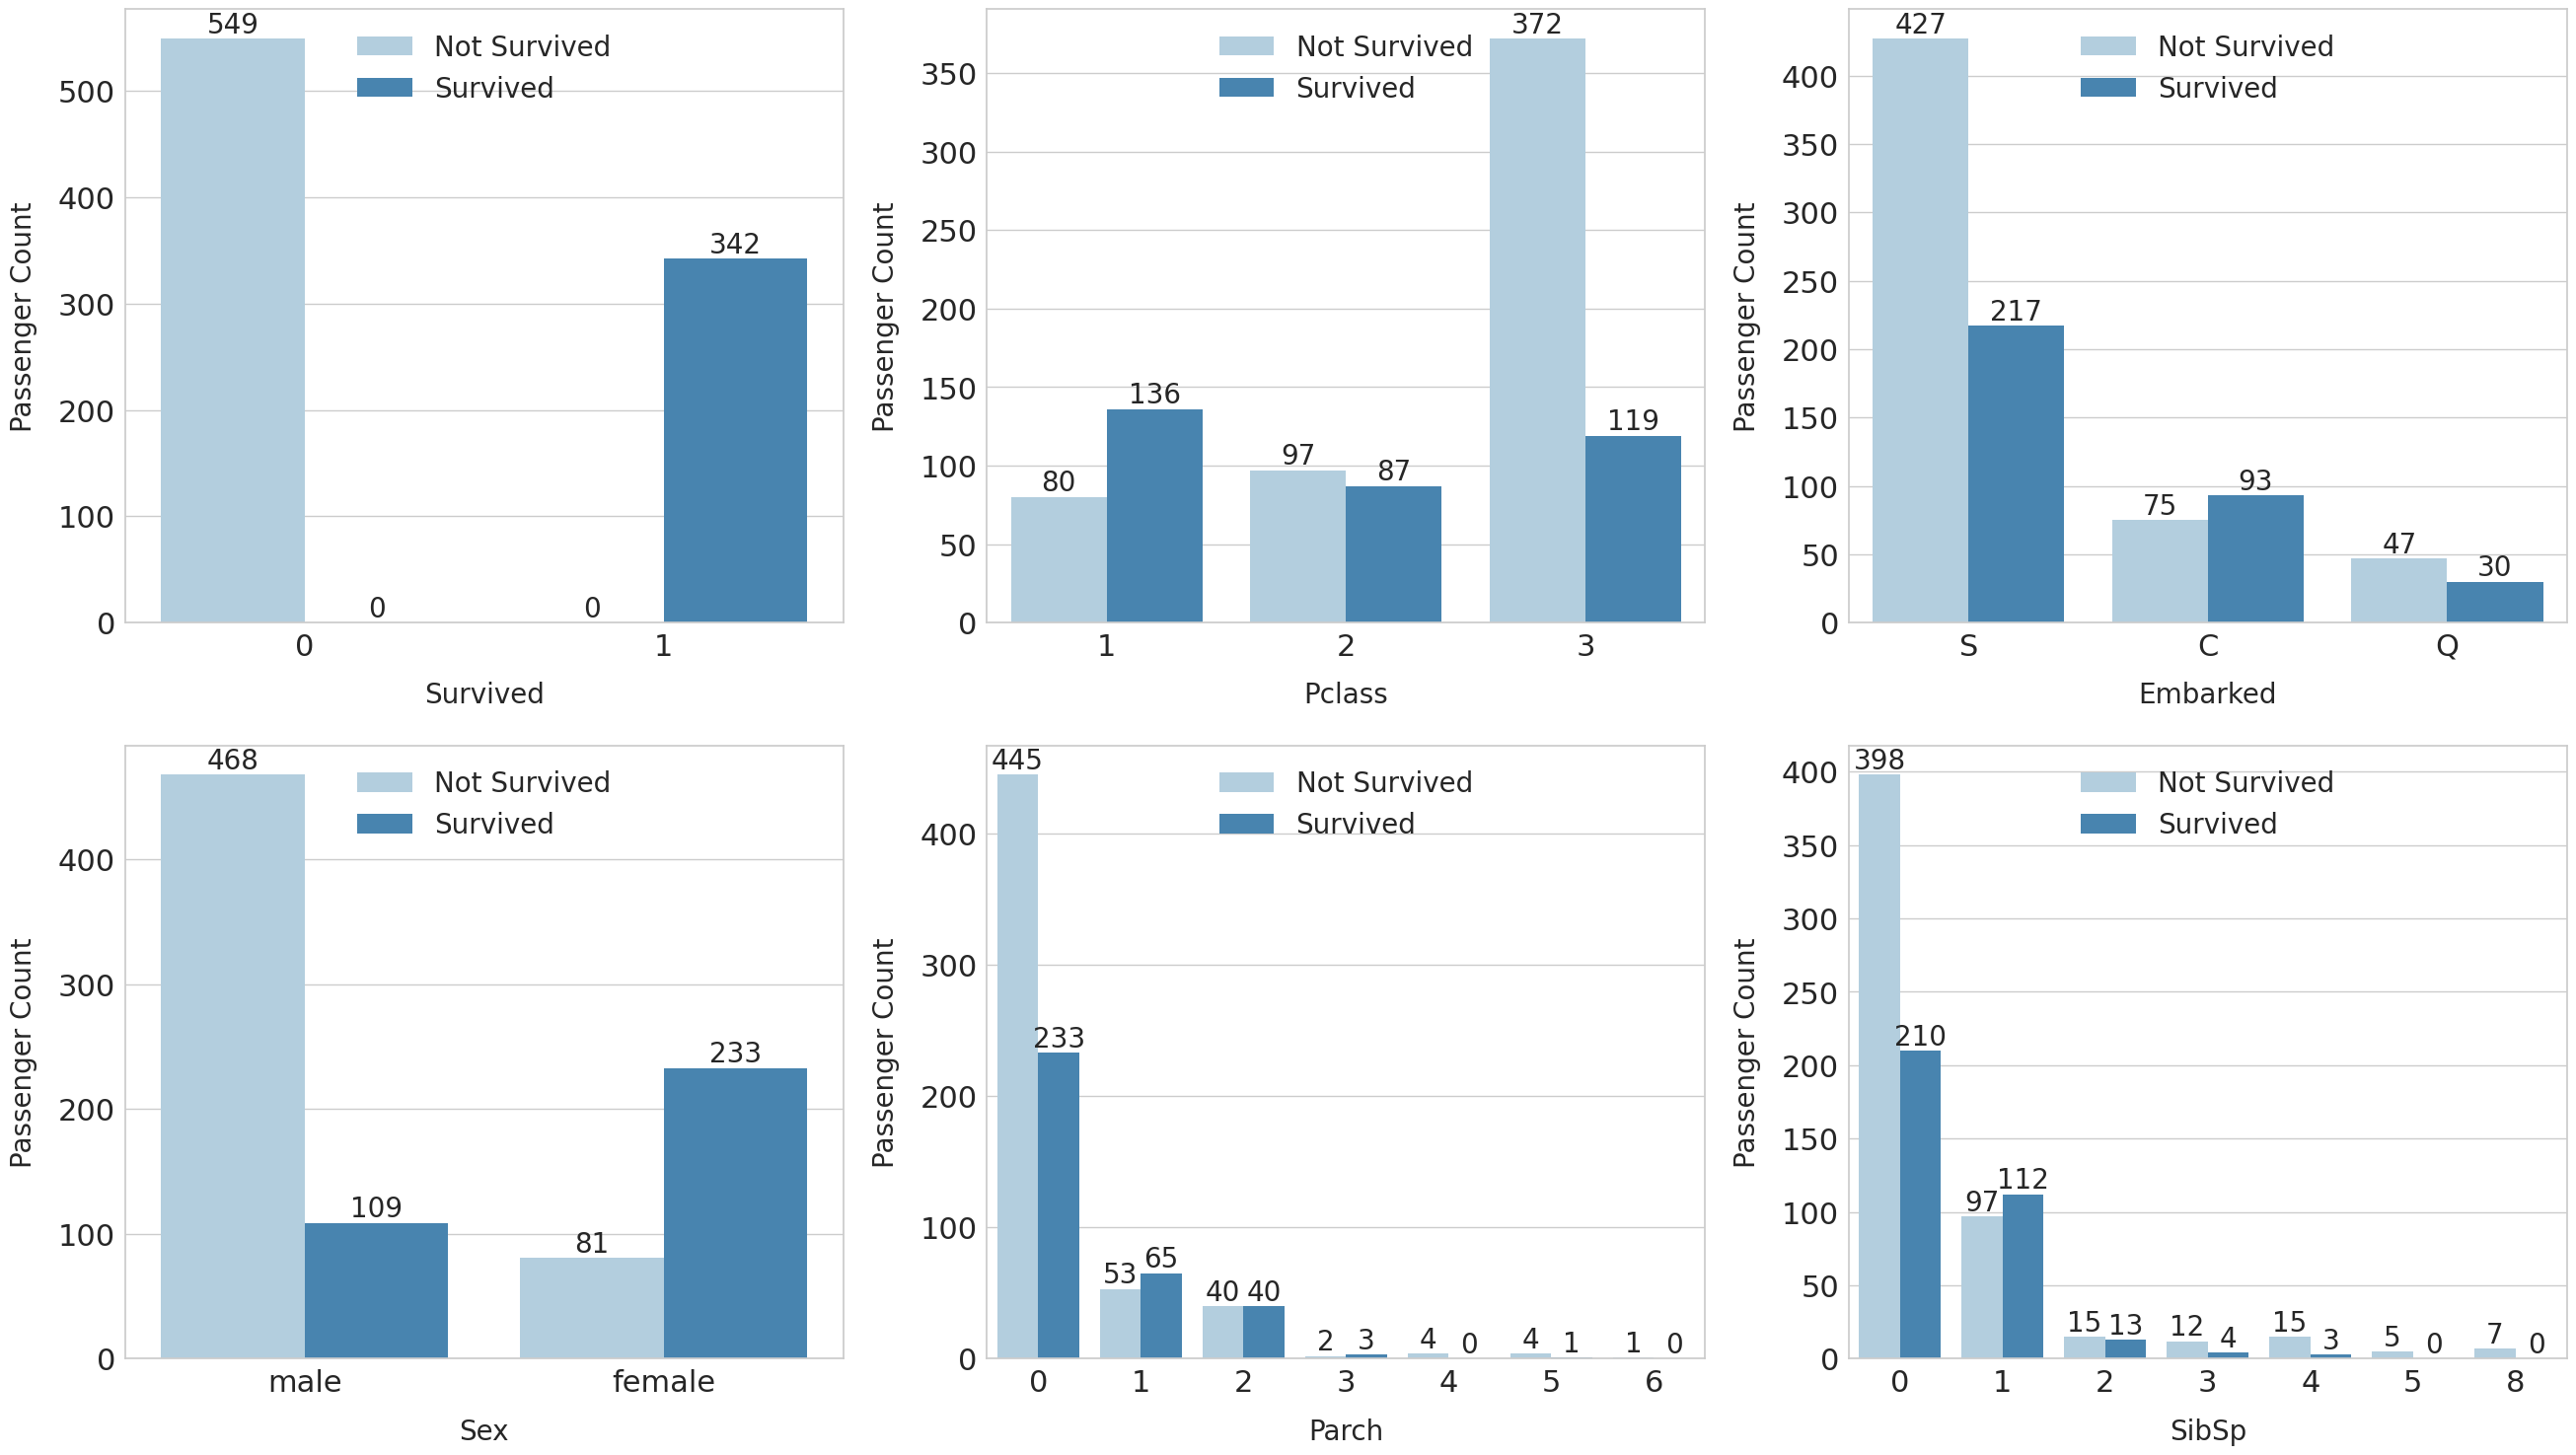

In [19]:
# Distribution of the Categorical Features by Target (Train Data)

features = ['Survived','Pclass', 'Embarked','Sex', 'Parch', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(18, 12))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(features, 1):
    ax = plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train, palette='Blues', ax=ax)
    
    # Adding labels and formatting
    ax.set_xlabel(feature, size=20, labelpad=15)
    ax.set_ylabel('Passenger Count', size=20, labelpad=15)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    ax.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 20})
    
    # Adding count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=20)

plt.show()

**Analysis**

1. **Survival Rates**: Approximately 62% of the passengers did not survive, while around 38% did survive.

2. **Passenger Class (Pclass)**: The majority of the passengers were in the third class. There is a clear trend showing that passengers in the first class had a higher survival rate compared to those in the second and third classes.

3. **Gender (Sex)**: Females had a significantly higher survival rate than males. Most of the male passengers did not survive, while the majority of female passengers did.

4. **Embarkation Point (Embarked)**: Most passengers boarded the ship in Southampton (S). Passengers who boarded at Cherbourg (C) had a relatively higher survival rate compared to those who boarded at Southampton (S) and Queenstown (Q).

5. **Siblings/Spouses Aboard (SibSp)**: Passengers traveling alone (SibSp = 0) had a lower survival rate compared to those with 1 or 2 siblings/spouses aboard. However, having more than 2 siblings/spouses aboard did not increase the chances of survival.

6. **Parents/Children Aboard (Parch)**: Similar to SibSp, passengers with no parents/children aboard (Parch = 0) had a lower survival rate. Those with 1 or 2 parents/children aboard had a better chance of survival, while having more did not provide additional benefits.

**Overall:**
- The survival on the Titanic was strongly influenced by the passenger's class, gender, and who they were traveling with. 
- First-class passengers and females had a higher likelihood of survival. 
- Passengers who embarked at Cherbourg also had a better chance of survival. 
- Traveling with a small number of family members slightly increased survival chances, but the effect diminished with larger families.

### Continues Features

- The continuous features in the Titanic dataset, such as `Age` and `Fare`, represent numerical data that can take on a wide range of values, capturing detailed information about passengers' age and the price they paid for their tickets, which may correlate with survival outcomes.

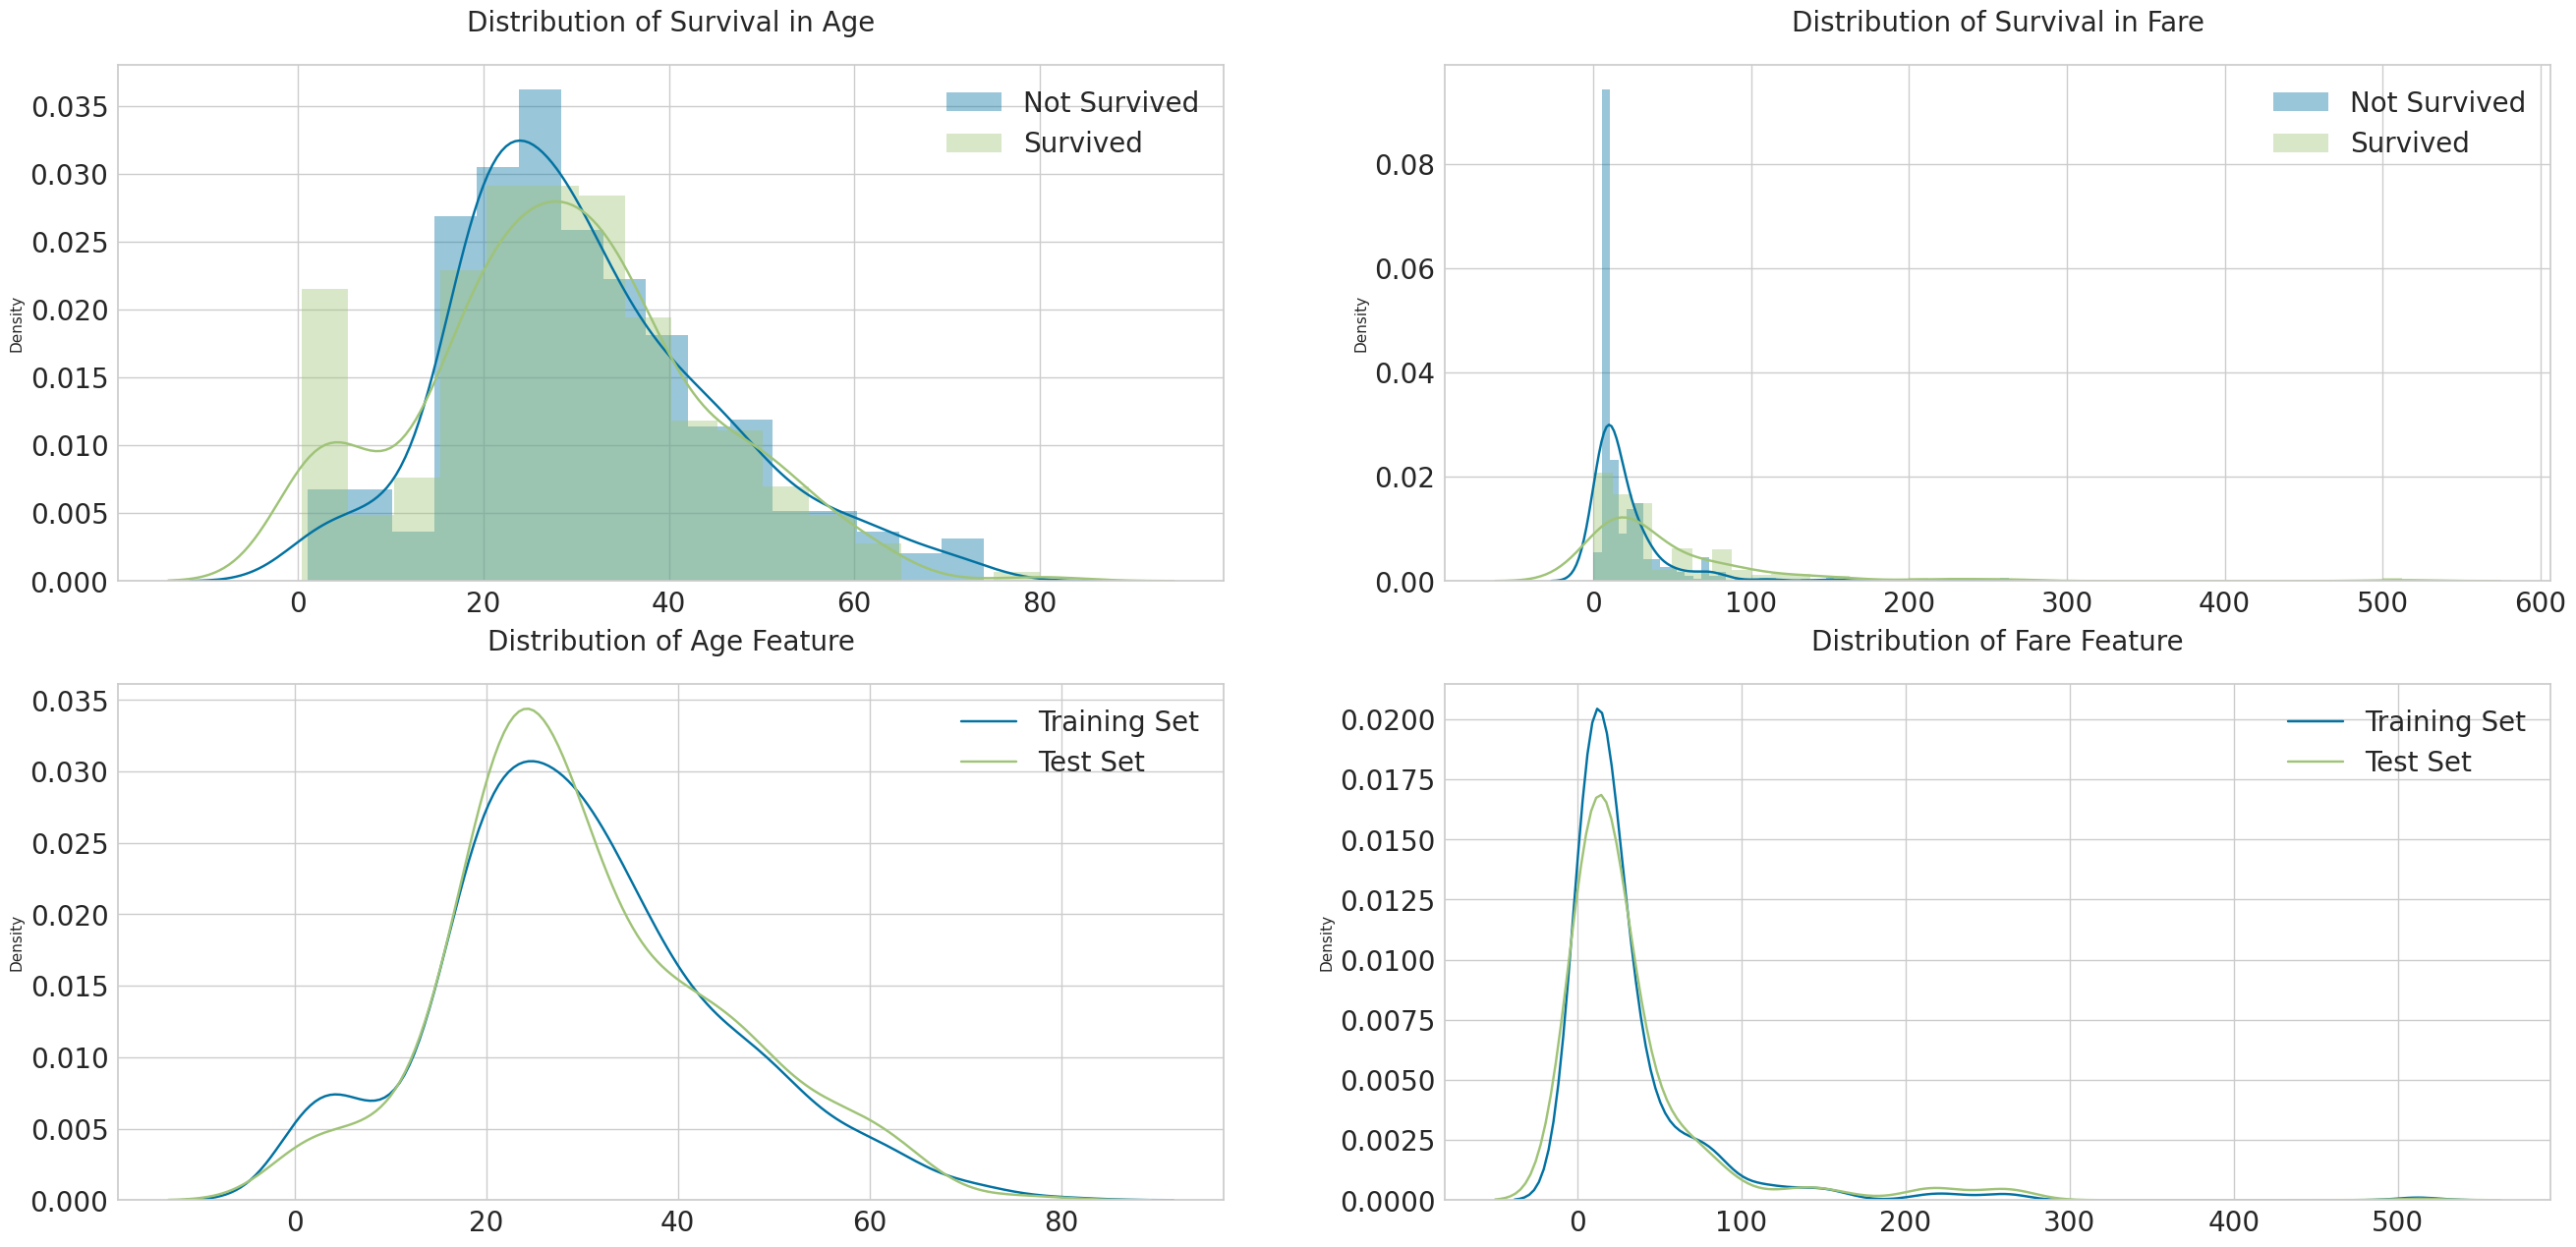

In [20]:
# Distribution of Age and Fare Features 

cont_features = ['Age', 'Fare']
surv = train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 15))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(train[~surv][feature], label='Not Survived', hist=True,  ax=axs[0][i])
    sns.distplot(train[surv][feature], label='Survived', hist=True,  ax=axs[0][i])

    # Distribution of feature in dataset
    sns.distplot(train[feature], label='Training Set', hist=False, ax=axs[1][i])
    sns.distplot(test[feature], label='Test Set', hist=False,  ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

**Analysis:**

1. **Age and Survival**:
   - Younger passengers, particularly those aged 0-10, had a higher survival rate. Survival rates decrease with age, especially in the 20-40 age range.

2. **Fare and Survival**:
   - Passengers who paid lower fares (especially in the 0-50 range) had lower survival rates, whereas those who paid higher fares had higher survival rates. This suggests that higher fare tickets might be associated with better access to lifeboats or other safety measures.

3. **Train vs. Test Set Distributions**:
   - The distributions of **Age** and **Fare** in the training and test sets are quite similar, which is beneficial for the model's generalization ability. If the distributions were significantly different, the model might struggle to perform well on the test data due to overfitting to the training data's distribution.

<a id='missing-values'></a>
## Missing Values


- Training dataset have missing values in `Age`, `Cabin` and `Embarked` columns
- Test dataset have missing values in `Age`, `Cabin` and `Fare` columns
- > *After filling the missing values in the `Age`, `Embarked`, `Fare`, and `Deck` features, no missing values remain in either the training or test sets.* 
- > *The `Cabin` feature has been dropped since the `Deck` feature was extracted from it.*

---

**Why We Use Train Data to Impute Missing Values in Test Data?**
- **Consistency**: This approach ensures that the `test` dataset does not "learn" from itself, which could lead to data leakage. Instead, the `test` dataset uses the median values calculated from the `train` dataset to fill in missing values, maintaining consistency between the datasets.
- **Preventing Data Leakage**: By not calculating median values directly from the `test` dataset, we prevent the model from potentially being biased by information that should be unknown during training, thereby avoiding data leakage.
- **Group-based Imputation**: Filling missing values based on groups (example: `Sex` and `Pclass`) allows the imputation to reflect the relationships observed in the data, leading to more accurate and meaningful imputations.
---

In [21]:
# Function for Null Values and Their Percentages

def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

In [22]:
# Train dataset
missing_values(train)

count  percentage
PassengerId      0        0.00
Survived         0        0.00
Pclass           0        0.00
Name             0        0.00
Sex              0        0.00
Age            177       19.87
SibSp            0        0.00
Parch            0        0.00
Ticket           0        0.00
Fare             0        0.00
Cabin          687       77.10
Embarked         2        0.22

In [23]:
# Test dataset
missing_values(test)

count  percentage
PassengerId      0        0.00
Pclass           0        0.00
Name             0        0.00
Sex              0        0.00
Age             86       20.57
SibSp            0        0.00
Parch            0        0.00
Ticket           0        0.00
Fare             1        0.24
Cabin          327       78.23
Embarked         0        0.00

- Training dataset have missing values in `Age`, `Cabin` and `Embarked` columns
- Test dataset have missing values in `Age`, `Cabin` and `Fare` columns

### Missing Values on `Age` Column (Train-Test Data)

- Filling the missing values in `Age` column based on `Sex` and `Pclass` because these factors significantly influence a passenger's age distribution. 
- The data shows that median ages differ notably across different combinations of `Sex` and `Pclass`: wealthier, older individuals were more likely to be in higher classes (e.g., 1st class), while younger passengers, often in families or immigrants, were more prevalent in lower classes (e.g., 3rd class). 
- Also, within each class, women tend to be slightly younger than men.

*By using `Sex` and `Pclass` to fill in missing ages, we ensure the imputed values reflect the real patterns in the data.*

In [24]:
# Corr: Age vs other Features

df_corr = num_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr[df_corr['level_0'] == 'Age']

level_0      level_1         0
5      Age          Age  1.000000
9      Age       Pclass  0.408106
18     Age        SibSp  0.243699
22     Age         Fare  0.178740
25     Age        Parch  0.150917
30     Age     Survived  0.077221
42     Age  PassengerId  0.028814

In [25]:
# Median of age by pclass-sex
df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [26]:
# Calculate the median Age values for each group in the train dataset
age_medians = train.groupby(['Sex', 'Pclass'])['Age'].median()
print(age_medians)

# Fill missing Age values in the train dataset using the group-specific median
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
print('\nMissing values on the train dataset:',train["Age"].isnull().sum() )

# Fill missing Age values in the test dataset using the median values calculated from the train dataset
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(age_medians[(x.name[0], x.name[1])]))
print('Missing values on the test dataset:',test["Age"].isnull().sum() )

# Print a confirmation message
print("\nAge missing values filled in both Train and Test dataset using the median values calculated from the Train dataset.")

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

Missing values on the train dataset: 0
Missing values on the test dataset: 0

Age missing values filled in both Train and Test dataset using the median values calculated from the Train dataset.


### Missing Values on `Cabin` Column (Train-Test Data)

- The `Decks` feature was created by extracting the first letter of each `Cabin` value.
- Most missing Cabin values are found among third-class passengers (Pclass = 3) in both the train and test datasets as many of them didn't have assigned cabins.
- Missing `Deck` values were assigned based on `Pclass`, with 1st class passengers grouped into `ABC`, 2nd class into `DE`, and 3rd class into `FG`.
- Alternatively, o fill these missing values, could use strategies such as imputing based on `Fare`, since higher fares are linked to specific decks, or using the `Ticket` number, where passengers sharing the same ticket often had similar or adjacent cabins.



In [27]:
# Missing Values in the Cabin Column in the Train Data

cabin_null_train = train[train['Cabin'].isnull()]
print('Cabin Null Values of Train Data:', cabin_null_train.shape)
cabin_null_train.head()

Cabin Null Values of Train Data: (687, 12)


PassengerId  Survived  Pclass                            Name     Sex  \
0            1         0       3         Braund, Mr. Owen Harris    male   
2            3         1       3          Heikkinen, Miss. Laina  female   
4            5         0       3        Allen, Mr. William Henry    male   
5            6         0       3                Moran, Mr. James    male   
7            8         0       3  Palsson, Master. Gosta Leonard    male   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0  22.0      1      0         A/5 21171   7.2500   NaN        S  
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4  35.0      0      0            373450   8.0500   NaN        S  
5  25.0      0      0            330877   8.4583   NaN        Q  
7   2.0      3      1            349909  21.0750   NaN        S

In [28]:
# Missing Values in the Cabin Column in the Test Data

cabin_null_test = test[test['Cabin'].isnull()]
print('Cabin Null Values of Test Data:', cabin_null_test.shape)
cabin_null_test.head()

Cabin Null Values of Test Data: (327, 11)


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

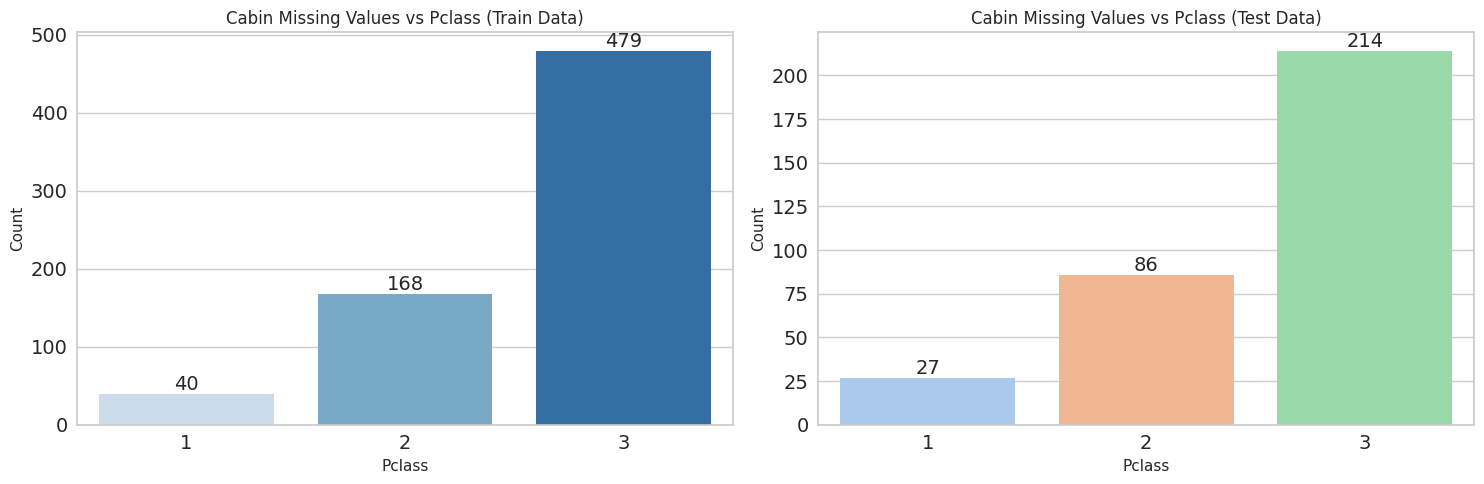

In [29]:
# Let's investigate the Cabin Missing Values and Pclass Values;

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for train dataset
sns.countplot(x=train[train['Cabin'].isnull()]['Pclass'], palette='Blues', ax=axes[0])
axes[0].set_title('Cabin Missing Values vs Pclass (Train Data)')

# Plot for test dataset
sns.countplot(x=test[test['Cabin'].isnull()]['Pclass'], palette='pastel', ax=axes[1])
axes[1].set_title('Cabin Missing Values vs Pclass (Test Data)')

# Set the labels
for ax in axes:
    ax.set_xlabel('Pclass')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

 # Adding count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=14)


plt.tight_layout()
plt.show()

- The graphs clearly indicate that most missing `Cabin` values are found among third-class passengers (`Pclass = 3`) in both the train and test datasets. 
- This suggests that third-class passengers were much less likely to have assigned cabins compared to first and second-class passengers.
    - Examining the relationship between `Pclass` and `Cabin` was prioritized, because `Pclass` directly reflects the socio-economic status of passengers, which strongly influences their cabin assignments. 
    - Higher classes are more likely to have cabins on better decks, making `Pclass` the most logical starting point before exploring other columns.

**Extracting Deck Information from `Cabin` Data**

- The `Cabin` data was divided into decks by extracting the first letter of each `Cabin` value.
- This division allows us to analyze how passengers were distributed across different levels of the ship, which is crucial for understanding the relationships between passenger class, fare, and survival rates.
- Different decks often reflect varying levels of luxury and safety, making this analysis particularly valuable.

In [30]:
# Total values of Cabin Column (Train+Test);

# Extract the first letter of the Cabin to represent the deck
df['Deck'] = df['Cabin'].str[0]

# Group by Deck and count the occurrences
deck_groups = df.groupby('Deck').size()

print("Cabin Deck Groups:")
deck_groups

Cabin Deck Groups:


Deck
A    22
B    65
C    94
D    46
E    41
F    21
G     5
T     1
dtype: int64

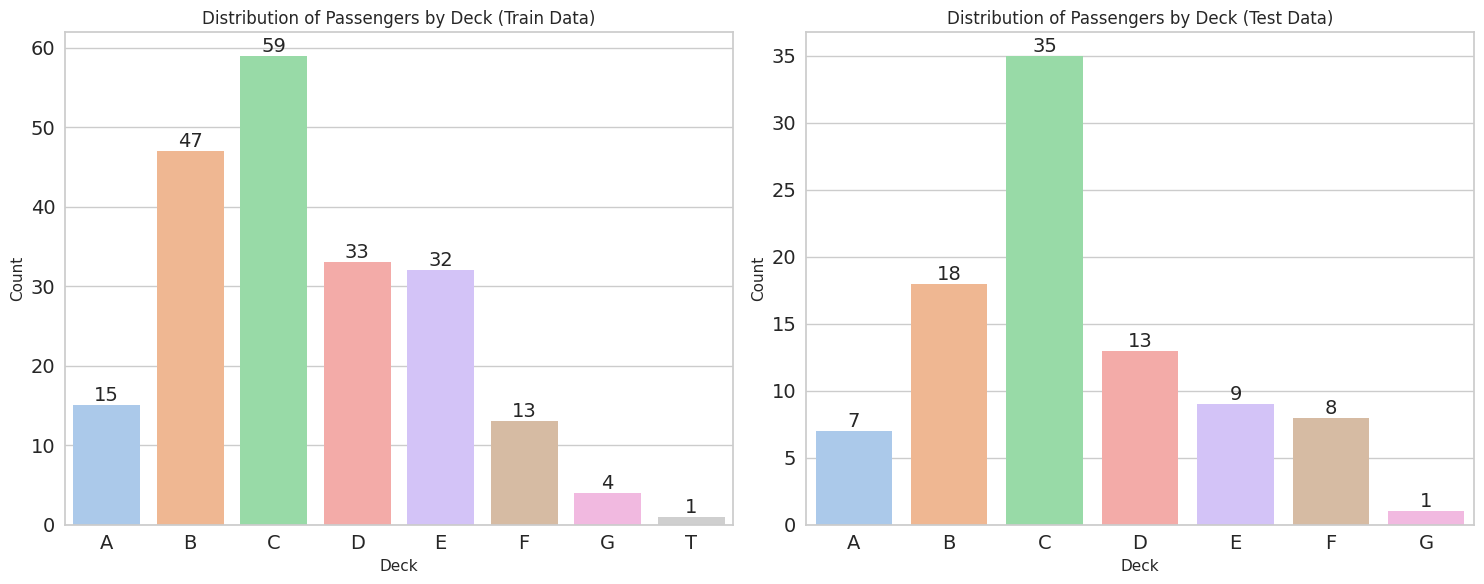

In [31]:
# Extract the first letter of the Cabin to represent the deck for both datasets!
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for train and test datasets
for ax, dataset, title in zip(axes, [train, test], ['Train Data', 'Test Data']):
    sns.countplot(x='Deck', data=dataset, palette='pastel', order=sorted(dataset['Deck'].dropna().unique()), ax=ax)
    ax.set_title(f'Distribution of Passengers by Deck ({title})')
    ax.set_xlabel('Deck')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Adding count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=14)

plt.tight_layout()
plt.show()

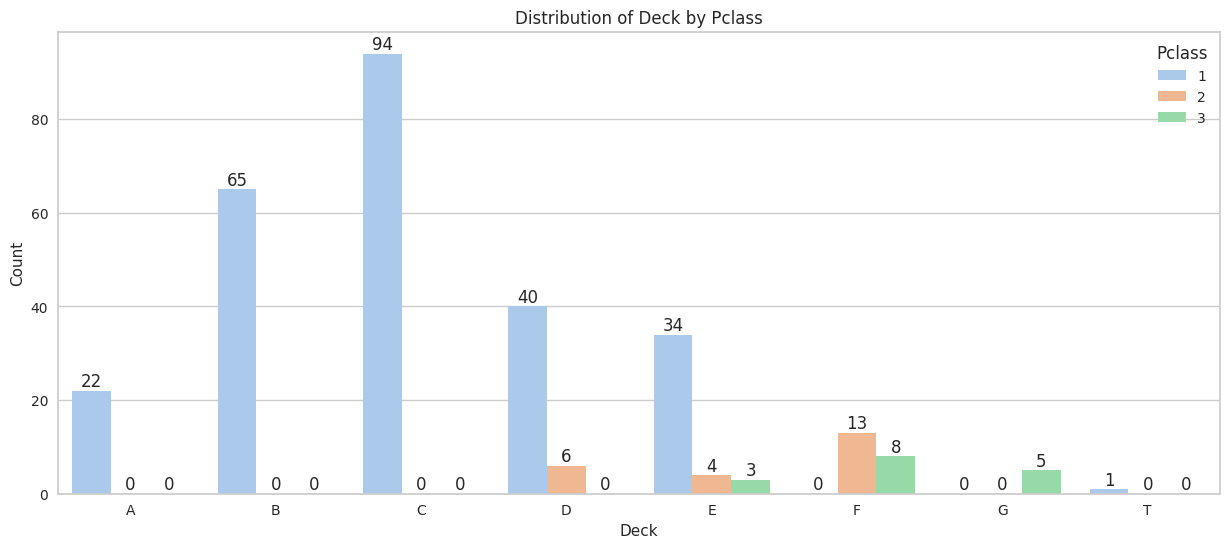

In [32]:
# Plot the relationship between Deck and Pclass Total df
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Deck', hue='Pclass', data=df, palette='pastel', order=sorted(df['Deck'].dropna().unique()))
plt.title('Distribution of Deck by Pclass')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Pclass')

# Adding count labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=12)
        
plt.show()

- Decks A, B, C, D, and E are exclusively occupied by first-class passengers, demonstrating a clear pattern of higher-class passengers being assigned to the higher decks. 
- Deck F is a mix of second and third-class passengers, with a slight majority from the second class. 
- **Deck G, on the other hand, is entirely occupied by third-class passengers**. 

*This distribution further emphasizes the correlation between passenger class and deck assignment, with lower-class passengers being placed on the lower decks.*

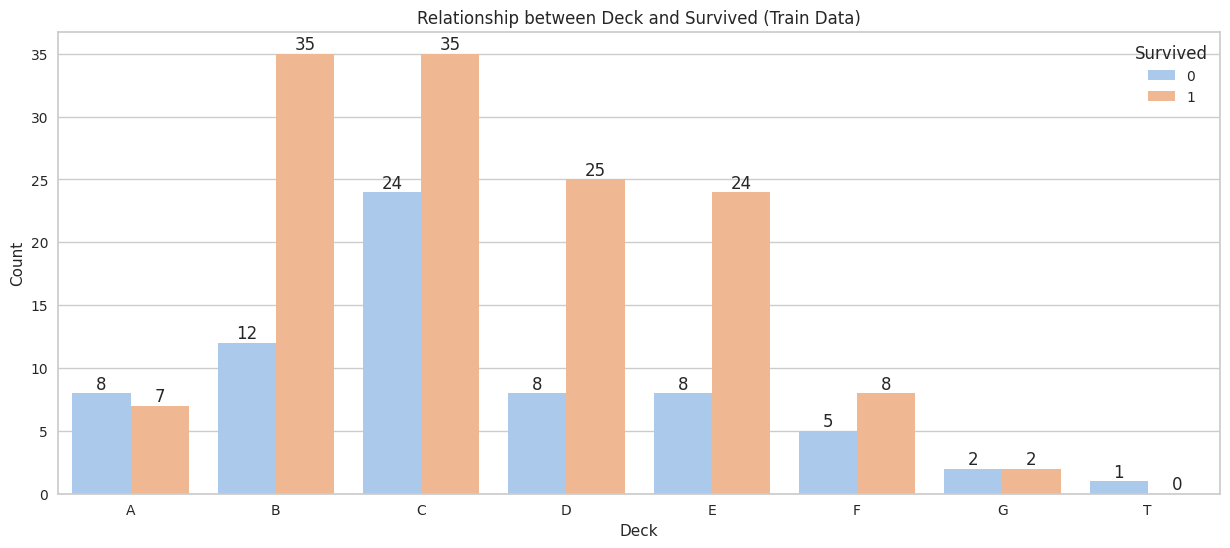

In [33]:
# Plot the relationship between Deck and Survived Passengers in the Train Data
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Deck', hue='Survived', data=train, palette='pastel', order=sorted(train['Deck'].dropna().unique()))
plt.title('Relationship between Deck and Survived (Train Data)')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Survived')

# Adding count labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=12)

plt.show()

# 0: Not Survived
# 1: Survived

**Analysis: `Deck` vs `Pclass` vs `Survived`**

- The distribution of passengers across decks strongly correlates with their ticket class (`Pclass`). 
- First-class passengers were placed on the higher decks, enjoying more luxurious accommodations, while second and third-class passengers were placed on the lower decks, reflecting the class divisions aboard the Titanic. 
- This arrangement was likely influenced by both the cost of the ticket and the social status associated with each class.
- Higher decks (B, C, D, E) appear to have a higher survival rate, suggesting that deck location may have played a significant role in determining the likelihood of survival on the Titanic.
- The `T` deck value appears only once in the train dataset, and it's associated with a first-class passenger. 

*Since `T` deck value is unique and not present in the test dataset, it is going to be moved to `Deck A` for consistency.*

**Next Steps:**
- **Creating `Deck` column and grouping them,** 
- **Moving the passenger in the `T` deck to the `A` deck**
- **Filling missing values with `X`, then assigning the decks based on matching Pclass values**
- **Dropping the `Cabin` feature**

In [34]:
# Extract the first letter of the Cabin to represent the deck
train['Deck'] = train['Cabin'].str[0]

# Move the passenger in the T deck to the A deck
train['Deck'] = train['Deck'].replace('T', 'A')

# Replace missing Cabin values with 'X' and group similar decks together
train['Deck'] = train['Deck'].fillna('X')
train['Deck'] = train['Deck'].replace(['A', 'B', 'C'], 'ABC')
train['Deck'] = train['Deck'].replace(['D', 'E'], 'DE')
train['Deck'] = train['Deck'].replace(['F', 'G'], 'FG')

# Repeat the same process for the test dataset
test['Deck'] = test['Cabin'].str[0]
test['Deck'] = test['Deck'].fillna('X')
test['Deck'] = test['Deck'].replace(['A', 'B', 'C'], 'ABC')
test['Deck'] = test['Deck'].replace(['D', 'E'], 'DE')
test['Deck'] = test['Deck'].replace(['F', 'G'], 'FG')


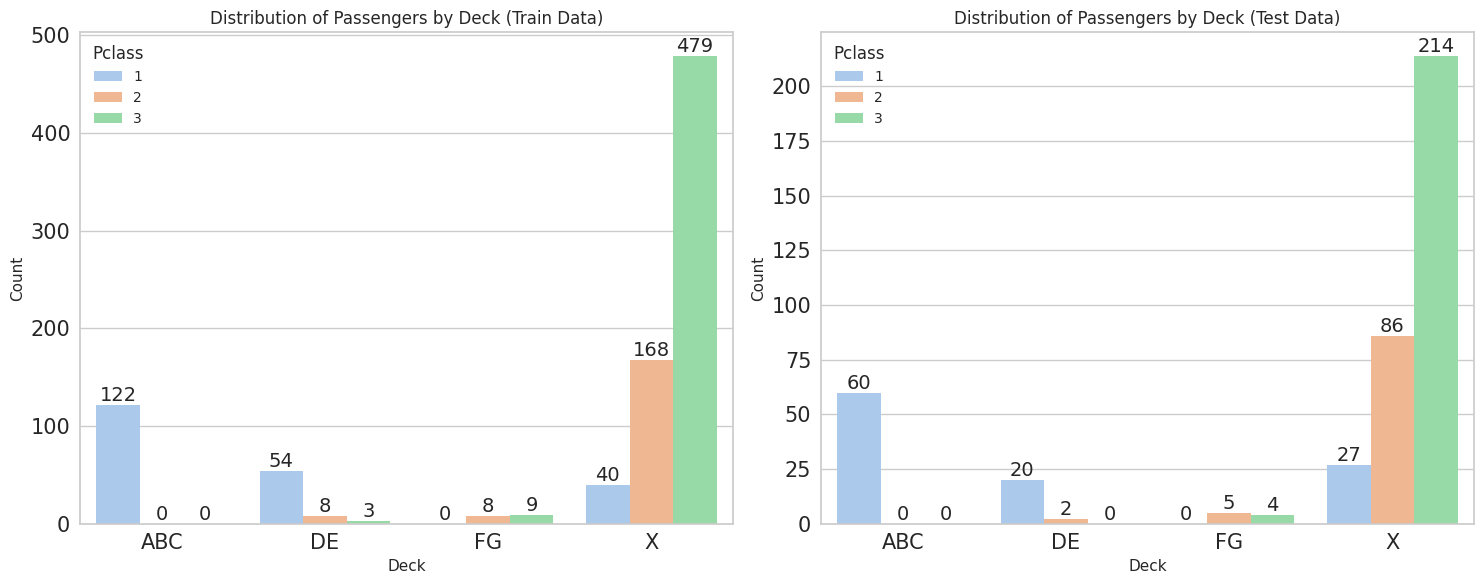

In [35]:
# ------Plot for train and test datasets-------
fig, axes = plt.subplots(1, 2, figsize=(15,6))

for ax, dataset, title in zip(axes, [train, test], ['Train Data', 'Test Data']):
    sns.countplot(x='Deck', data=dataset, hue='Pclass', palette='pastel', order=sorted(dataset['Deck'].dropna().unique()), ax=ax)
    ax.set_title(f'Distribution of Passengers by Deck ({title})')
    ax.set_xlabel('Deck')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    # Adding count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=14)

plt.tight_layout()
plt.show()

- Missing values in the Cabin column were initially assigned to the X deck after extracting the Deck column. 
- The graph shows that these missing values include passengers from 1st, 2nd, and 3rd class. 
- Therefore, I will reassign these X values to their corresponding Pclass to better reflect their likely deck assignment.

**After filling missing values with `X`, reassign the `X` values to Deck groups on their matching `Pclass` value:**

In [36]:
#Train
# Replace missing Cabin values X with Pclass-based Deck groups
train.loc[(train['Deck'] == 'X') & (train['Pclass'] == 1), 'Deck'] = 'ABC'
train.loc[(train['Deck'] == 'X') & (train['Pclass'] == 2), 'Deck'] = 'DE'
train.loc[(train['Deck'] == 'X') & (train['Pclass'] == 3), 'Deck'] = 'G'

# Group similar decks together
train['Deck'] = train['Deck'].replace(['A', 'B', 'C'], 'ABC')
train['Deck'] = train['Deck'].replace(['D', 'E'], 'DE')
train['Deck'] = train['Deck'].replace(['F', 'G'], 'FG')

#Test
# Replace missing Cabin values with Pclass-based Deck groups
test.loc[(test['Deck'] == 'X') & (test['Pclass'] == 1), 'Deck'] = 'ABC'
test.loc[(test['Deck'] == 'X') & (test['Pclass'] == 2), 'Deck'] = 'DE'
test.loc[(test['Deck'] == 'X') & (test['Pclass'] == 3), 'Deck'] = 'G'

# Group similar decks together
test['Deck'] = test['Deck'].replace(['A', 'B', 'C'], 'ABC')
test['Deck'] = test['Deck'].replace(['D', 'E'], 'DE')
test['Deck'] = test['Deck'].replace(['F', 'G'], 'FG')

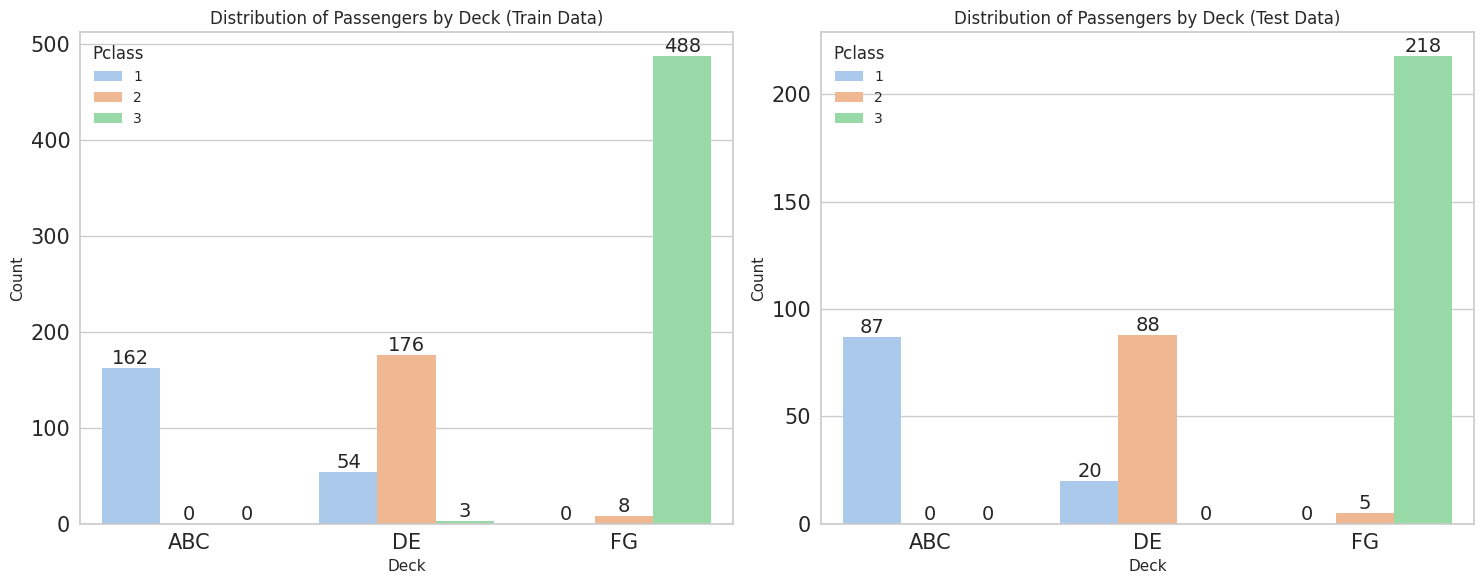

In [37]:
# ------Plot for train and test datasets-------
fig, axes = plt.subplots(1, 2, figsize=(15,6))

for ax, dataset, title in zip(axes, [train, test], ['Train Data', 'Test Data']):
    sns.countplot(x='Deck', data=dataset, hue='Pclass', palette='pastel', order=sorted(dataset['Deck'].dropna().unique()), ax=ax)
    ax.set_title(f'Distribution of Passengers by Deck ({title})')
    ax.set_xlabel('Deck')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    # Adding count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=14)

plt.tight_layout()
plt.show()

In [38]:
# Check if there are any remaining missing values
print(f"Missing values in Train Deck column after filling: {train['Deck'].isnull().sum()}")
print(f"Missing values in Test Deck column after filling: {test['Deck'].isnull().sum()}")

Missing values in Train Deck column after filling: 0
Missing values in Test Deck column after filling: 0


### Missing Values on `Embarked` Column (Train Data)

- `Embarked` is a categorical feature and there are only **2** missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together.
- More research has been conducted, and according to the [Titanic records](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)  Mrs. Stone and her maid, Amelie Icard, they know each other and both boarded the Titanic in Southampton, traveled together in first class, and occupied the same cabin (B-28). 
- Their missing `Embarked` values should be filled with `S` (Southampton), as this is also the mode of the `Embarked` value for upper-class female passengers in the dataset, making it the most likely embarkation point for them.

In [39]:
# Missing Values in the Embarked Column of the Train Data

train[train['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Deck  
61   female  38.0      0      0  113572  80.0   B28      NaN  ABC  
829  female  62.0      0      0  113572  80.0   B28      NaN  ABC

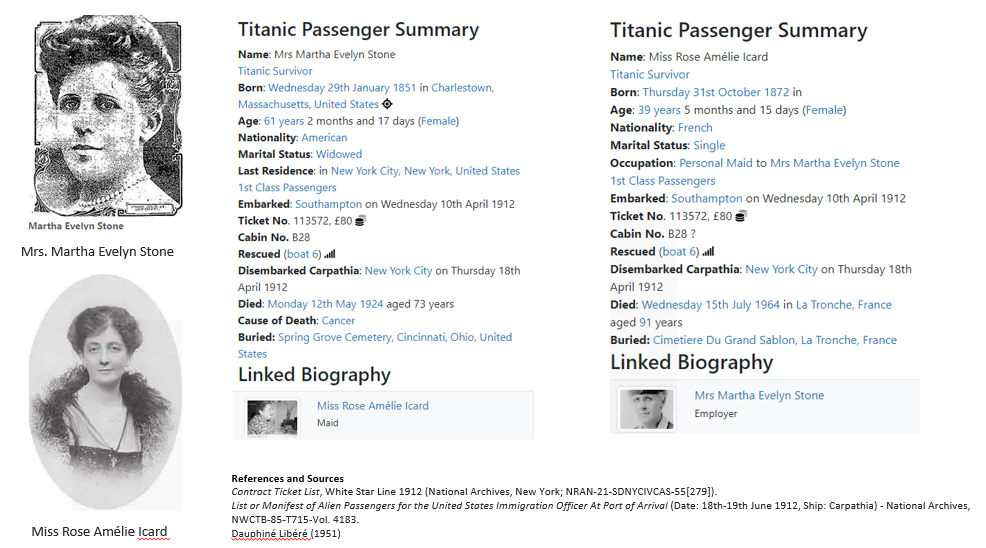

Images Reference Link: https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

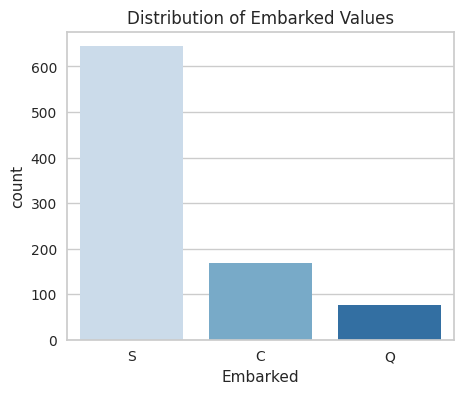

In [40]:
# Distribution of Embarked values

plt.figure(figsize=(5,4))
sns.countplot(x='Embarked', data=train, palette='Blues')
plt.title('Distribution of Embarked Values')
plt.show()

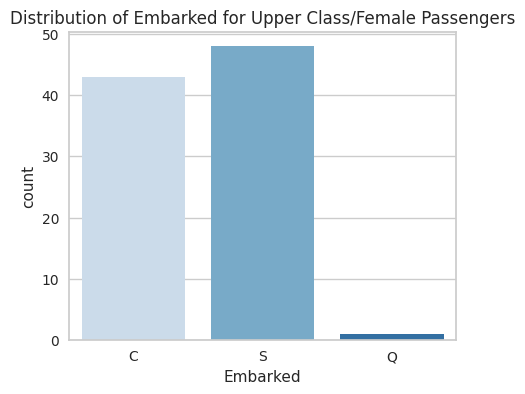

In [41]:
# Distribution of Embarked values for first-class and female passengers

upper_class_females_train  = train[(train['Pclass'] == 1) & (train['Sex'] == 'female')]

plt.figure(figsize=(5,4))
sns.countplot(x='Embarked', data=upper_class_females_train , palette='Blues')
plt.title('Distribution of Embarked for Upper Class/Female Passengers')
plt.show()

**Filling the Missing Values in the `Embarked` Feature**

In [42]:
# Identify the mode Embarked value for upper-class female passengers in the Train Data
mode_embarked = upper_class_females_train['Embarked'].mode()[0]
print(f"The most common Embarked value for upper-class/female passengers is: '{mode_embarked}'")

# Fill the missing Embarked values with this mode (S)
train['Embarked'].fillna(mode_embarked, inplace=True)

# Print a confirmation message
print("Embarked missing values filled with 'S' (Southampton).")
print(f"Missing values in Embarked column after filling (Train): {train['Embarked'].isnull().sum()}")

The most common Embarked value for upper-class/female passengers is: 'S'
Embarked missing values filled with 'S' (Southampton).
Missing values in Embarked column after filling (Train): 0


### Missing Values on `Fare` Column (Test Data)

- There is only one passenger with a missing `Fare` value. 
- To fill this, it's logical to use the median Fare for a male passenger in third class with no family (Parch and SibSp = 0), as Fare is influenced by Pclass, family size, and embarkation point. 
- This approach is further supported by research and Titanic records, which show that Mr. Thomas Storey, a third-class passenger who embarked from Southampton and had no family on board, fits this profile. 
- These factors ensure the imputed Fare reflects what similar passengers likely paid.

In [43]:
# Missing Values of Fare Column in the Test Data

test[test['Fare'].isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked Deck  
152   NaN   NaN        S   FG

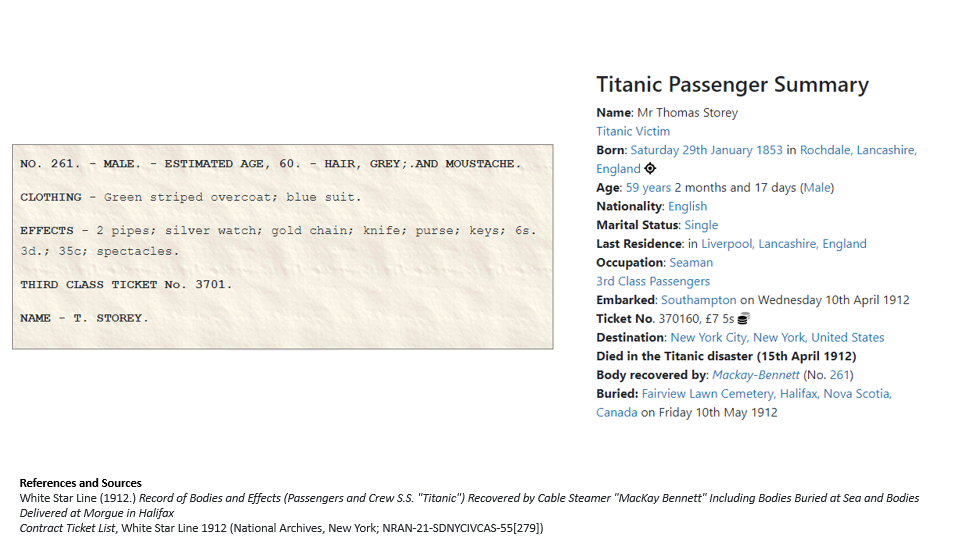

Image Reference Link: https://www.encyclopedia-titanica.org/titanic-victim/thomas-storey.html

In [44]:
# Corr: Fare vs other Features

df_corr = num_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr[df_corr['level_0'] == 'Fare']

level_0      level_1         0
6     Fare         Fare  1.000000
7     Fare       Pclass  0.558629
15    Fare     Survived  0.257307
19    Fare        Parch  0.221539
21    Fare          Age  0.178740
24    Fare        SibSp  0.160238
39    Fare  PassengerId  0.031428

**Filling the Missing Values in the `Fare` Feature:**

In [45]:
# Calculate the median fare for Pclass=3; Parch=0; SibSp=0 from Train Data;
median_fares = train.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
print('Median Fare for Pclass=3, Parch=0, SibSp=0 :',median_fares)

# Apply the function to the Test data
test['Fare'].fillna(median_fares, inplace=True)

# Check if there are any remaining missing values
print(f"Missing values in Fare column after filling(Test): {test['Fare'].isnull().sum()}")

Median Fare for Pclass=3, Parch=0, SibSp=0 : 7.8958
Missing values in Fare column after filling(Test): 0


<a id='featureeng'></a>
## Feature Engineering

### Age

We simplified the age bins into broader categories:
- **0-16**: Children and young teenagers.
- **17-30**: Young adults.
- **31-45**: Middle-aged adults.
- **46-60**: Older adults.
- **61-80**: Elderly.
    - Binning the `Age` feature in this dataset is important to capture the non-linear relationship between age and survival more effectively. 
    - By converting continuous age values into discrete bins, we can highlight key age groups that may have significantly different survival rates. 
    - This process reduces noise and helps the model focus on meaningful age intervals rather than trying to learn from individual age differences, which might not be as impactful. 
    - The goal is to make the model more robust and better at identifying the patterns that truly matter for predicting survival.

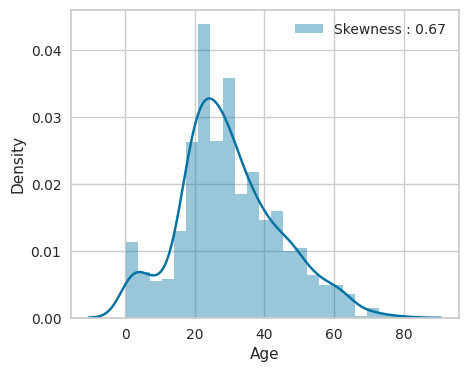

In [46]:
# Explore Age distribution 
plt.figure(figsize=(5,4))
ax = sns.distplot(df["Age"], label="Skewness : %.2f"%(dataset["Age"].skew()))
ax.legend(loc="best")

In [47]:
# Define broader age bins and labels
bins = [0, 16, 30, 45, 60, 80]
labels = ['0-16', '17-30', '31-45', '46-60', '61-80']

# Apply the same binning to both train and test sets
train['Age'] = pd.cut(train['Age'].astype(float), bins=bins, labels=labels, right=False)
test['Age'] = pd.cut(test['Age'].astype(float), bins=bins, labels=labels, right=False)

# Check the distribution in the train and test sets
print('Train Age values:', train['Age'].value_counts().sort_index())
print('Test Age values:', test['Age'].value_counts().sort_index())

Train Age values: Age
0-16      83
17-30    439
31-45    254
46-60     89
61-80     25
Name: count, dtype: int64
Test Age values: Age
0-16      32
17-30    226
31-45     99
46-60     47
61-80     14
Name: count, dtype: int64


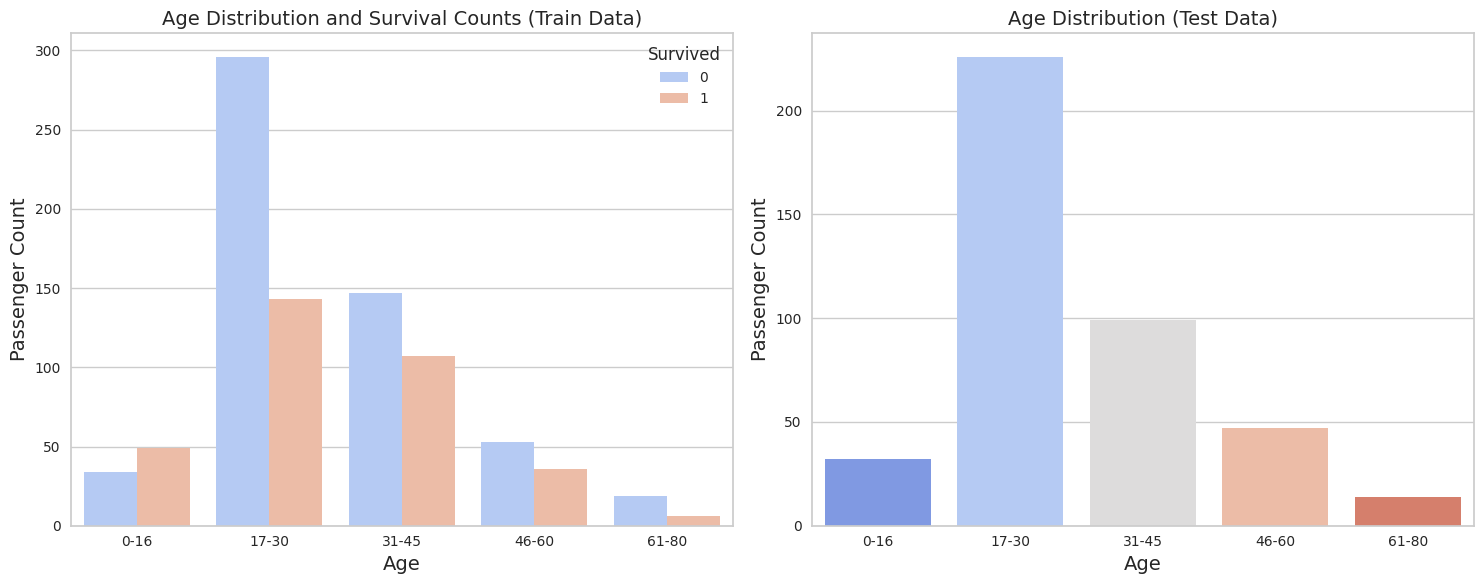

In [48]:
# Age Group Distribution and Survival Analysis in Train vs. Test Data

# Create subplots for train and test datasets
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot for train dataset
sns.countplot(x='Age', hue='Survived', data=train, palette='coolwarm', ax=axes[0])
axes[0].set_title('Age Distribution and Survival Counts (Train Data)', size=14)
axes[0].set_xlabel('Age', size=14)
axes[0].set_ylabel('Passenger Count', size=14)
#axes[0].tick_params(axis='x', rotation=45)

# Plot for test dataset
sns.countplot(x='Age', data=test, palette='coolwarm', ax=axes[1])
axes[1].set_title('Age Distribution (Test Data)', size=14)
axes[1].set_xlabel('Age', size=14)
axes[1].set_ylabel('Passenger Count', size=14)
#axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

- The analysis of the train dataset shows that younger passengers (ages 0-16) had a higher survival rate. 
- Additionally, the survival rate tends to decrease with age, particularly in the 22-25 and 26-30 age groups. 
- The test dataset reflects a similar age distribution but lacks survival data, making it crucial to consider age as a significant factor when predicting survival outcomes.

### Fare (Ticket Price)

We grouped the fares into meaningful economic tiers:
- **0.00-7.50**: Lowest fares, likely third-class passengers.
- **7.50-15.00**: Lower-middle fares, still within the third-class range.
- **15.00-30.00**: Middle-tier fares, possibly lower second-class fares or higher third-class fares.
- **30.00-60.00**: Upper-middle fares, including higher second-class and lower first-class fares.
- **60.00-100.00**: Higher fares, typically first-class passengers.
- **100.00-250.00**: Very high fares, likely wealthier first-class passengers.
- **250+**: Luxury fares, representing the wealthiest passengers.
    - The **Fare** distribution is highly right-skewed, with most passengers paying lower fares and a few outliers paying much higher amounts. This skewness indicates significant variability in the fare data.
    - Dividing the data into bins helps to capture this variability more effectively, allowing for a detailed analysis of how fare impacts survival rates across different fare ranges.

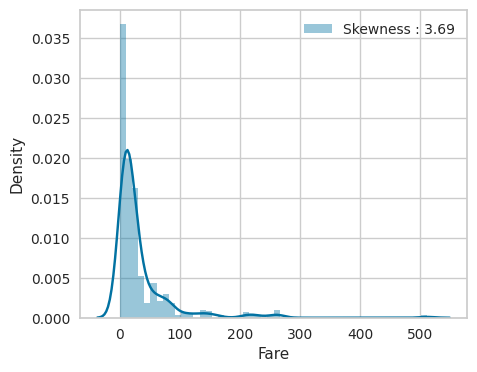

In [49]:
# Explore Fare distribution 
plt.figure(figsize=(5,4))
ax = sns.distplot(df["Fare"], label="Skewness : %.2f"%(dataset["Fare"].skew()))
ax.legend(loc="best")

In [50]:
# Define broader fare bins and labels
bins = [0, 7.5, 15, 30, 60, 100, 250, 600]  # The upper limit is set above the highest fare in the dataset
labels = ['0-7.5', '7.5-15', '15-30', '30-60', '60-100', '100-250', '250+']

# Apply the same binning to both train and test sets
train['Fare'] = pd.cut(train['Fare'], bins=bins, labels=labels, right=False)
test['Fare'] = pd.cut(test['Fare'], bins=bins, labels=labels, right=False)


# Check the distribution in the train and test sets
print('Train Fare/Ticket Prices:',train['Fare'].value_counts().sort_index())
print('Test Fare/Ticket Prices:',test['Fare'].value_counts().sort_index())

Train Fare/Ticket Prices: Fare
0-7.5       87
7.5-15     370
15-30      194
30-60      118
60-100      69
100-250     44
250+         9
Name: count, dtype: int64
Test Fare/Ticket Prices: Fare
0-7.5       35
7.5-15     181
15-30       92
30-60       46
60-100      33
100-250     23
250+         8
Name: count, dtype: int64


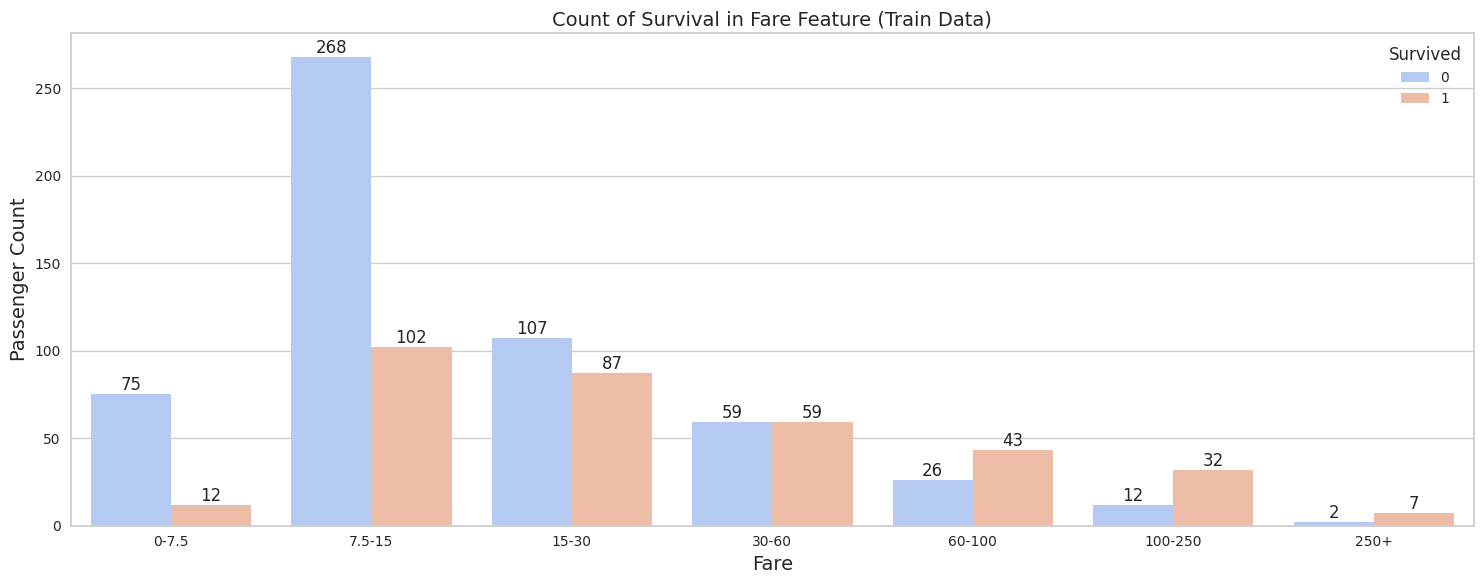

In [51]:
# Fare Group Distribution and Survival Analysis in Train Data
plt.figure(figsize=(15, 6))

# Plot for train dataset
ax_train = sns.countplot(x='Fare', hue='Survived', data=train, palette='coolwarm')
ax_train.set_title('Count of Survival in Fare Feature (Train Data)', size=14)
ax_train.set_xlabel('Fare', size=14)
ax_train.set_ylabel('Passenger Count', size=14)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Adding count labels
for p in ax_train.patches:
    height = p.get_height()
    ax_train.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=12)

plt.tight_layout()    
plt.show()


### Family Size

- **Family_Size Column** is created by summing the `SibSp`, `Parch`, and adding 1 (for the passenger themselves).
- **Labeling Family_Size**:
   - **Alone**: Family size of 1.
   - **Small**: Family size of 2, 3, or 4.
   - **Medium**: Family size of 5 or 6.
   - **Large**: Family size of 7, 8, or 11.

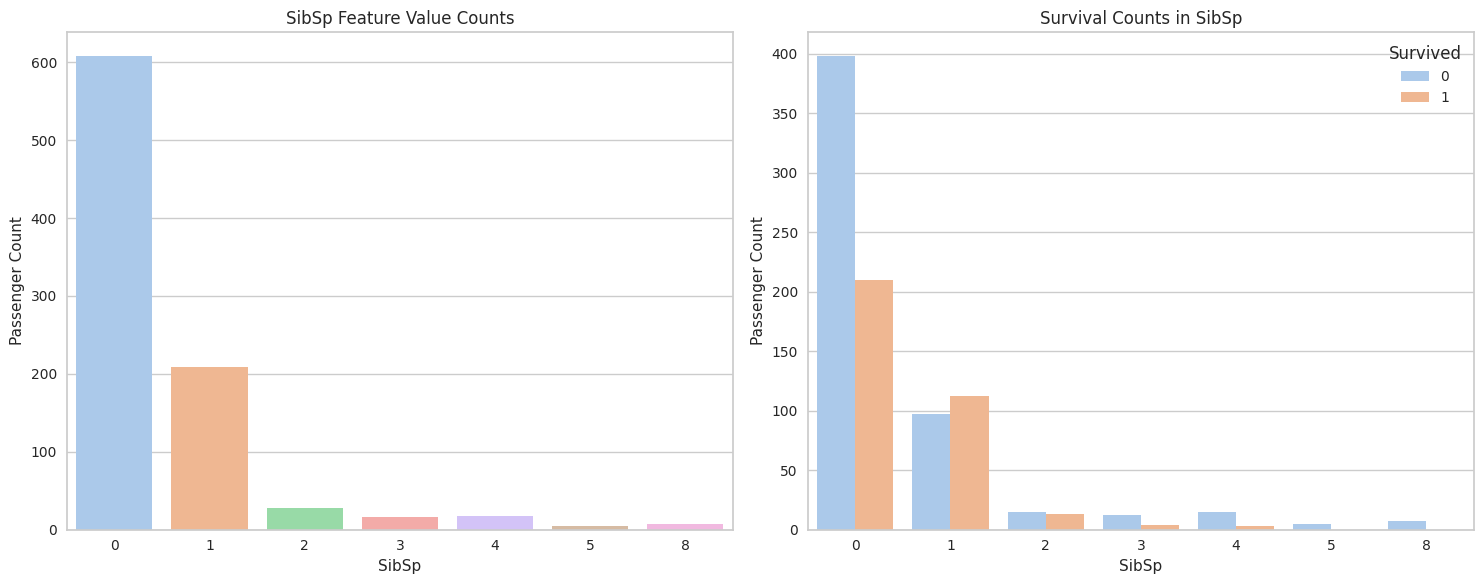

In [52]:
# SibSp Distribution and Its Influence on Survival Rates;

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot SibSp distribution
sns.countplot(data=train, x='SibSp', ax=axes[0], palette='pastel')
axes[0].set_title('SibSp Feature Value Counts')
axes[0].set_ylabel('Passenger Count')

# Plot survival based on SibSp
sns.countplot(data=train, x='SibSp', hue='Survived', ax=axes[1], palette='pastel')
axes[1].set_title('Survival Counts in SibSp')
axes[1].set_ylabel('Passenger Count')

# Adjust layout
plt.tight_layout()
plt.show()

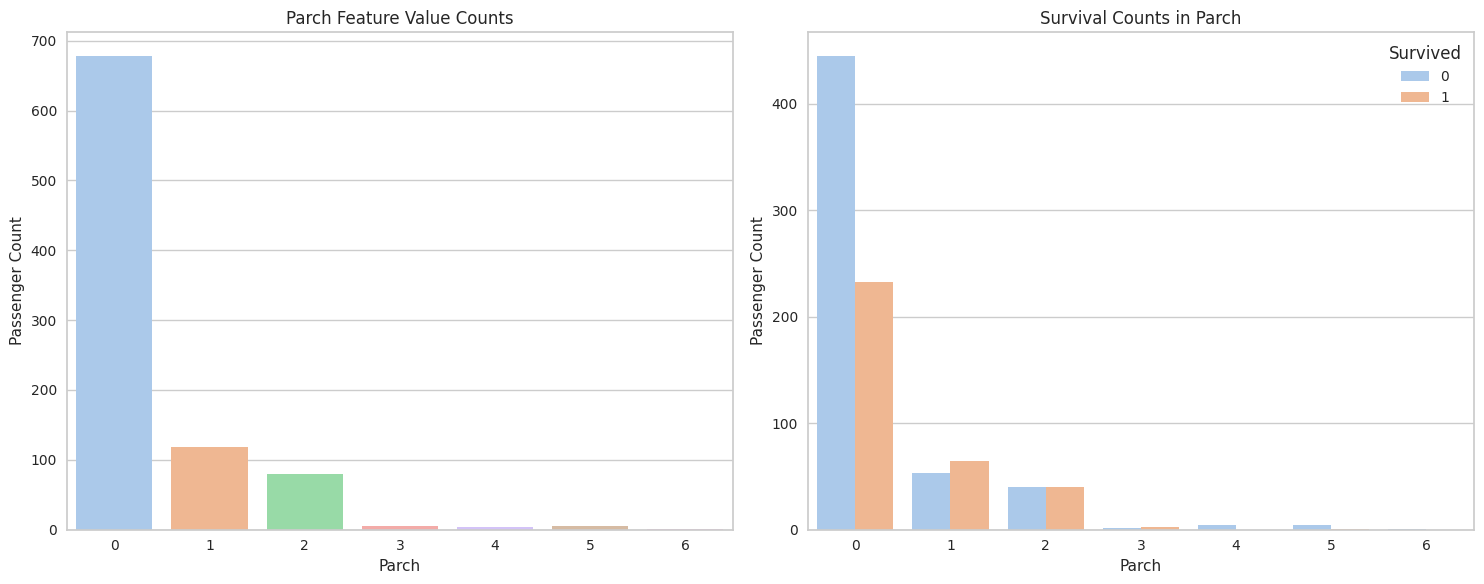

In [53]:
# Parch Distribution and Its Influence on Survival Rates;

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot SibSp distribution
sns.countplot(data=train, x='Parch', ax=axes[0], palette='pastel')
axes[0].set_title('Parch Feature Value Counts')
axes[0].set_ylabel('Passenger Count')

# Plot survival based on SibSp
sns.countplot(data=train, x='Parch', hue='Survived', ax=axes[1], palette='pastel')
axes[1].set_title('Survival Counts in Parch')
axes[1].set_ylabel('Passenger Count')

# Adjust layout
plt.tight_layout()
plt.show()

**Create the `Family_Size` feature with `SibSp` + `Parch` in both train and test datasets;**

In [54]:
# Create the Family_Size feature in both train and test datasets
for df in [train, test]:
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

    # Labeling Family_Size
    df['Family_Size'] = df['Family_Size'].apply(lambda x: 'Alone' if x == 1 
                                                        else 'Small' if x in [2, 3, 4] 
                                                        else 'Medium' if x in [5, 6] 
                                                        else 'Large')

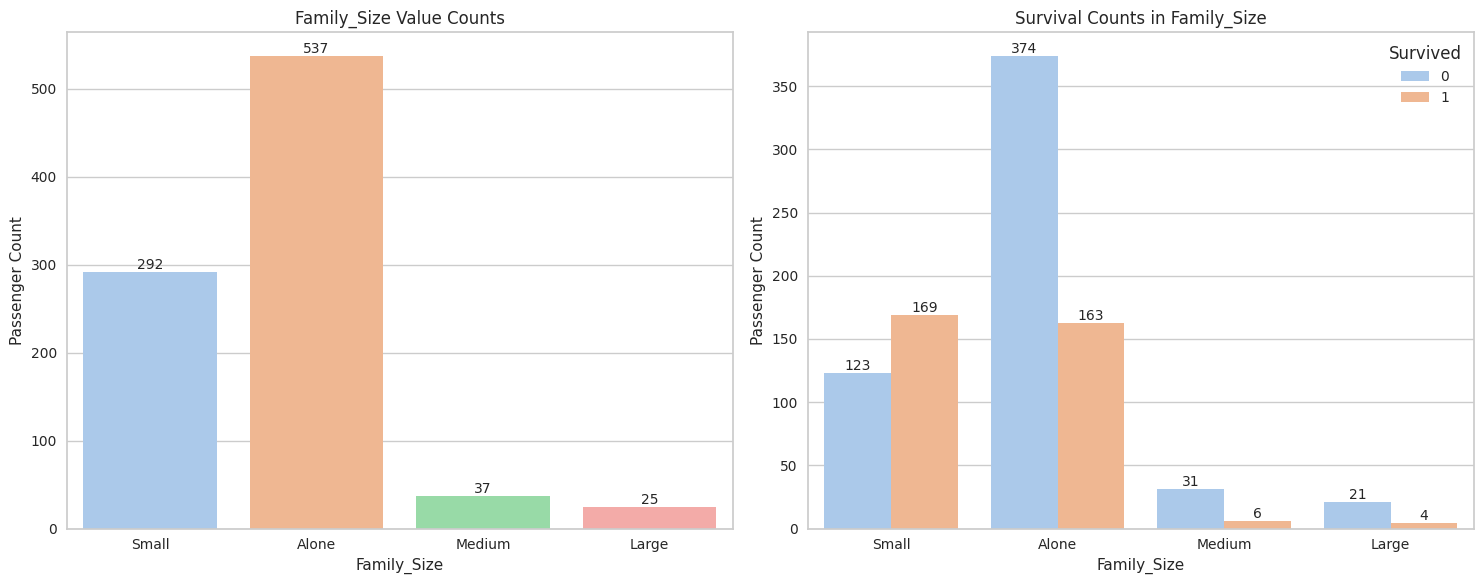

In [55]:
# Family_Size Distribution and Its Influence on Survival Rates;

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Parch distribution
sns.countplot(data=train, x='Family_Size', ax=axes[0], palette='pastel')
axes[0].set_title('Family_Size Value Counts')
axes[0].set_ylabel('Passenger Count')

# Plot survival based on Parch
sns.countplot(data=train, x='Family_Size', hue='Survived', ax=axes[1], palette='pastel')
axes[1].set_title('Survival Counts in Family_Size')
axes[1].set_ylabel('Passenger Count')

# Adding count labels
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=10)

# Adjust layout
plt.tight_layout()
plt.show()


### Name/Title

- **Title Column** is created by extracting the `Name` column.
- **Labeling Title Column**:
    - **"Mr"**: Mr (Male passengers only)
    - **"Miss/Mrs"**: Miss, Mrs, Ms, Mlle, Mme (Female passengers)
    - **"Master"**: Master (Young male passengers)
    - **"Professional"**: Dr, Rev, Col, Major, Capt (Professional and military titles)
    - **"Noble"**: Sir, Lady, the Countess, Jonkheer, Don, Dona (Noble and high social status titles)

The purpose of this grouping is to simplify the dataset by consolidating similar titles into broader categories. This reduces the complexity of the model by minimizing the number of categories while still preserving the essential distinctions that could impact the survival predictions.

*By grouping similar titles together, such as "Mr" and "Master" for male passengers or "Miss/Mrs" for female passengers, we capture the most relevant social and demographic information*.<br>
*The "Professional" group combines titles related to specific professions and military ranks, while the "Noble" group includes titles that indicate high social status or nobility*.

In [56]:
get_value_count(df, 'Name').sample(5) 

Name  counts   percent
71              Mahon, Miss. Bridget Delia       1  0.002392
145               Kink-Heilmann, Mr. Anton       1  0.002392
306               Mock, Mr. Philipp Edmund       1  0.002392
37                       Pokrnic, Mr. Tome       1  0.002392
297  Corbett, Mrs. Walter H (Irene Colvin)       1  0.002392

In [57]:
# Get Titles from Name Column in Total Dataset (train+Test);

titles = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(titles)
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

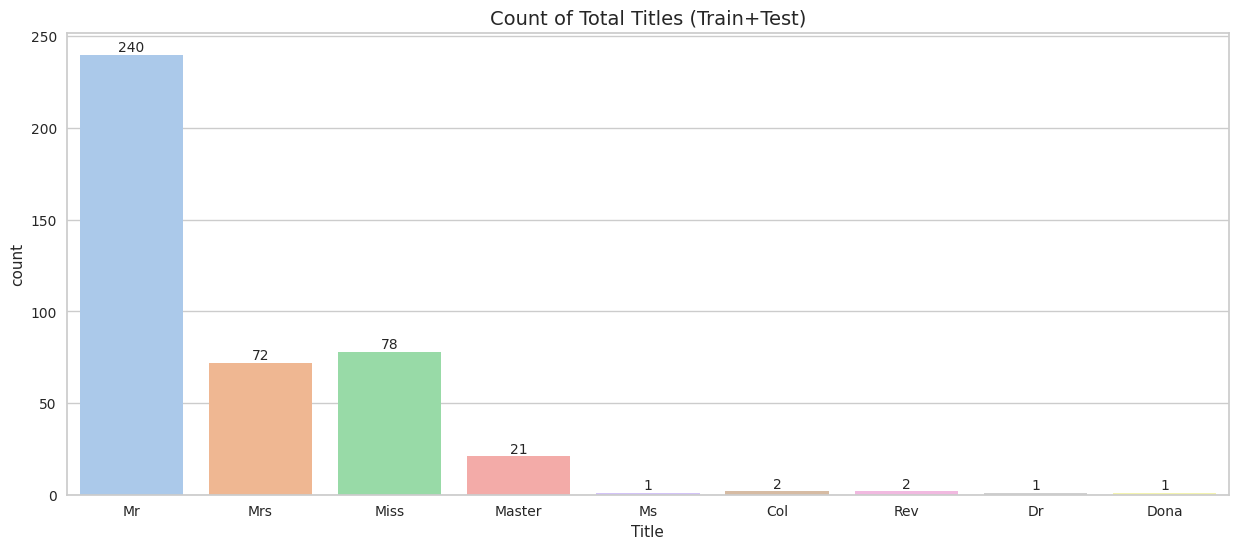

In [58]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x="Title", data = df, palette='pastel')
ax.set_title('Count of Total Titles (Train+Test)', size=14)
ax.bar_label(ax.containers[0],size=10)
plt.show()

In [59]:
# Get the Title from Names and Apply to Train and Test Datasets
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]  # Train Data
test["Title"] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]    # Test Data

print('Train Titles:',list(train["Title"].unique()))
print('Train Titles:',list(test["Title"].unique()))

Train Titles: ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
Train Titles: ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']


In [60]:
# Titles in Train: ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
# Titles in Test:  ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

# Define title mappings to group similar titles together
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss/Mrs',
    'Mrs': 'Miss/Mrs',
    'Ms': 'Miss/Mrs',
    'Mlle': 'Miss/Mrs',
    'Mme': 'Miss/Mrs',
    'Master': 'Master',
    'Dr': 'Professional',
    'Rev': 'Professional',
    'Col': 'Professional',
    'Major': 'Professional',
    'Capt': 'Professional',
    'Sir': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Jonkheer': 'Noble',
    'Don': 'Noble',
    'Dona': 'Noble'  # Ensure Dona is included, especially for the Test set
}

# Apply the replacement in Train and Test Data
for df in [train, test]:
    df['Title'] = df['Title'].replace(title_mapping)

# Check if there are any titles left unmapped
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Miss/Mrs' 'Master' 'Noble' 'Professional']
['Mr' 'Miss/Mrs' 'Master' 'Professional' 'Noble']


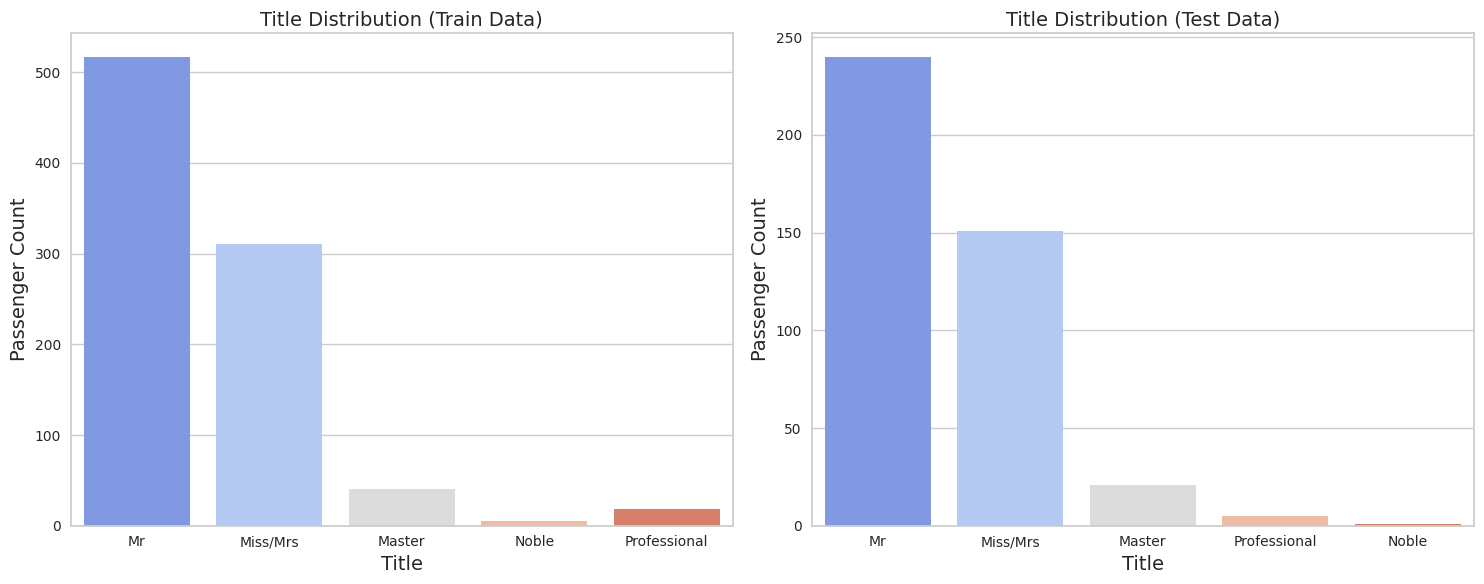

In [61]:
# Title Distributions

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot for train dataset
sns.countplot(x='Title', data=train, palette='coolwarm', ax=axes[0])
axes[0].set_title('Title Distribution (Train Data)', size=14)
axes[0].set_xlabel('Title', size=14)
axes[0].set_ylabel('Passenger Count', size=14)

# Plot for test dataset
sns.countplot(x='Title', data=test, palette='coolwarm', ax=axes[1])
axes[1].set_title('Title Distribution (Test Data)', size=14)
axes[1].set_xlabel('Title', size=14)
axes[1].set_ylabel('Passenger Count', size=14)

# Adjust layout
plt.tight_layout()
plt.show()

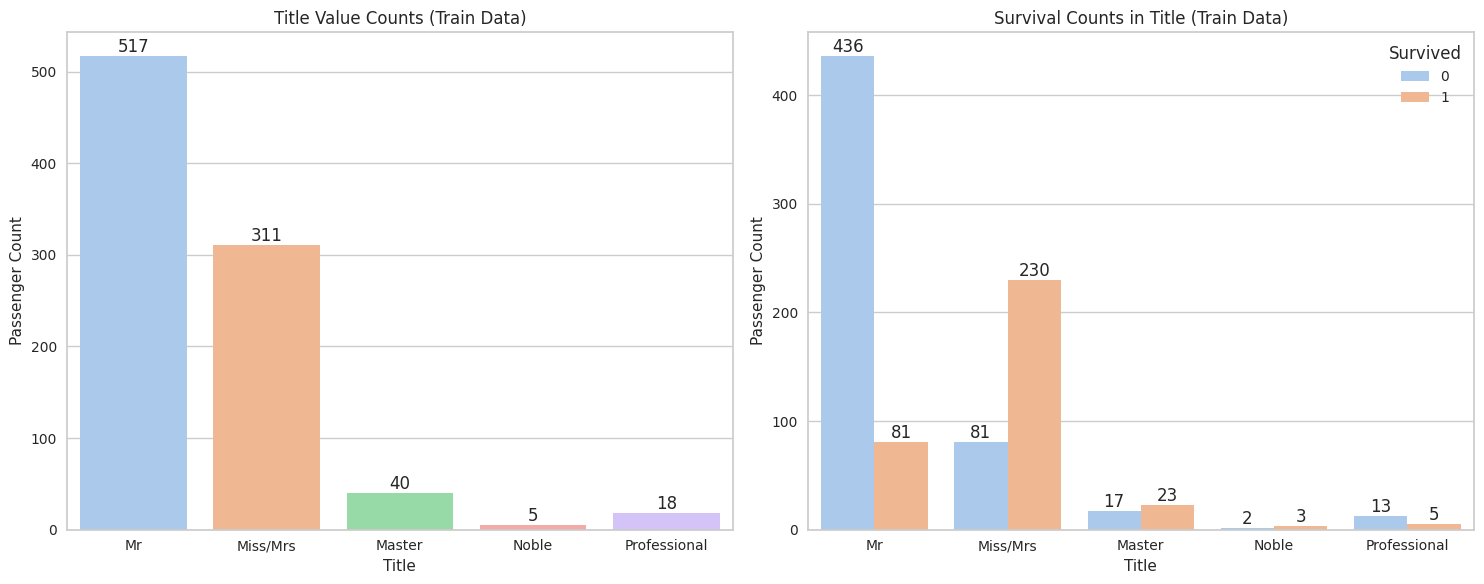

In [62]:
# Title Distribution and Its Influence on Survival Rates;
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Title distribution
sns.countplot(data=train, x='Title', ax=axes[0], palette='pastel')
axes[0].set_title('Title Value Counts (Train Data)')
axes[0].set_ylabel('Passenger Count')

# Plot survival based
sns.countplot(data=train, x='Title', hue='Survived', ax=axes[1], palette='pastel')
axes[1].set_title('Survival Counts in Title (Train Data)')
axes[1].set_ylabel('Passenger Count')

# Adding count labels
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=12)

plt.tight_layout()
plt.show()


### Ticket

- Ticket frequency feature was created to simplify the analysis of the many unique ticket values. 
- By grouping tickets based on how many passengers shared the same ticket, we can uncover patterns related to survival rates that might not be captured by family size alone. 
- This approach is particularly useful because it accounts for non-family groups, such as friends or servants, who traveled together. 
- Additionally, unlike ticket prefixes, which may already be reflected in features like `Pclass` or `Embarked`, ticket frequency provides distinct and valuable information.

In [63]:
get_value_count(train, 'Ticket').head()

Ticket  counts   percent
0    347082       7  0.007856
1  CA. 2343       7  0.007856
2      1601       7  0.007856
3   3101295       6  0.006734
4   CA 2144       6  0.006734

In [64]:
# Assigning Ticket Frequency Count on both Train and Test Data
train['Ticket_Frequency'] = train.groupby('Ticket')['Ticket'].transform('count')
test['Ticket_Frequency'] = test.groupby('Ticket')['Ticket'].transform('count')

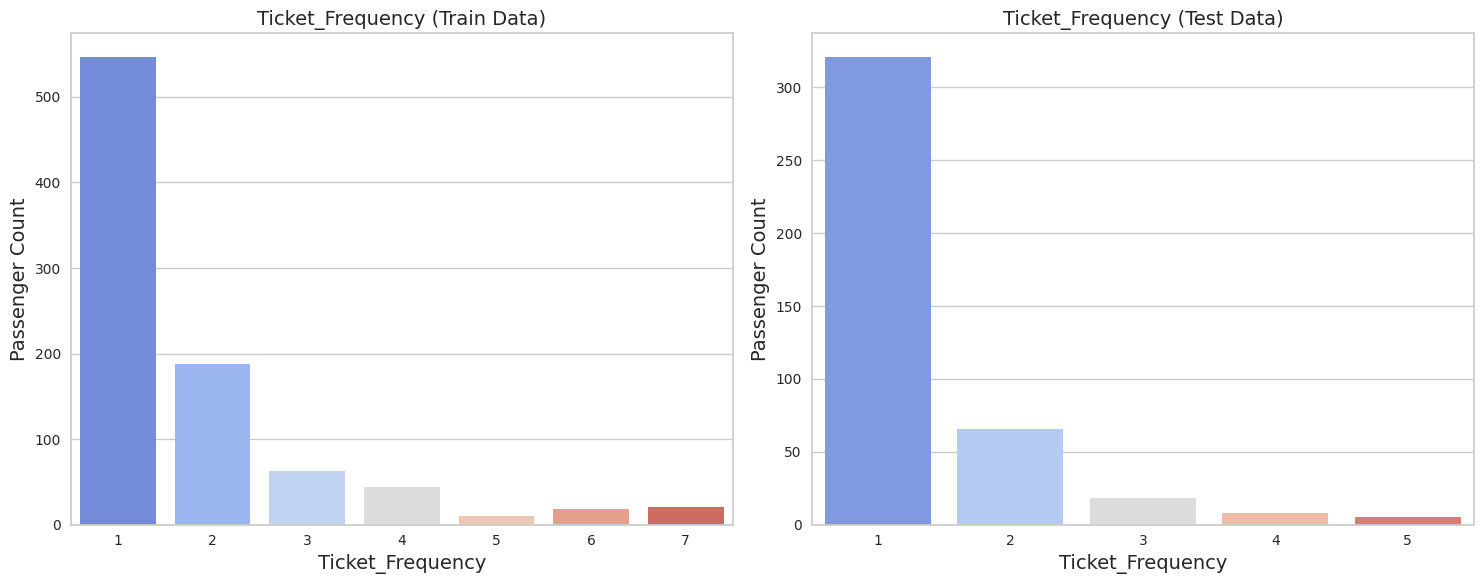

In [65]:
# Ticket_Frequency

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot for train dataset
sns.countplot(x='Ticket_Frequency', data=train, palette='coolwarm', ax=axes[0])
axes[0].set_title('Ticket_Frequency (Train Data)', size=14)
axes[0].set_xlabel('Ticket_Frequency', size=14)
axes[0].set_ylabel('Passenger Count', size=14)

# Plot for test dataset
sns.countplot(x='Ticket_Frequency', data=test, palette='coolwarm', ax=axes[1])
axes[1].set_title('Ticket_Frequency (Test Data)', size=14)
axes[1].set_xlabel('Ticket_Frequency', size=14)
axes[1].set_ylabel('Passenger Count', size=14)

plt.tight_layout()
plt.show()

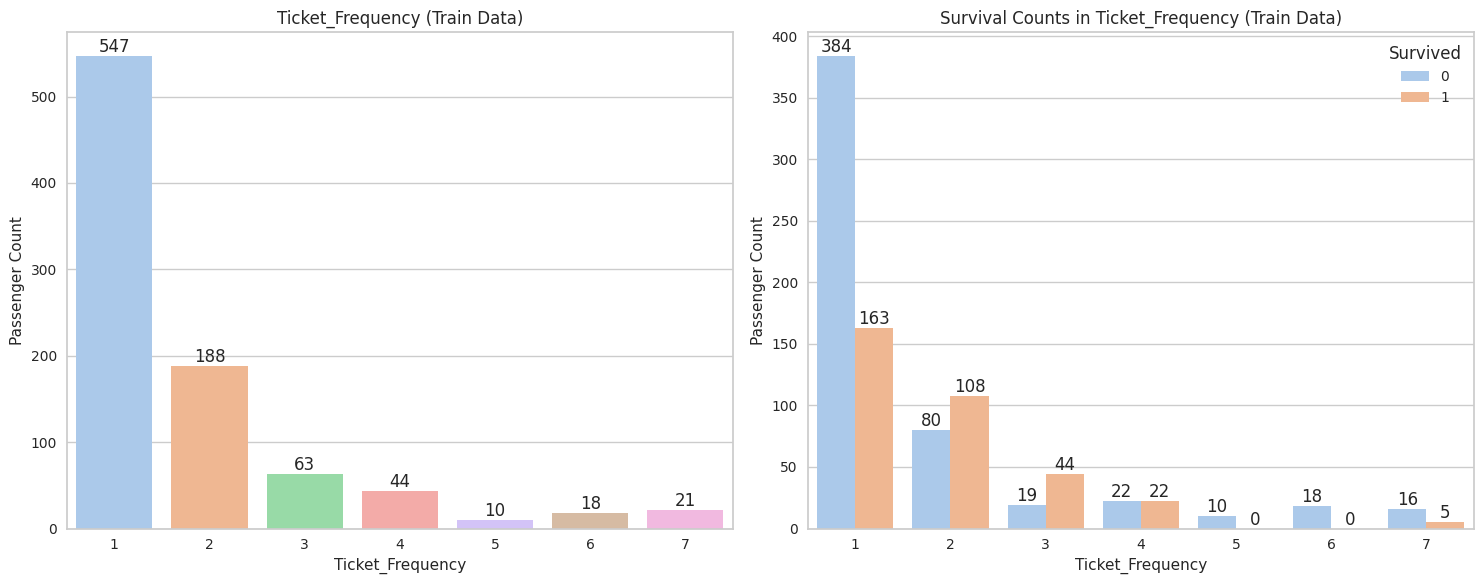

In [66]:
# Ticket_Frequency and Survival Analysis in Train Data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Ticket_Frequency distribution
sns.countplot(data=train, x='Ticket_Frequency', ax=axes[0], palette='pastel')
axes[0].set_title('Ticket_Frequency (Train Data)')
axes[0].set_ylabel('Passenger Count')

# Plot survival based
sns.countplot(data=train, x='Ticket_Frequency', hue='Survived', ax=axes[1], palette='pastel')
axes[1].set_title('Survival Counts in Ticket_Frequency (Train Data)')
axes[1].set_ylabel('Passenger Count')

# Adding count labels
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom', size=12)

plt.tight_layout()
plt.show()

- The `Ticket_Frequency` feature was created to group passengers by the number of people sharing the same ticket, making it easier to analyze survival trends. 
- The data shows that passengers with unique or less-shared tickets had a better chance of survival. 
- However, as the number of people sharing a ticket increased, their chances of survival decreased. 
- This suggests that smaller groups may have been better positioned during the evacuation, while larger groups struggled more, leading to lower survival rates.

## Dropping the Features

Why Columns were Dropped?

1. **`Cabin`**: The `Cabin` feature is dropped because the more informative `Deck` feature has been extracted from it. The `Deck` provides a higher-level categorization that is more relevant for analysis.
2. **`Name`**: The `Name` feature is dropped because the `Title` feature, which captures the essential information related to social status and gender from the names, has already been extracted.
3. **`SibSp` and `Parch`**: The `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) features are dropped because they have been combined to create the `Family_Size` feature. This new feature provides a better representation of a passenger's family context.
4. **`Ticket`**: The `Ticket` feature is dropped because the `Ticket_Frequency` feature, which represents the number of people sharing the same ticket, has been created. This new feature is more relevant to understanding group dynamics among passengers.
5. **`PassengerId`**: The `PassengerId` feature is dropped because it is simply a unique identifier for each passenger and does not contribute any predictive value to the model.

In [67]:
train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex    Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  17-30      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  31-45      1   
2                             Heikkinen, Miss. Laina  female  17-30      0   

   Parch            Ticket    Fare Cabin Embarked Deck Family_Size     Title  \
0      0         A/5 21171   0-7.5   NaN        S   FG       Small        Mr   
1      0          PC 17599  60-100   C85        C  ABC       Small  Miss/Mrs   
2      0  STON/O2. 3101282  7.5-15   NaN        S   FG       Alone  Miss/Mrs   

   Ticket_Frequency  
0                 1  
1                 1  
2                 1

In [68]:
test.head(3)

PassengerId  Pclass                              Name     Sex    Age  \
0          892       3                  Kelly, Mr. James    male  31-45   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  46-60   
2          894       2         Myles, Mr. Thomas Francis    male  61-80   

   SibSp  Parch  Ticket    Fare Cabin Embarked Deck Family_Size     Title  \
0      0      0  330911  7.5-15   NaN        Q   FG       Alone        Mr   
1      1      0  363272   0-7.5   NaN        S   FG       Small  Miss/Mrs   
2      0      0  240276  7.5-15   NaN        Q   DE       Alone        Mr   

   Ticket_Frequency  
0                 1  
1                 1  
2                 1

In [69]:
# List of columns to drop
columns_to_drop = ['PassengerId', 'Cabin', 'Name', 'SibSp', 'Parch', 'Ticket']

# Dropping the columns in both train and test datasets
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

# Verify the drop
print("Train Data Columns after Drop:", list(train.columns))
print("\nTest Data Columns after Drop:", list(test.columns))


Train Data Columns after Drop: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_Size', 'Title', 'Ticket_Frequency']

Test Data Columns after Drop: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_Size', 'Title', 'Ticket_Frequency']


In [171]:
# 

# Save the cleaned training data
train.to_csv('clean_train_titanic.csv', index=False)

# Save the cleaned test data
test.to_csv('clean_test_titanic.csv', index=False)

In [195]:
# Load the cleaned training data
clean_train_df = pd.read_csv('/kaggle/working/clean_train_titanic.csv')

# Load the cleaned test data
clean_test_df = pd.read_csv('/kaggle/working/clean_test_titanic.csv')

**Summary of Feature Transformations and Dropping:**

1. **Pclass**:Pclass represents the passenger's class (1st, 2nd, 3rd) and remained as an ordinal feature. 

2. **Sex**: This feature indicates the gender of the passengers. It is a nominal feature.

3. **Age**:
    - **Imputation**: Missing `Age` values were filled based on `Pclass` and `Sex` features to maintain data integrity.
    - **Binning**: The `Age` column was divided into 10 bins using `qcut`. This binning was done to better analyze survival rates across different age groups.
   
4. **Fare**:
      - **Imputation**: Missing `Fare` values were filled with the median values of passengers in similar groups.
      - **Binning**: The `Fare` column was similarly divided into 10 bins using `qcut`. This allowed for a more detailed analysis of survival rates across different fare ranges.

5. **Embarked**:
   - **Imputation**: Missing `Embarked` values were filled with the most likely embarkation points (S, C, Q) based on other related features like `Fare` and `Pclass`.

6. **Deck**:
   - **Extraction**: The `Deck` feature was extracted from the `Cabin` column.
   - **Imputation**: Missing `Deck` values were assigned based on `Pclass`, with 1st class passengers grouped into `ABC`, 2nd class into `DE`, and 3rd class into `FG`.

7. **Family_Size**:
   - **Creation**: The `Family_Size` feature was created by combining the `SibSp` and `Parch` columns.
   - **Binning**: Family sizes were grouped into four categories: `Alone`, `Small`, `Medium`, and `Large` to better capture survival patterns.

8. **Title**:
   - **Extraction**: The `Title` feature was extracted from the `Name` column.
   - **Grouping**: Titles were grouped into categories such as `Mr`, `Miss/Mrs`, `Master`, `Professional`, and `Noble` for more meaningful analysis.

9. **Ticket_Frequency**:
   - **Creation**: The `Ticket_Frequency` feature was created from the `Ticket` column, showing how many passengers shared the same ticket.


10. **PassengerId**:  PassengerId feature was dropped because it is simply a unique identifier and does not contribute to the predictive modeling process.

**Dropped Columns:**

- **Cabin, Name, SibSp, Parch, Ticket, PassengerId**: These columns were dropped after their relevant information was extracted or combined into new features, making them redundant.

These transformations and feature engineering steps were performed to clean the dataset, extract meaningful information, and prepare the data for more effective modeling. Each feature was carefully processed to enhance the model's accuracy and predictive power.

<a id='machine-learning'></a>
# MACHINE LEARNING

<a id='data-preprocessing'></a>
## Data Preprocessing

<a id='train-test'></a>
### Splitting Data

In [72]:
X = train.drop(columns ="Survived")
y = train["Survived"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=101)

In [74]:
# Test Dataset for Submission Prediction
submission_test =  test.copy()  

In [75]:
print('---------------------------------------------')
print("X_Train rows-columns: ", X_train.shape)
print("y_Train Target Feature rosw: ", y_train.shape)
print("X_Test Validation Data rows-columns: ", X_test.shape)
print('---------------------------------------------')
# Original Test Dataset for Submission
print("Submition Prediction Test Dataset rows-columns: ", submission_test.shape)
print('---------------------------------------------')

---------------------------------------------
X_Train rows-columns:  (712, 9)
y_Train Target Feature rosw:  (712,)
X_Test Validation Data rows-columns:  (179, 9)
---------------------------------------------
Submition Prediction Test Dataset rows-columns:  (418, 9)
---------------------------------------------


- **`X_train` and `y_train`**: These represent the features (`X_train`) and target variable (`y_train`) from the training dataset. They are used to train the machine learning model.
  
- **`X_test` and `y_test`**: sets will be used to evaluate the model's performance. The validation set is used to tune the model's hyperparameters and evaluate its performance during the training process.

- **`test_data_sub`**: This contains the features from the test dataset, which are used to make final predictions after the model is fully trained. Note that `y_test` is not available since the test data in competitions like Titanic typically does not include the target variable (`Survived`). 

The train/validation split helps in assessing how well the model generalizes to unseen data, while the test dataset is used to evaluate the final model's performance.

### Encoding Categoricals (Ordinal and Nominal)

---

**Ordinal Features**
1. **Pclass**: Ticket class. This column contains ordered values (1, 2, 3) representing passengers' social and economic status, making it an ordinal variable.
    - **First Class (Pclass = 1)**: Passengers had the most luxurious accommodations and generally better access to lifeboats.
    - **Second Class (Pclass = 2)**: Intermediate level of comfort and amenities.
    - **Third Class (Pclass = 3)**: More basic and crowded accommodations, often with less access to lifeboats and safety.


2. **Age**: The age of the passenger, which was binned into 10 categories. This transformation makes it an ordinal variable, reflecting different age groups that could have different survival rates.

3. **Fare**: The ticket fare paid by the passenger, also binned into 10 categories. As with `Age`, this transformation makes `Fare` an ordinal variable, reflecting different fare ranges that may correlate with survival chances.

4. **Deck**: Extracted from the `Cabin` feature. The `Deck` variable was categorized into groups (`ABC`, `DE`, `FG`- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Although typically considered nominal, it can be treated as ordinal if a ranking or significance is assumed among the ports, as some analyses might use it in an ordered manner based on socio-economic or historical context.
    - **Southampton**: Port where passengers of higher socio-economic status predominantly boarded.
    - **Cherbourg**: Port where upper-class passengers from wealthy European backgrounds boarded.
    - **Queenstown**: Port where passengers from lower socio-economic backgrounds were more common.) based on the deck level, making it an ordinal variable where the deck placement may have implications on survival due to proximity to lifeboats and access to safety.

5. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Although typically considered nominal, it can be treated as ordinal if a ranking or significance is assumed among the ports. For instance:
    - **Southampton**: Predominantly where passengers of higher socio-economic status boarded.
    - **Cherbourg**: Often associated with upper-class passengers from wealthy European backgrounds.
    - **Queenstown**: More common for passengers from lower socio-economic backgrounds.

These socio-economic implications could reflect passengers' living standards and class differences, potentially influencing survival rates.

---

**Nominal Features**

1. **Sex**: The gender of the passenger, categorized as male or female. This column is used to indicate the gender of each passenger but does not involve any inherent order.

2. **Family_Size**: Created by combining the `SibSp` and `Parch` features. It indicates the size of a passenger's family traveling together, categorized into `Alone`, `Small`, `Medium`, and `Large`. Although a grouping was performed, it remains a nominal feature.

3. **Title**: Extracted from the `Name` feature and categorized into `Mr`, `Miss/Mrs`, `Master`, `Professional`, and `Noble`. This feature represents the social status or occupation of passengers and is nominal.

4. **Ticket_Frequency**: Created from the `Ticket` feature, representing the number of people sharing the same ticket. It is nominal, as it categorizes passengers by how many others were associated with the same ticket.

This updated classification reflects the current state of features after transformations, making them more suitable for analysis and modeling, while also acknowledging the potential ordinal nature of the `Embarked` feature based on socio-economic implications.

---

- > However, Tree-based models perform better with ordinally encoded features, leveraging inherent order for better splits. Thus, all categorical features have been ordinally encoded based on logical or data-driven orders, improving model accuracy. 
- > Additionally, as tree-based models are insensitive to feature scales, and because features have been binned or ordinally encoded, no additional scaling is applied, streamlining the preprocessing process.

In [76]:
# Train and Test Dataframe Information
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    int64   
 1   Pclass            891 non-null    int64   
 2   Sex               891 non-null    object  
 3   Age               890 non-null    category
 4   Fare              891 non-null    category
 5   Embarked          891 non-null    object  
 6   Deck              891 non-null    object  
 7   Family_Size       891 non-null    object  
 8   Title             891 non-null    object  
 9   Ticket_Frequency  891 non-null    int64   
dtypes: category(2), int64(3), object(5)
memory usage: 58.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            418 non-null    int64   
 1

In [77]:
# Features to be encoded
ordinal_categorics = ['Sex', 'Title', 'Deck', 'Embarked', 'Family_Size', 'Age', 'Fare']

# Define the ordinal categories for each feature
sex_order = ['male', 'female'] 
title_order = ['Mr', 'Miss/Mrs', 'Master', 'Professional', 'Noble']  
deck_order = ['ABC','DE','FG'] # Kept in the same order
embarked_order = ['S','C','Q']  # Kept in the same order
family_size_order = ['Alone', 'Small', 'Medium', 'Large']  
age_groups = ['0-16', '17-30', '31-45', '46-60', '61-80']  # (sorted)
fare_groups = ['0-7.5', '7.5-15', '15-30', '30-60', '60-100', '100-250', '250+'] # 'Ticket Price' categories(sorted)


# Specify the order for these features
ordinal_categories = [sex_order, title_order, deck_order, embarked_order, family_size_order, age_groups, fare_groups]

# Create the column transformer with OrdinalEncoder
column_transformed = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-100), 
     ordinal_categorics),
    remainder='passthrough',  # Leave other features as is
    verbose_feature_names_out=False
)

In [78]:
# Fit Train and Transform Train-Validation Test and Submission Test data

X_train_trans = column_transformed.fit_transform(X_train) # Train data
X_test_trans = column_transformed.transform(X_test)  # Validation test data
submission_test_trans = column_transformed.transform(submission_test) # Submition Prediction Test Data

X_train_trans.shape, X_test_trans.shape, submission_test_trans.shape

((712, 9), (179, 9), (418, 9))

In [79]:
# OrdinalEncoder features adn codes
ordinal_features = ['Sex', 'Title',  'Deck', 'Embarked', 'Family_Size', 'Age', 'Fare']
for feature, categories in zip(ordinal_features, ordinal_categories):
    print(f"\nFeature: {feature}")
    for i, category in enumerate(categories):
        print(f"  {category} -> {i}")



Feature: Sex
  male -> 0
  female -> 1

Feature: Title
  Mr -> 0
  Miss/Mrs -> 1
  Master -> 2
  Professional -> 3
  Noble -> 4

Feature: Deck
  ABC -> 0
  DE -> 1
  FG -> 2

Feature: Embarked
  S -> 0
  C -> 1
  Q -> 2

Feature: Family_Size
  Alone -> 0
  Small -> 1
  Medium -> 2
  Large -> 3

Feature: Age
  0-16 -> 0
  17-30 -> 1
  31-45 -> 2
  46-60 -> 3
  61-80 -> 4

Feature: Fare
  0-7.5 -> 0
  7.5-15 -> 1
  15-30 -> 2
  30-60 -> 3
  60-100 -> 4
  100-250 -> 5
  250+ -> 6


In [80]:
features = column_transformed.get_feature_names_out()
features

array(['Sex', 'Title', 'Deck', 'Embarked', 'Family_Size', 'Age', 'Fare',
       'Pclass', 'Ticket_Frequency'], dtype=object)

In [81]:
# Reassign the transformed features to X_train
X_train = pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

Sex  Title  Deck  Embarked  Family_Size  Age  Fare  Pclass  \
702  1.0    1.0   2.0       1.0          1.0  1.0   1.0     3.0   
776  0.0    0.0   2.0       2.0          0.0  1.0   1.0     3.0   
381  1.0    1.0   2.0       1.0          1.0  0.0   2.0     3.0   
275  1.0    1.0   1.0       0.0          1.0  4.0   4.0     1.0   
16   0.0    2.0   2.0       2.0          2.0  0.0   2.0     3.0   

     Ticket_Frequency  
702               2.0  
776               1.0  
381               2.0  
275               3.0  
16                5.0

In [82]:
# Reassign the transformed features to Validation X_test
X_test = pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

Sex  Title  Deck  Embarked  Family_Size  Age  Fare  Pclass  \
517  0.0    0.0   2.0       2.0          0.0  1.0   2.0     3.0   
71   1.0    1.0   2.0       0.0          3.0  1.0   3.0     3.0   
550  0.0    0.0   0.0       1.0          1.0  1.0   5.0     1.0   
250  0.0    0.0   2.0       0.0          0.0  1.0   0.0     3.0   
36   0.0    0.0   2.0       1.0          0.0  1.0   0.0     3.0   

     Ticket_Frequency  
517               3.0  
71                6.0  
550               4.0  
250               1.0  
36                1.0

In [83]:
# Reassign the transformed features to Test Data which will be used for Submission Prediction 
submission_test = pd.DataFrame(submission_test_trans, columns=features, index=submission_test.index)
submission_test.head()

Sex  Title  Deck  Embarked  Family_Size  Age  Fare  Pclass  \
0  0.0    0.0   2.0       2.0          0.0  2.0   1.0     3.0   
1  1.0    1.0   2.0       0.0          1.0  3.0   0.0     3.0   
2  0.0    0.0   1.0       2.0          0.0  4.0   1.0     2.0   
3  0.0    0.0   2.0       0.0          0.0  1.0   1.0     3.0   
4  1.0    1.0   2.0       0.0          1.0  1.0   1.0     3.0   

   Ticket_Frequency  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0

In [84]:
corr_by_survived = X_train.join(y_train).corr()["Survived"].sort_values()[:-1]
corr_by_survived

Pclass             -0.335572
Deck               -0.302234
Age                -0.055125
Ticket_Frequency    0.052073
Family_Size         0.078473
Embarked            0.103578
Fare                0.324000
Title               0.405356
Sex                 0.570034
Name: Survived, dtype: float64

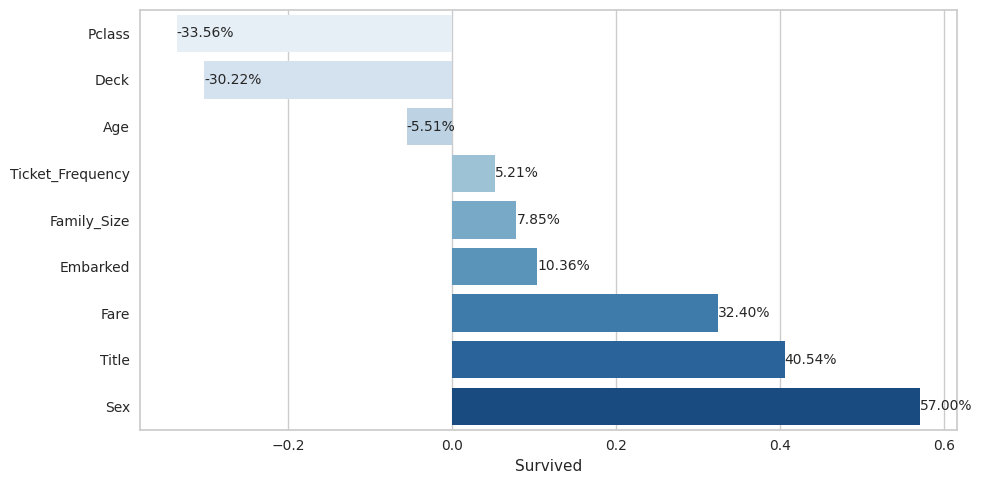

In [85]:
plt.figure(figsize = (10,5))
ax = sns.barplot(y=corr_by_survived.index, x=corr_by_survived, palette='Blues')

# Add the percentage values on top of each bar
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width())
    ax.annotate(percentage, 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Correlation with Target Feature; Survival:**
- Female passengers and those with the "Miss/Mrs" title show a strong positive correlation with survival.
- Male passengers and those with the "Mr" title have a negative correlation, indicating lower survival rates.
- Deck and Family_Size have moderate positive correlations with survival.
- Pclass shows a slight negative correlation, reflecting that first-class passengers had a higher chance of survival compared to those in lower classes.

These results align with the historical fact that women, children, and first-class passengers had a higher survival rate on the Titanic.

In [86]:
# User-Defined-Functions
#####################################################################################

# Function to Evaluate the Model Performans using Classification Confusion_matrix() 
# Also does the prediction in the function

def eval_metric(model, X_train, y_train, X_test, y_test, i):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
#####################################################################################

# Function to display Feature Importance
def plot_feature_importance(model, X_train, model_name, figsize=(8, 5)):
    """
    Plots the feature importances of a fitted model as a horizontal bar plot,
    with the importance values displayed next to the bars.
    """
    # Get feature importances
    feature_importances = model.feature_importances_
    
    # Create a Series for feature importances
    feats = pd.Series(data=feature_importances, index=X_train.columns).sort_values(ascending=False)
    
    # Plot the feature importances as a horizontal bar plot
    plt.figure(figsize=figsize)
    sns.barplot(y=feats.index, x=feats.values, orient='h', palette='Blues')

    # Add the importance values next to the bars
    for index, value in enumerate(feats.values):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

    # Add model name to the plot title
    plt.title(f"Feature Importances - {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
#####################################################################################

<a id='decisiontree'></a>
## 1. Decision Tree Classification (DTC) Model

In [87]:
# Model Building and Training

DTC_model = DecisionTreeClassifier(class_weight="balanced",random_state=101)
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=101)

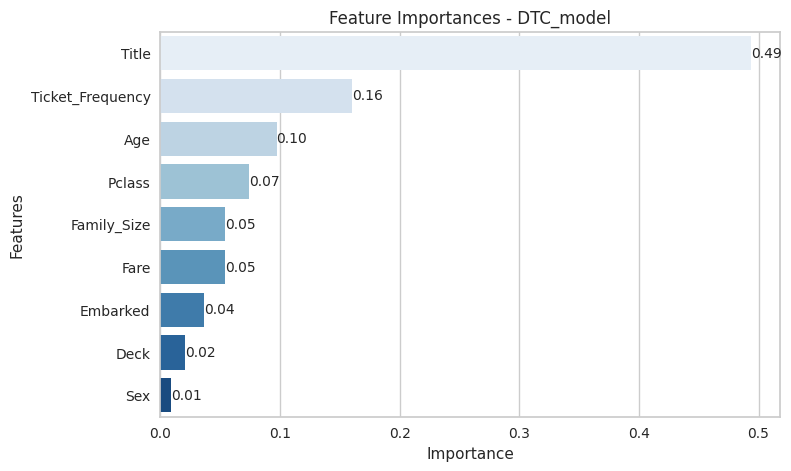

In [88]:
# Feature Importance
plot_feature_importance(DTC_model,X_train, 'DTC_model') 

In [89]:
# Predictions
y_pred = DTC_model.predict(X_test)
y_pred_train = DTC_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(DTC_model, X_train, y_train, X_test, y_test, 'DTC_vanilla_model')

DTC_vanilla_model Test_Set
[[93 17]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179


DTC_vanilla_model Train_Set
[[399  40]
 [ 25 248]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       439
           1       0.86      0.91      0.88       273

    accuracy                           0.91       712
   macro avg       0.90      0.91      0.90       712
weighted avg       0.91      0.91      0.91       712



### Model Validation

In [90]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(DTC_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.789294
train_accuracy           0.917135
test_precision_macro     0.778626
train_precision_macro    0.910288
test_recall_macro        0.777773
train_recall_macro       0.916696
test_f1_macro            0.777369
train_f1_macro           0.913109
dtype: float64

### Hyperparameter Optimization for DTC Model

In [91]:
DTC_model.get_params() # Parameters those are available for tuning for the model

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

In [ ]:
# DT Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = DecisionTreeClassifier(class_weight="balanced", random_state=101)

# Define the hyperparameters grid for tuning
param_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [None, 5, 10],  
    "min_samples_split": [2,10],  
    "min_samples_leaf": [1, 2], 
    "max_features": [None, "auto"],  
    "splitter": ["best", "random"], 
}

cv = StratifiedKFold(n_splits=5)

# GridSearchCV
DTC_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

In [93]:
print('Best Params:', DTC_grid_model.best_params_)
print('Best Recall Score(test):', DTC_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(DTC_grid_model.cv_results_).loc[DTC_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best Recall Score(test): 0.824107744107744
-----------------------------------------------------


mean_test_score     0.824108
mean_train_score    0.850765
Name: 66, dtype: object

### Evaluating The Grid Model Performance

In [94]:
# Predictions
y_pred = DTC_grid_model.predict(X_test)
y_pred_train = DTC_grid_model.predict(X_train)


# Metric Scores
DTC_grid_f1 = f1_score(y_test, y_pred)  
DTC_grid_recall = recall_score(y_test, y_pred)  
DTC_grid_auc = roc_auc_score(y_test, y_pred) 

DTC_grid_accuracy_test = accuracy_score(y_test, y_pred)
DTC_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = DTC_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
DTC_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(DTC_grid_model, X_train, y_train, X_test, y_test, 'DTC_grid_model')

DTC_grid_model Test_Set
[[93 17]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179


DTC_grid_model Train_Set
[[372  67]
 [ 45 228]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       439
           1       0.77      0.84      0.80       273

    accuracy                           0.84       712
   macro avg       0.83      0.84      0.84       712
weighted avg       0.85      0.84      0.84       712



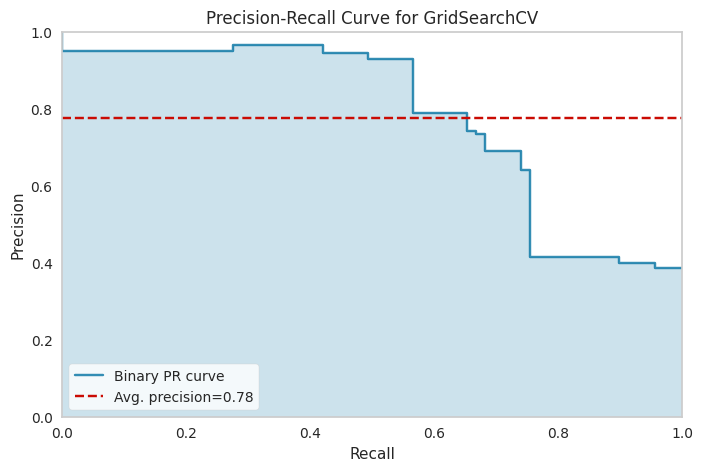

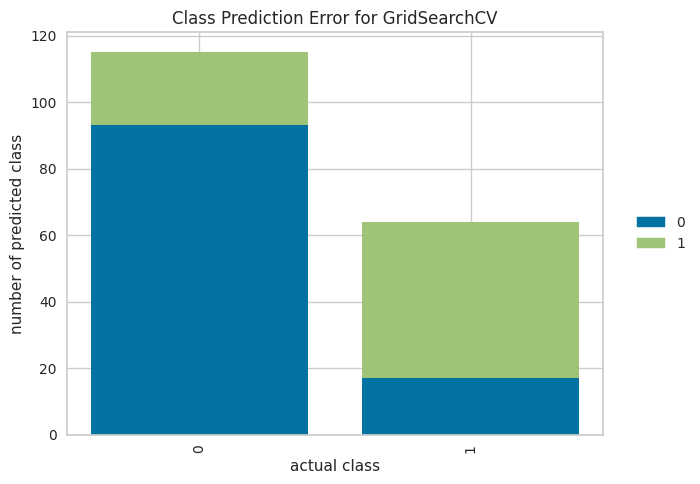

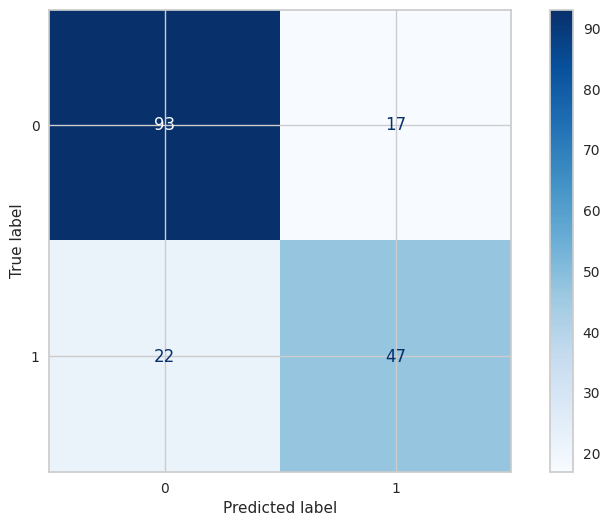

In [95]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(DTC_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(DTC_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(DTC_grid_model, X_test, y_test, cmap='Blues')

**Decision Tree Model:**
- The vanilla model shows higher scores on the training set but overfits, leading to a performance drop on the test set. 
- The GridSearchCV-tuned model has slightly lower training scores but performs consistently on both training and test sets, indicating better generalization. 

The GridSearchCV model is preferred for its balanced performance.

### Prediction with Best HyperParameters and Submission

In [96]:
# Initialize the DecisionTreeClassifier with the best parameters
DTC_best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=10,
    splitter='best',
    class_weight='balanced',
    random_state=101
)

# Fit the model to your training data
DTC_best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=10, random_state=101)

In [97]:
# Submission with DTC best model using the Submission Test Data
submit_DTC = DTC_best_model.predict(submission_test)

DTC_best_acc = accuracy_score(gender_submission['Survived'].values, submit_DTC)

print('DTC_best_model_accuracy score with submission prediction: ',DTC_best_acc)

DTC_best_model_accuracy score with submission prediction:  0.9114832535885168


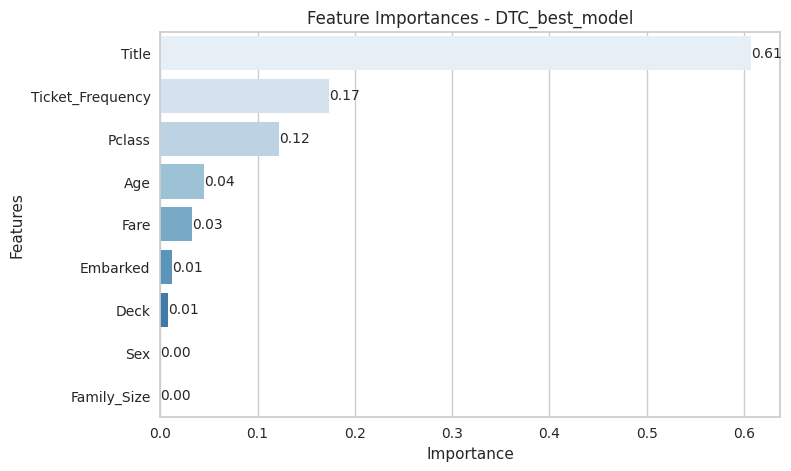

In [98]:
# Feature Importance
DTC_features = plot_feature_importance(DTC_best_model, submission_test, 'DTC_best_model') 

<a id='randomforest'></a>
## 2. Random Forest Classification Model

In [99]:
# Model Building and Training

RFC_model = RandomForestClassifier(class_weight="balanced",random_state=101)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

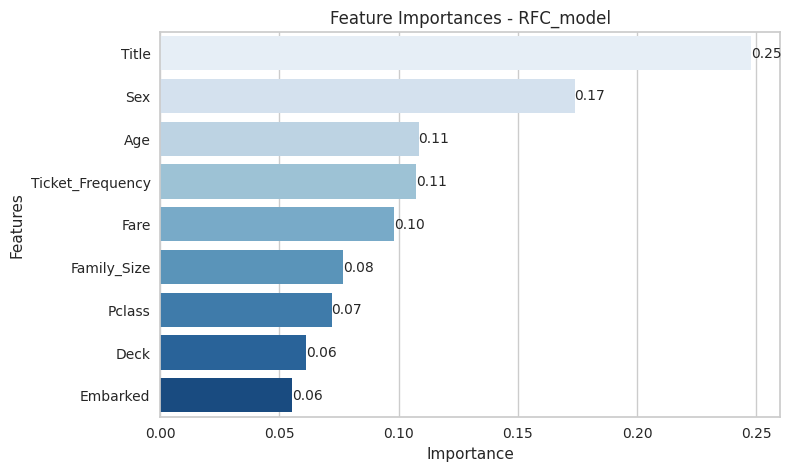

In [100]:
# Feature Importance
plot_feature_importance(RFC_model,X_train,'RFC_model') 

In [101]:
# Predictions
y_pred = RFC_model.predict(X_test)
y_pred_train = RFC_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(RFC_model, X_train, y_train, X_test, y_test, 'RFC_vanilla_model')

RFC_vanilla_model Test_Set
[[98 12]
 [25 44]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179


RFC_vanilla_model Train_Set
[[402  37]
 [ 28 245]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       439
           1       0.87      0.90      0.88       273

    accuracy                           0.91       712
   macro avg       0.90      0.91      0.90       712
weighted avg       0.91      0.91      0.91       712



### Model Validation

In [102]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(RFC_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.806146
train_accuracy           0.917135
test_precision_macro     0.798713
train_precision_macro    0.911356
test_recall_macro        0.792218
train_recall_macro       0.914451
test_f1_macro            0.793803
train_f1_macro           0.912736
dtype: float64

### Hyperparameter Optimization for Random Forest Model

In [103]:
RFC_model.get_params() # Parameters those are available for tuning for the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [104]:
# RF Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = RandomForestClassifier(class_weight="balanced",random_state=101)


param_grid = {           
            'n_estimators': [50,100],  
            'max_depth': [None, 2, 10],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [2,5],
            'max_features': ['sqrt', 'log2'],
            'max_samples':[0.5, 0.9]
             }
             


cv = StratifiedKFold(n_splits=5)

# GridSearchCV
RFC_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [105]:
print('Best Params:', RFC_grid_model.best_params_)
print('Best Recall Score(test):', RFC_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(RFC_grid_model.cv_results_).loc[RFC_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'max_depth': 2, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Recall Score(test): 0.7948148148148149
-----------------------------------------------------


mean_test_score     0.794815
mean_train_score    0.793951
Name: 32, dtype: object

### Evaluating The Grid Model Performance

In [106]:
# Predictions
y_pred = RFC_grid_model.predict(X_test)
y_pred_train = RFC_grid_model.predict(X_train)


# Metric Scores
RFC_grid_f1 = f1_score(y_test, y_pred)  
RFC_grid_recall = recall_score(y_test, y_pred)  
RFC_grid_auc = roc_auc_score(y_test, y_pred) 

RFC_grid_accuracy_test = accuracy_score(y_test, y_pred)
RFC_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = RFC_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
RFC_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(RFC_grid_model, X_train, y_train, X_test, y_test, 'RFC_grid_model')

RFC_grid_model Test_Set
[[96 14]
 [25 44]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.76      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179


RFC_grid_model Train_Set
[[369  70]
 [ 56 217]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       439
           1       0.76      0.79      0.77       273

    accuracy                           0.82       712
   macro avg       0.81      0.82      0.81       712
weighted avg       0.83      0.82      0.82       712



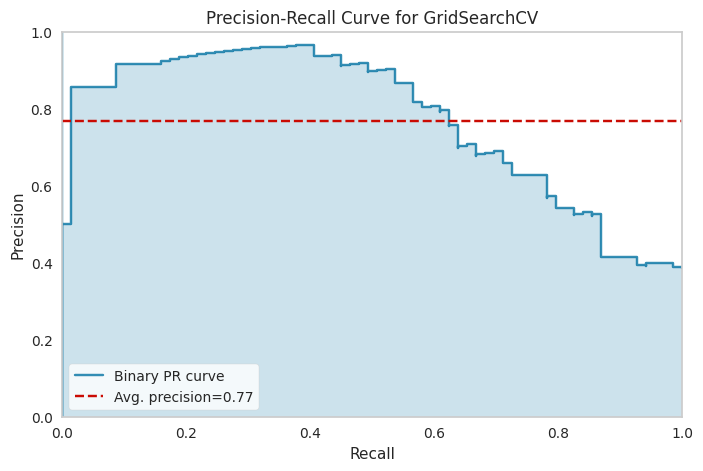

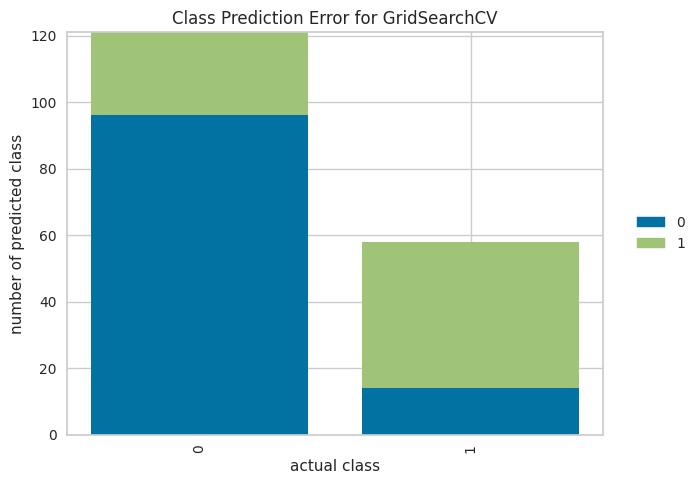

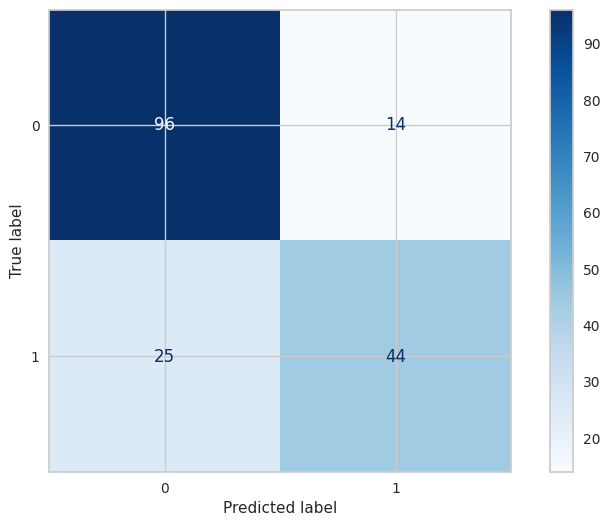

In [107]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(RFC_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(RFC_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(RFC_grid_model, X_test, y_test, cmap='Blues')

**Random Forest:**
- The vanilla Random Forest model slightly outperforms the Grid-Tuned model in test set accuracy (0.79 vs. 0.78) and F1-score (0.79 vs. 0.78).
- However, the Grid-Tuned model shows better balance between training and test performance, indicating less overfitting. 


 The vanilla model is slightly better in test performance, but the Grid-Tuned model offers more consistent generalization.

### Prediction with Best HyperParameters and Submission

In [108]:
# Initialize the RandomForestClassifier with the best parameters
RFC_best_model = RandomForestClassifier(
    max_depth=2,
    max_features='sqrt',
    max_samples=0.5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=50,
    random_state=101,  
    class_weight='balanced'
)

# Fit the model to your training data
RFC_best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_samples=0.5,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=101)

In [109]:
# Submission with RF best model using the Submission Test Data
submit_RFC = RFC_best_model.predict(submission_test)

RFC_best_acc = accuracy_score(gender_submission['Survived'].values, submit_RFC)

print('RFC_best_model_accuracy score with submission prediction: ',RFC_best_acc)

RFC_best_model_accuracy score with submission prediction:  0.9473684210526315


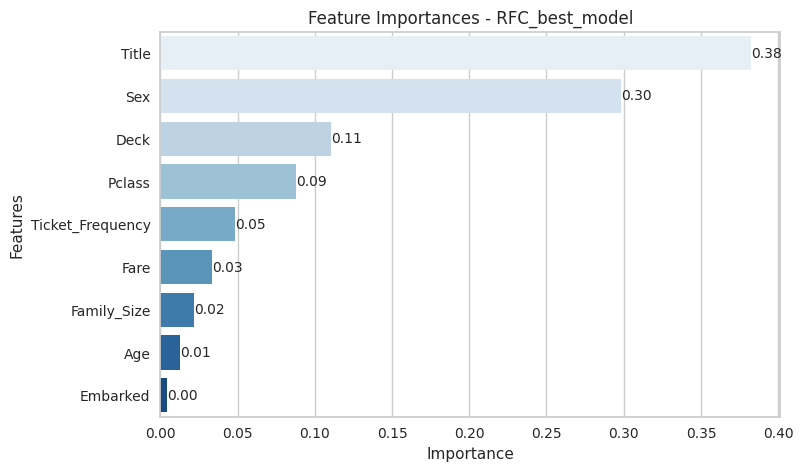

In [110]:
# Feature Importance
plot_feature_importance(RFC_best_model, submission_test, 'RFC_best_model') 

<a id='adaboost'></a>
## AdaBoost Classification

In [111]:
# Model Building and Training

ADA_model = AdaBoostClassifier(random_state=101)
ADA_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=101)

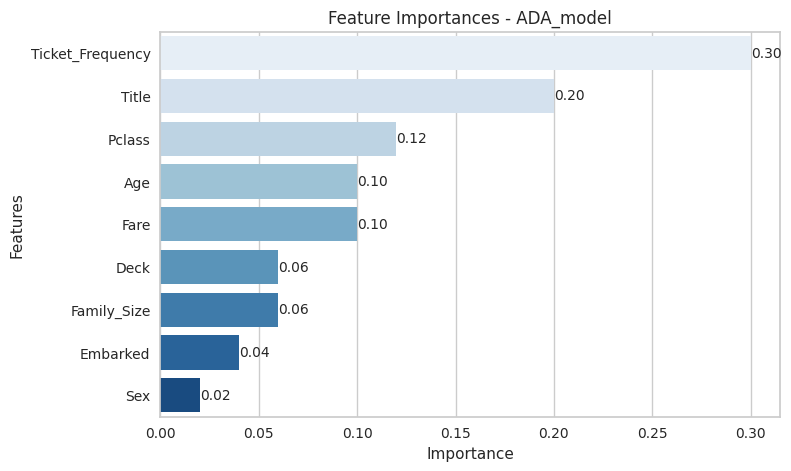

In [112]:
# Feature Importance
plot_feature_importance(ADA_model,X_train, 'ADA_model') 

In [113]:
# Predictions
y_pred = ADA_model.predict(X_test)
y_pred_train = ADA_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(ADA_model, X_train, y_train, X_test, y_test, 'ADA_vanilla_model')

ADA_vanilla_model Test_Set
[[101   9]
 [ 24  45]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179


ADA_vanilla_model Train_Set
[[389  50]
 [ 61 212]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       439
           1       0.81      0.78      0.79       273

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



### Model Validation

In [114]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(ADA_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.821590
train_accuracy           0.839891
test_precision_macro     0.813060
train_precision_macro    0.830914
test_recall_macro        0.812265
train_recall_macro       0.830173
test_f1_macro            0.811308
train_f1_macro           0.830518
dtype: float64

### Hyperparameter Optimization for Ada Boost Model

In [115]:
ADA_model.get_params() # Parameters those are available for tuning for the model

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 101}

In [116]:
# ADA Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = AdaBoostClassifier( random_state=101)

# Define the hyperparameters grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]
}


cv = StratifiedKFold(n_splits=5)

# GridSearchCV
ADA_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [117]:
print('Best Params:', ADA_grid_model.best_params_)
print('Best Recall Score(test):', ADA_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(ADA_grid_model.cv_results_).loc[ADA_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'learning_rate': 1.0, 'n_estimators': 200}
Best Recall Score(test): 0.7873400673400673
-----------------------------------------------------


mean_test_score      0.78734
mean_train_score    0.803121
Name: 14, dtype: object

### Evaluating The Grid Model Performance

In [118]:
# Predictions
y_pred = ADA_grid_model.predict(X_test)
y_pred_train = ADA_grid_model.predict(X_train)


# Metric Scores
ADA_grid_f1 = f1_score(y_test, y_pred)  
ADA_grid_recall = recall_score(y_test, y_pred)  
ADA_grid_auc = roc_auc_score(y_test, y_pred) 

ADA_grid_accuracy_test = accuracy_score(y_test, y_pred)
ADA_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = ADA_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
ADA_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(ADA_grid_model, X_train, y_train, X_test, y_test, 'ADA_grid_model')

ADA_grid_model Test_Set
[[100  10]
 [ 21  48]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179


ADA_grid_model Train_Set
[[382  57]
 [ 55 218]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       439
           1       0.79      0.80      0.80       273

    accuracy                           0.84       712
   macro avg       0.83      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



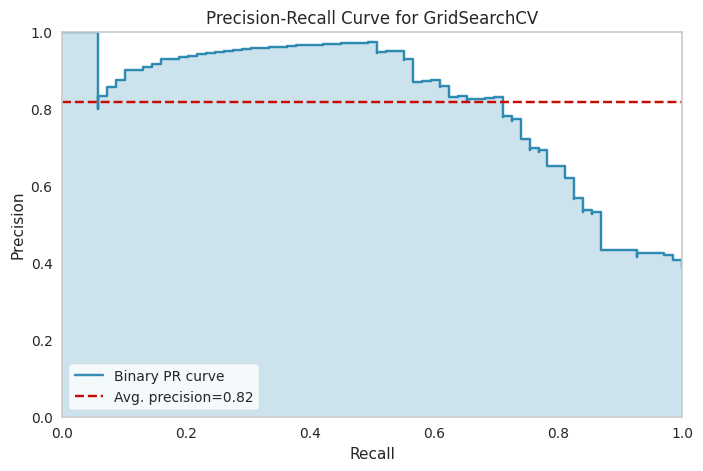

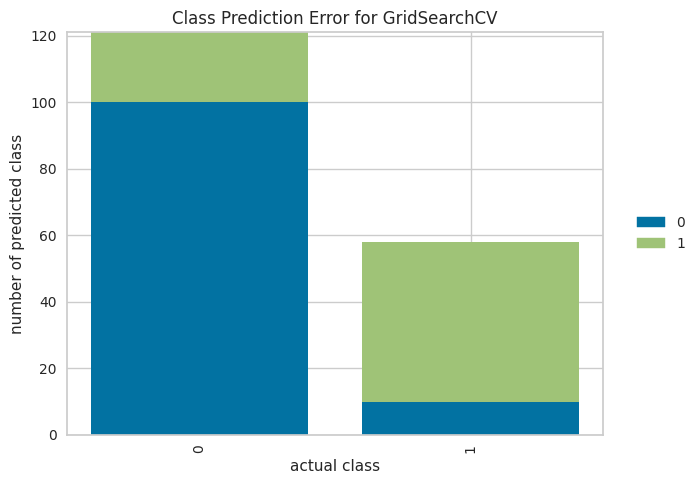

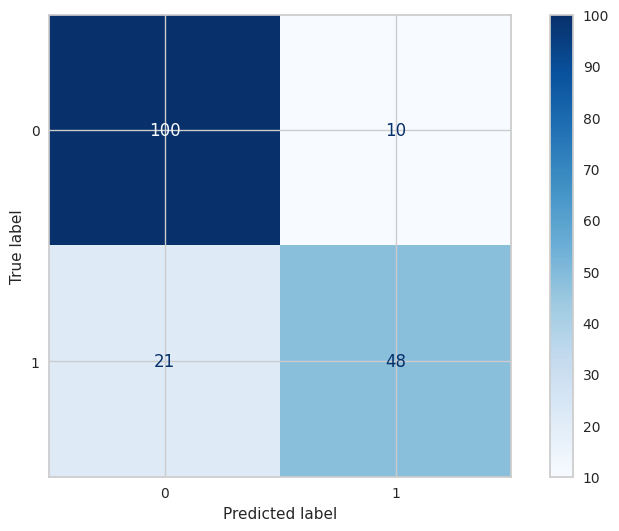

In [119]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(ADA_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(ADA_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
#plt.figure(figsize=(8,5))
ConfusionMatrixDisplay.from_estimator(ADA_grid_model, X_test, y_test, cmap='Blues')

**AdaBoost Model:**
- The comparison between the vanilla and GridSearch-tuned AdaBoost models shows that both perform similarly on the test set. 
- The Grid-Tuned model slightly improves precision and F1-score for class 1 but at the cost of a slight decrease in recall. 

Overall, the Grid-Tuned model achieves a better balance between precision and recall, with a small improvement in macro and weighted averages, making it the preferable choice for more consistent performance across classes.

### Prediction with Best HyperParameters and Submission

In [120]:
# Initialize the AdaBoostClassifier with the best parameters
ADA_best_model = AdaBoostClassifier(learning_rate= 1.0, n_estimators= 200, random_state=101)

# Fit the model to your training data
ADA_best_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=101)

In [121]:
# Submission with the best model using the Submission Test Data
submit_ADA = ADA_best_model.predict(submission_test)

ADA_best_acc = accuracy_score(gender_submission['Survived'].values, submit_ADA)

print('ADA_best_model_accuracy score with submission prediction: ',ADA_best_acc)

ADA_best_model_accuracy score with submission prediction:  0.9138755980861244


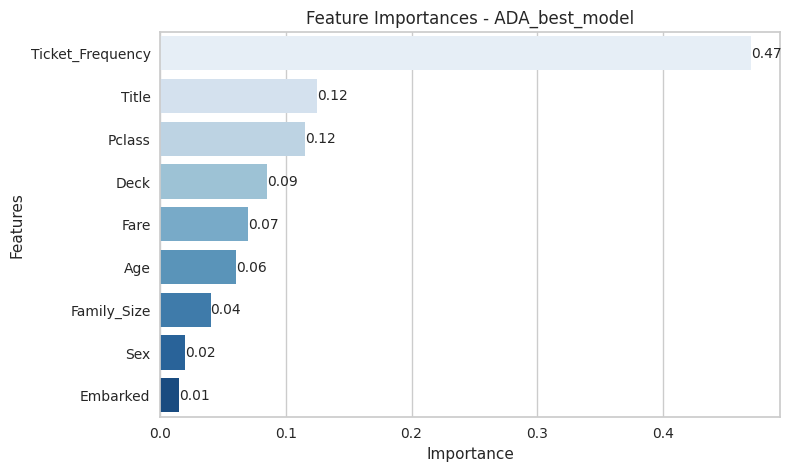

In [122]:
# Feature Importance
plot_feature_importance(ADA_best_model, submission_test, 'ADA_best_model') 

<a id='gradient'></a>
## Gradient Boosting Classification

In [123]:
# Model Building and Training

GRB_model = GradientBoostingClassifier(random_state=101) # class_weight="balanced",
GRB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=101)

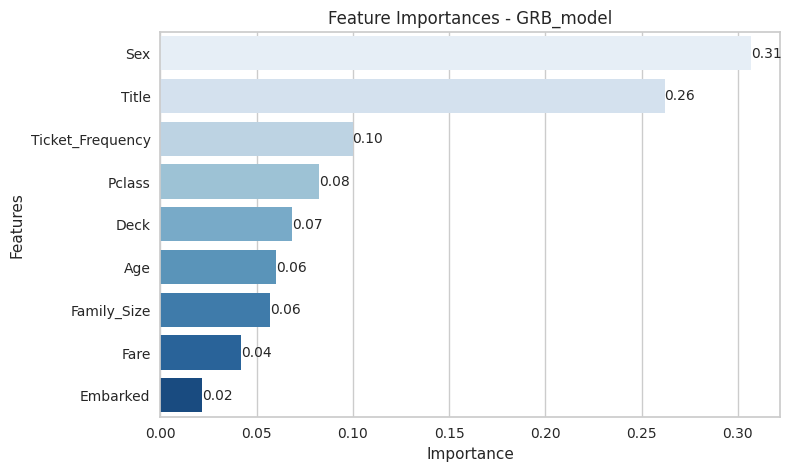

In [124]:
# Feature Importance
plot_feature_importance(GRB_model,X_train, 'GRB_model') 

In [125]:
# Predictions
y_pred = GRB_model.predict(X_test)
y_pred_train = GRB_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(GRB_model, X_train, y_train, X_test, y_test, 'GRB_vanilla_model')

GRB_vanilla_model Test_Set
[[108   2]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       110
           1       0.96      0.64      0.77        69

    accuracy                           0.85       179
   macro avg       0.88      0.81      0.83       179
weighted avg       0.87      0.85      0.84       179


GRB_vanilla_model Train_Set
[[409  30]
 [ 60 213]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       439
           1       0.88      0.78      0.83       273

    accuracy                           0.87       712
   macro avg       0.87      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712



### Model Validation

In [126]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(GRB_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.835654
train_accuracy           0.885882
test_precision_macro     0.831847
train_precision_macro    0.884808
test_recall_macro        0.816935
train_recall_macro       0.872312
test_f1_macro            0.822513
train_f1_macro           0.877470
dtype: float64

### Hyperparameter Optimization for Gradient Boosting Model

In [127]:
GRB_model.get_params() # Parameters those are available for tuning for the model

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 101,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [128]:
# Gradient Boosting Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = GradientBoostingClassifier(random_state=101)

# Define the hyperparameters grid for tuning
param_grid = {
    "n_estimators": [100, 200],
    "subsample": [0.5, 1],
    "max_features": [None, 2, 3],
    "learning_rate": [0.001, 0.01],
    'max_depth': [3, 4, 5]
}



cv = StratifiedKFold(n_splits=5)

# GridSearchCV
GRB_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [129]:
print('Best Params:', GRB_grid_model.best_params_)
print('Best Recall Score(test):', GRB_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(GRB_grid_model.cv_results_).loc[GRB_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': None, 'n_estimators': 200, 'subsample': 1}
Best Recall Score(test): 0.7655218855218855
-----------------------------------------------------


mean_test_score     0.765522
mean_train_score    0.771974
Name: 39, dtype: object

### Evaluating The Grid Model Performance

In [130]:
# Predictions
y_pred = GRB_grid_model.predict(X_test)
y_pred_train = GRB_grid_model.predict(X_train)


# Metric Scores
GRB_grid_f1 = f1_score(y_test, y_pred)  
GRB_grid_recall = recall_score(y_test, y_pred)  
GRB_grid_auc = roc_auc_score(y_test, y_pred) 

GRB_grid_accuracy_test = accuracy_score(y_test, y_pred)
GRB_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = GRB_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
GRB_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(GRB_grid_model, X_train, y_train, X_test, y_test, 'GRB_grid_model')

GRB_grid_model Test_Set
[[102   8]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       110
           1       0.84      0.59      0.69        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179


GRB_grid_model Train_Set
[[392  47]
 [ 64 209]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       439
           1       0.82      0.77      0.79       273

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



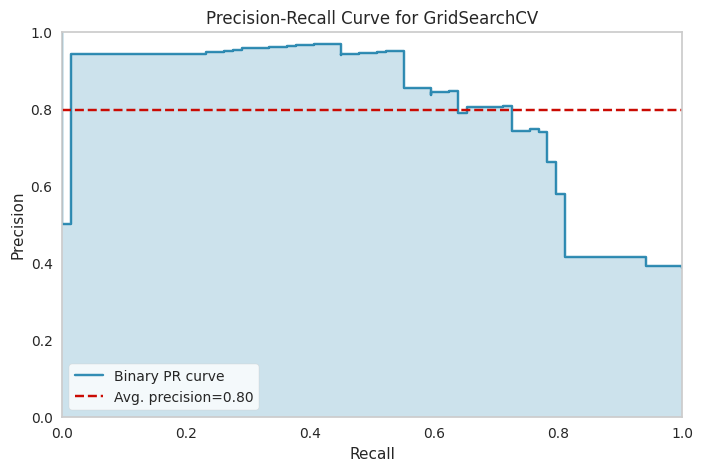

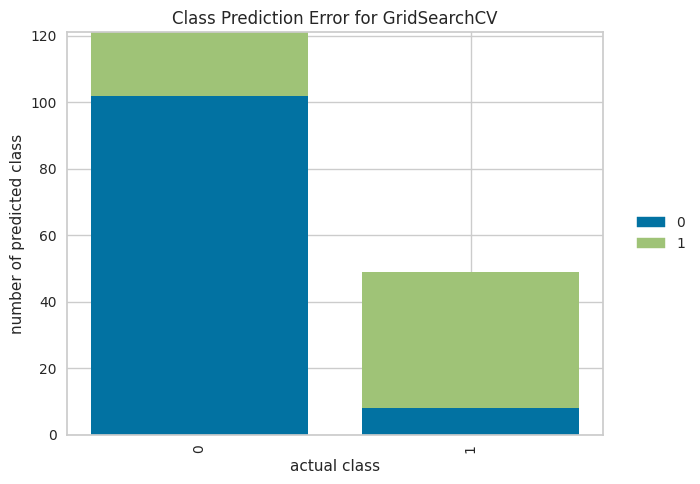

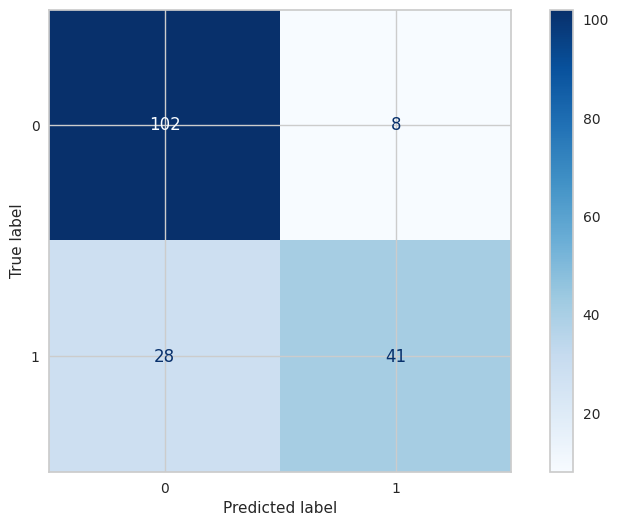

In [131]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(GRB_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(GRB_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
#plt.figure(figsize=(8,5))
ConfusionMatrixDisplay.from_estimator(GRB_grid_model, X_test, y_test, cmap='Blues')

**Gradient Boosting model:**
- The vanilla Gradient Boosting model outperforms the Grid-Tuned model in test set accuracy (0.88 vs. 0.81) and F1-score (0.85 vs. 0.80). 
- The vanilla model has a higher recall for class 1 (0.64 vs. 0.59), indicating it captures more of the true positive cases. 
- However, the Grid-Tuned model offers slightly better generalization with a more balanced performance between precision and recall, but it sacrifices some accuracy and F1-score. 

The vanilla model is preferable for higher accuracy, while the Grid-Tuned model may be chosen for a more balanced performance across metrics.

### Prediction with Best HyperParameters and Submission

In [132]:
# Initialize the GradientBoostingClassifier with the best parameters
GRB_best_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    max_features=None,
    n_estimators=200,
    subsample=1,
    random_state=101  # Ensuring reproducibility
)
# Fit the model to your training data
GRB_best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=101, subsample=1)

In [133]:
# Submission with the best model using the Submission Test Data
submit_GRB = GRB_best_model.predict(submission_test)

GRB_best_acc = accuracy_score(gender_submission['Survived'].values, submit_GRB)

print('GRB_best_accuracy score with submission prediction: ',GRB_best_acc)

GRB_best_accuracy score with submission prediction:  0.9569377990430622


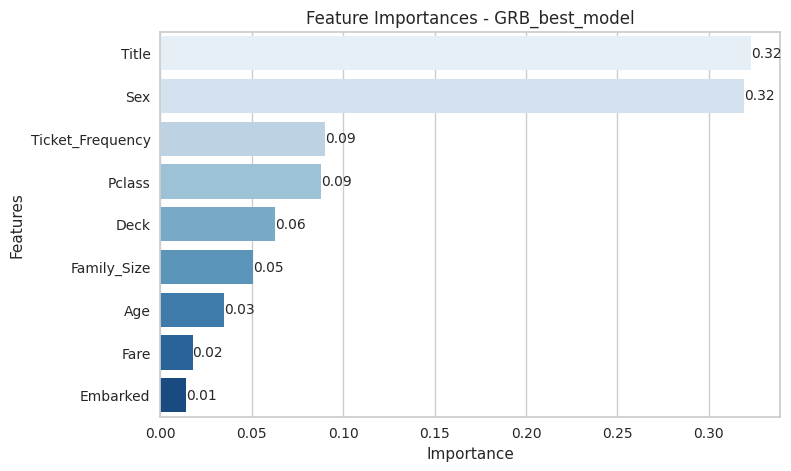

In [134]:
# Feature Importance
plot_feature_importance(GRB_best_model, submission_test, 'GRB_best_model') 

<a id='xgboost'></a>
## XGBoost Classification

In [135]:
# Model Building and Training

XGB_model = XGBClassifier(random_state=101) # class_weight="balanced",
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

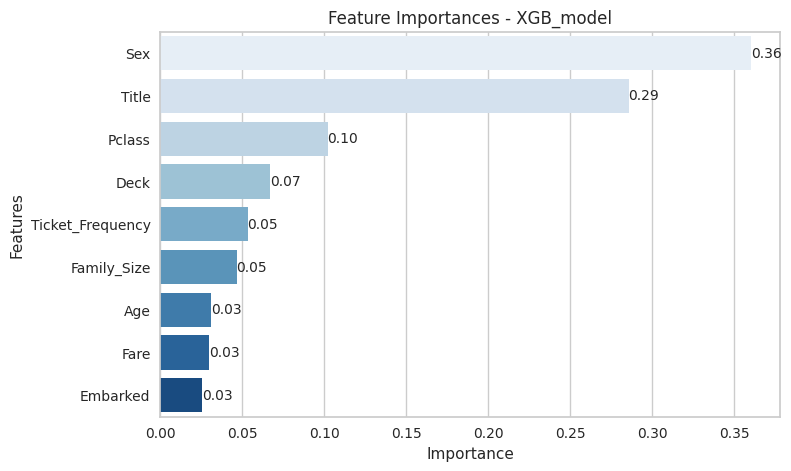

In [136]:
# Feature Importance
plot_feature_importance(XGB_model,X_train,'XGB_model') 

In [137]:
# Predictions
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(XGB_model, X_train, y_train, X_test, y_test, 'XGB_vanilla_model')

XGB_vanilla_model Test_Set
[[101   9]
 [ 27  42]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       110
           1       0.82      0.61      0.70        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179


XGB_vanilla_model Train_Set
[[417  22]
 [ 45 228]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       439
           1       0.91      0.84      0.87       273

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



### Model Validation

In [138]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(XGB_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.811721
train_accuracy           0.912919
test_precision_macro     0.807515
train_precision_macro    0.913013
test_recall_macro        0.794731
train_recall_macro       0.901858
test_f1_macro            0.798351
train_f1_macro           0.906696
dtype: float64

### Hyperparameter Optimization for XGBoost Model

In [139]:
XGB_model.get_params() # Parameters those are available for tuning for the model

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 101,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [140]:
# XGB Boosting Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = XGBClassifier(random_state=101)

# Define the hyperparameters grid for tuning
param_grid = {
    "booster": ['dart', 'gbtree'],
    "eta": [0.05, 0.1],
    "n_estimators": [100, 150],
    'max_depth': [2, 3],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.6, 0.8],
    'reg_alpha': [0, 0.5]
}


cv = StratifiedKFold(n_splits=5)

# GridSearchCV
XGB_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [141]:
print('Best Params:', XGB_grid_model.best_params_)
print('Best Recall Score(test):', XGB_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(XGB_grid_model.cv_results_).loc[XGB_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'booster': 'dart', 'colsample_bytree': 0.8, 'eta': 0.05, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'subsample': 0.8}
Best Recall Score(test): 0.743973063973064
-----------------------------------------------------


mean_test_score     0.743973
mean_train_score    0.782967
Name: 89, dtype: object

### Evaluating The Grid Model Performance

In [142]:
# Predictions
y_pred = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)


# Metric Scores
XGB_grid_f1 = f1_score(y_test, y_pred)  
XGB_grid_recall = recall_score(y_test, y_pred)  
XGB_grid_auc = roc_auc_score(y_test, y_pred) 

XGB_grid_accuracy_test = accuracy_score(y_test, y_pred)
XGB_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = XGB_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
XGB_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(XGB_grid_model, X_train, y_train, X_test, y_test, 'XGB_grid_model')

XGB_grid_model Test_Set
[[103   7]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       110
           1       0.86      0.64      0.73        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.83      0.82      0.81       179


XGB_grid_model Train_Set
[[402  37]
 [ 61 212]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       439
           1       0.85      0.78      0.81       273

    accuracy                           0.86       712
   macro avg       0.86      0.85      0.85       712
weighted avg       0.86      0.86      0.86       712



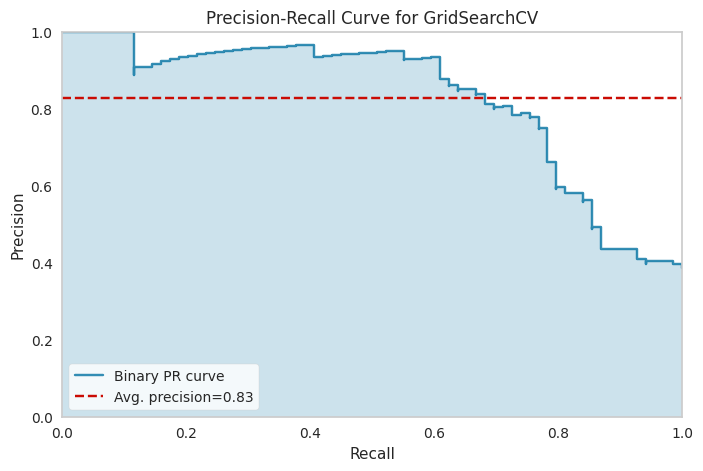

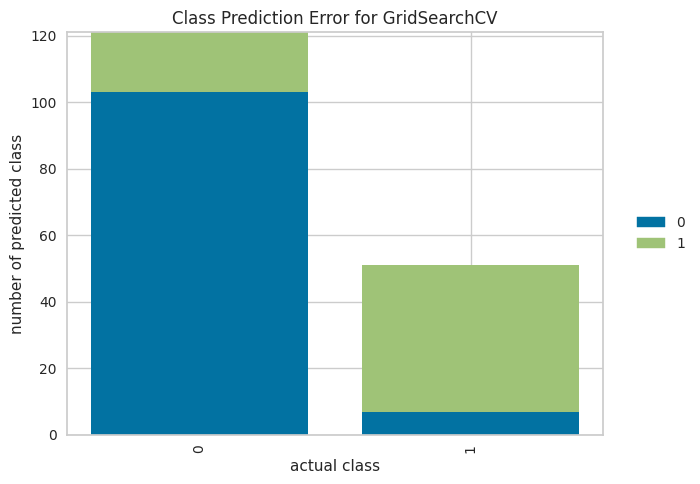

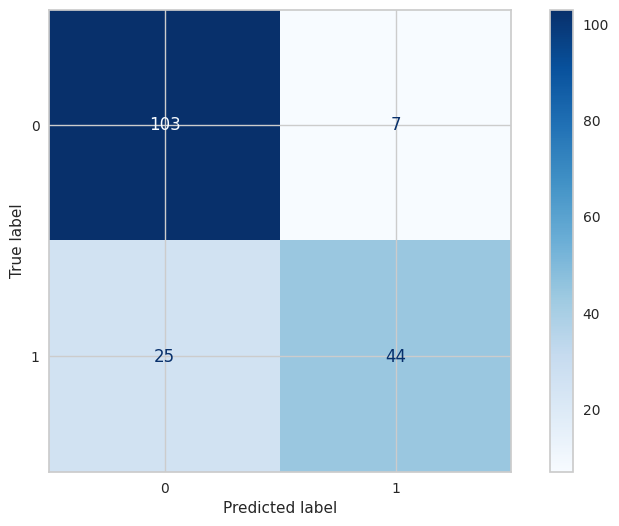

In [143]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(XGB_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(XGB_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
#plt.figure(figsize=(8,5))
ConfusionMatrixDisplay.from_estimator(XGB_grid_model, X_test, y_test, cmap='Blues')

**Gradient Boosting model:**
- The vanilla Gradient Boosting model outperforms the Grid-Tuned model in test set accuracy (0.88 vs. 0.81) and F1-score (0.85 vs. 0.80). 
- The vanilla model has a higher recall for class 1 (0.64 vs. 0.59), indicating it captures more of the true positive cases. 
- However, the Grid-Tuned model offers slightly better generalization with a more balanced performance between precision and recall, but it sacrifices some accuracy and F1-score. 

The vanilla model is preferable for higher accuracy, while the Grid-Tuned model may be chosen for a more balanced performance across metrics.

### Prediction with Best HyperParameters and Submission

In [144]:
# Initialize the GradientBoostingClassifier with the best parameters
XGB_best_model = XGBClassifier(
    booster='dart',
    colsample_bytree=0.5,
    eta=0.1,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    reg_alpha=0,
    subsample=0.5,
    random_state=101
)
# Fit the model to your training data
XGB_best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [145]:
# Submission with the best model using the Submission Test Data
submit_XGB = XGB_best_model.predict(submission_test)

XGB_best_acc = accuracy_score(gender_submission['Survived'].values, submit_XGB)

print('XGB_best_model_accuracy score with submission prediction: ',XGB_best_acc)

XGB_best_model_accuracy score with submission prediction:  0.8421052631578947


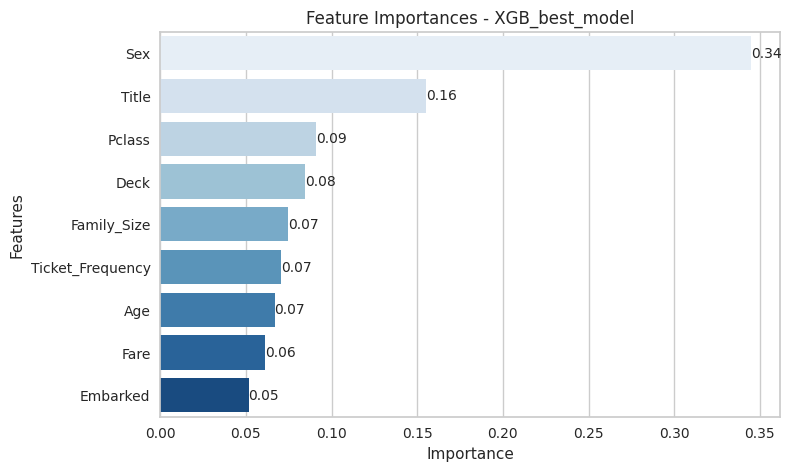

In [146]:
# Feature Importance
plot_feature_importance(XGB_best_model, submission_test, 'XGB_best_model') 

<a id='lightboost'></a>
## LightBoost Classification

In [ ]:
# Model Building and Training

LGBM_model = LGBMClassifier(random_state=101) 
LGBM_model.fit(X_train, y_train)

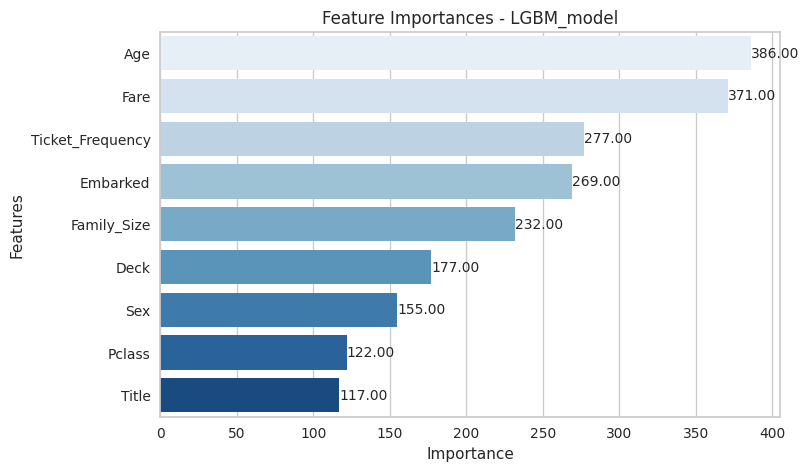

In [148]:
# Feature Importance
plot_feature_importance(LGBM_model,X_train, 'LGBM_model') 

In [149]:
# Predictions
y_pred = LGBM_model.predict(X_test)
y_pred_train = LGBM_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(LGBM_model, X_train, y_train, X_test, y_test, 'LGBM_vanilla_model')

LGBM_vanilla_model Test_Set
[[105   5]
 [ 24  45]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       110
           1       0.90      0.65      0.76        69

    accuracy                           0.84       179
   macro avg       0.86      0.80      0.82       179
weighted avg       0.85      0.84      0.83       179


LGBM_vanilla_model Train_Set
[[417  22]
 [ 55 218]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       439
           1       0.91      0.80      0.85       273

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712



### Model Validation

In [ ]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(LGBM_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 

In [151]:
df_scores.mean()[2:]

test_accuracy            0.821590
train_accuracy           0.891852
test_precision_macro     0.817520
train_precision_macro    0.893268
test_recall_macro        0.805592
train_recall_macro       0.876455
test_f1_macro            0.808730
train_f1_macro           0.883299
dtype: float64

### Hyperparameter Optimization for LightGBM Model

In [152]:
LGBM_model.get_params() # Parameters those are available for tuning for the model

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 101,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
# LGBM Boosting Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = LGBMClassifier(random_state=101)

# Define the hyperparameters grid for tuning
param_grid = {
    "boosting_type": ['dart', 'gbdt'],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [100, 150],
    'max_depth': [2, 3],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.6, 0.8],
    'reg_alpha': [0, 0.5]
}

cv = StratifiedKFold(n_splits=5)

# GridSearchCV
LGBM_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

In [154]:
print('Best Params:', LGBM_grid_model.best_params_)
print('Best Recall Score(test):', LGBM_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(LGBM_grid_model.cv_results_).loc[LGBM_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'boosting_type': 'dart', 'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150, 'reg_alpha': 0, 'subsample': 0.6}
Best Recall Score(test): 0.7692255892255893
-----------------------------------------------------


mean_test_score     0.769226
mean_train_score    0.767396
Name: 4, dtype: object

### Evaluating The Grid Model Performance

In [155]:
# Predictions
y_pred = LGBM_grid_model.predict(X_test)
y_pred_train = LGBM_grid_model.predict(X_train)


# Metric Scores
LGBM_grid_f1 = f1_score(y_test, y_pred)  
LGBM_grid_recall = recall_score(y_test, y_pred)  
LGBM_grid_auc = roc_auc_score(y_test, y_pred) 

LGBM_grid_accuracy_test = accuracy_score(y_test, y_pred)
LGBM_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = LGBM_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
LGBM_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(LGBM_grid_model, X_train, y_train, X_test, y_test, 'LGBM_grid_model')

LGBM_grid_model Test_Set
[[102   8]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.85      0.64      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179


LGBM_grid_model Train_Set
[[386  53]
 [ 64 209]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       439
           1       0.80      0.77      0.78       273

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.83      0.84      0.84       712



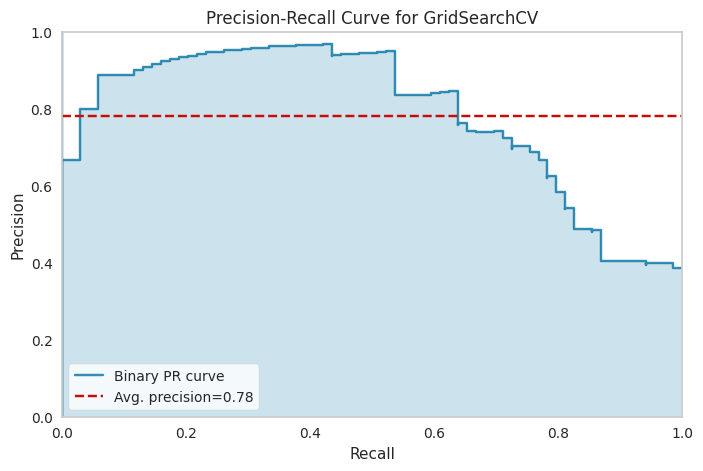

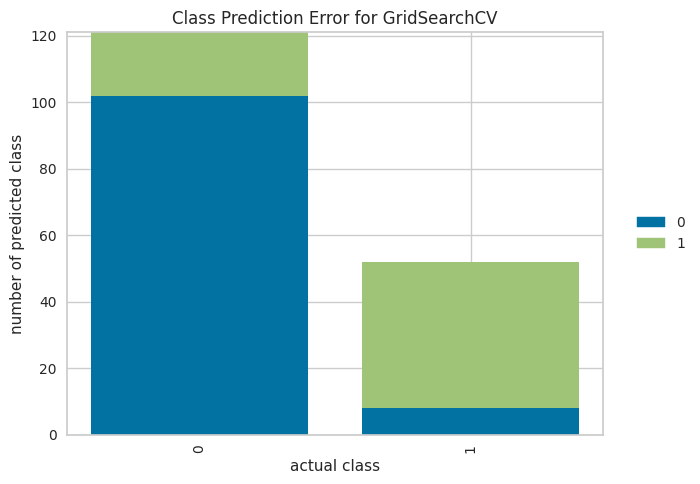

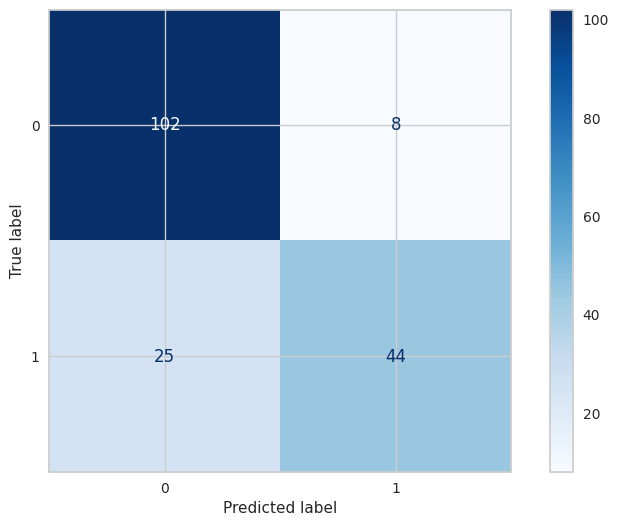

In [156]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(LGBM_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(LGBM_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(LGBM_grid_model, X_test, y_test, cmap='Blues')

**LGBM Boosting model:**

- The vanilla LGBM model demonstrates better overall performance on the test set with higher precision, recall, and F1-score for both classes compared to the grid-tuned model. 
- However, the grid-tuned model improves recall, which might be crucial if the goal is to capture more positive instances. 

### Prediction with Best HyperParameters and Submission

In [157]:
# Initialize the LGBM with the best parameters
LGBM_best_model = LGBMClassifier(
                    boosting_type='dart',
                    colsample_bytree=0.6,
                    learning_rate=0.05,
                    max_depth=2,
                    n_estimators=150,
                    reg_alpha=0,
                    subsample=0.6,
                    random_state=101 
)
# Fit the model to your training data
LGBM_best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028


LGBMClassifier(boosting_type='dart', colsample_bytree=0.6, learning_rate=0.05,
               max_depth=2, n_estimators=150, random_state=101, reg_alpha=0,
               subsample=0.6)

In [158]:
# Submission with the best model using the Submission Test Data
submit_LGBM = LGBM_best_model.predict(submission_test)

LGBM_best_acc = accuracy_score(gender_submission['Survived'].values, submit_LGBM)

print('LGBM_best_model_accuracy score with submission prediction: ',LGBM_best_acc)

LGBM_best_model_accuracy score with submission prediction:  0.9569377990430622


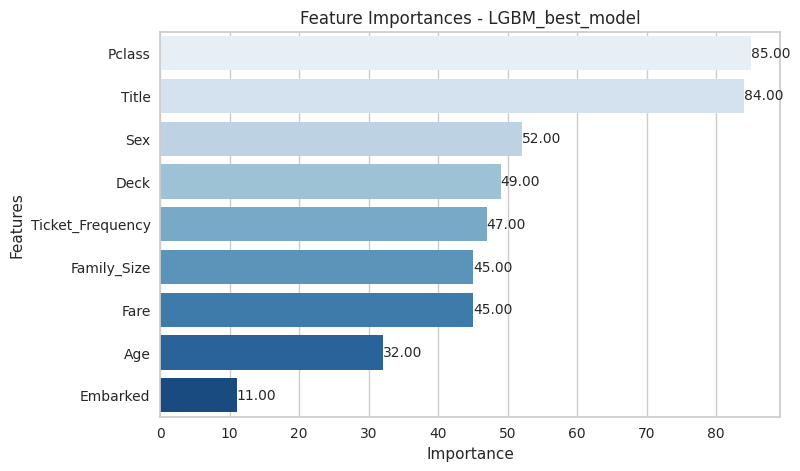

In [159]:
# Feature Importance
plot_feature_importance(LGBM_best_model, submission_test,'LGBM_best_model') 

<a id='catboost'></a>
## CatBoost Classification

In [160]:
# Model Building and Training

CATB_model = CatBoostClassifier(silent=True, random_state=101) 
CATB_model.fit(X_train, y_train)

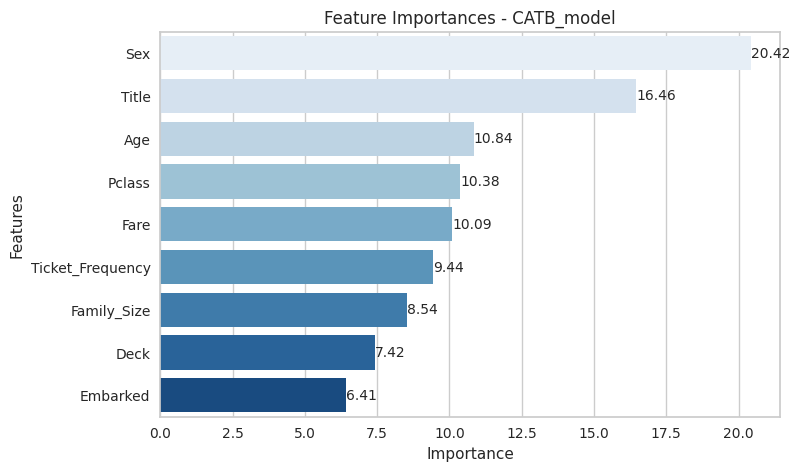

In [161]:
# Feature Importance
plot_feature_importance(CATB_model,X_train, 'CATB_model') 

In [162]:
# Predictions
y_pred = CATB_model.predict(X_test)
y_pred_train = CATB_model.predict(X_train)

# Evaluating the Model Performance using Classification Metrics
eval_metric(CATB_model, X_train, y_train, X_test, y_test, 'CATB_vanilla_model')

CATB_vanilla_model Test_Set
[[105   5]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       110
           1       0.90      0.64      0.75        69

    accuracy                           0.83       179
   macro avg       0.85      0.80      0.81       179
weighted avg       0.84      0.83      0.83       179


CATB_vanilla_model Train_Set
[[419  20]
 [ 56 217]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       439
           1       0.92      0.79      0.85       273

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712



### Model Validation

In [163]:
# Cross Validation Scores of the Model: Overfitting Control

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(CATB_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.834246
train_accuracy           0.897471
test_precision_macro     0.832188
train_precision_macro    0.901350
test_recall_macro        0.814381
train_recall_macro       0.880839
test_f1_macro            0.820484
train_f1_macro           0.888956
dtype: float64

### Hyperparameter Optimization for CatBoost Model

In [164]:
# CatBoost model Hyperparameters Tuning with GridSearchSV 

# Reset the model
model = CatBoostClassifier(silent=True,random_state=101)

# Define the hyperparameters grid for tuning
param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.1],
    'iterations': [100, 300],
    'l2_leaf_reg': [3, 5],
    'border_count': [32, 64],
    'boosting_type': ['Plain']
}
cv = StratifiedKFold(n_splits=5)

# GridSearchCV
CATB_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring="recall",   # Since Titanic has imbalanced classes, recall is important
                          n_jobs=-1,          # Use all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Fit the grid search model

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [165]:
print('Best Params:', CATB_grid_model.best_params_)
print('Best Recall Score(test):', CATB_grid_model.best_score_)
print('-----------------------------------------------------')

# Checking overfiting of Grid Model with the CV scores
pd.DataFrame(CATB_grid_model.cv_results_).loc[CATB_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

Best Params: {'boosting_type': 'Plain', 'border_count': 32, 'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Best Recall Score(test): 0.7655218855218855
-----------------------------------------------------


mean_test_score     0.765522
mean_train_score    0.765565
Name: 8, dtype: object

### Evaluating The Grid Model Performance

In [166]:
# Predictions
y_pred = CATB_grid_model.predict(X_test)
y_pred_train = CATB_grid_model.predict(X_train)

# Metric Scores
CATB_grid_f1 = f1_score(y_test, y_pred)  
CATB_grid_recall = recall_score(y_test, y_pred)  
CATB_grid_auc = roc_auc_score(y_test, y_pred) 

CATB_grid_accuracy_test = accuracy_score(y_test, y_pred)
CATB_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = CATB_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
CATB_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(CATB_grid_model, X_train, y_train, X_test, y_test, 'CATB_grid_model')

CATB_grid_model Test_Set
[[101   9]
 [ 27  42]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       110
           1       0.82      0.61      0.70        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179


CATB_grid_model Train_Set
[[390  49]
 [ 63 210]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       439
           1       0.81      0.77      0.79       273

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



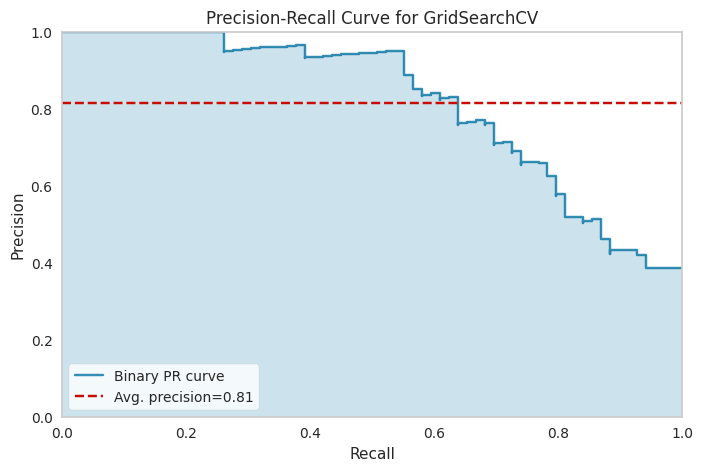

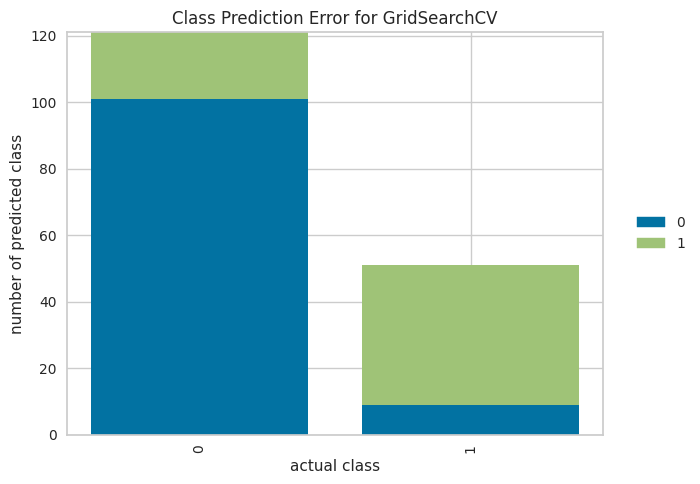

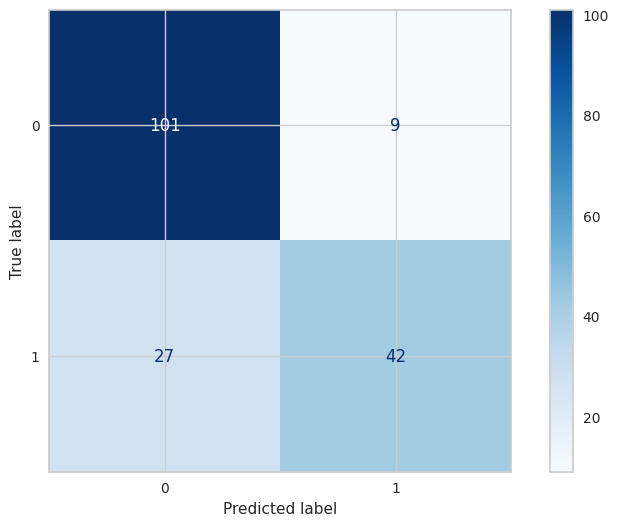

In [167]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(CATB_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(CATB_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(CATB_grid_model, X_test, y_test, cmap='Blues')

### Prediction with Best HyperParameters and Submission

In [168]:
# Initialize the CATB with the best parameters
CATB_best_model = CatBoostClassifier(
    boosting_type='Plain',
    border_count=32,
    depth=6,
    iterations=100,
    l2_leaf_reg=3,
    learning_rate=0.01,
    random_state=101,
    silent=True 
)

# Fit the model to your training data
CATB_best_model.fit(X_train, y_train)

In [169]:
# Submission with the best model using the Submission Test Data
submit_CATB = CATB_best_model.predict(submission_test)

CATB_best_acc = accuracy_score(gender_submission['Survived'].values, submit_CATB)

print('CATB_best_model_accuracy score with submission prediction: ',CATB_best_acc)

CATB_best_model_accuracy score with submission prediction:  0.9521531100478469


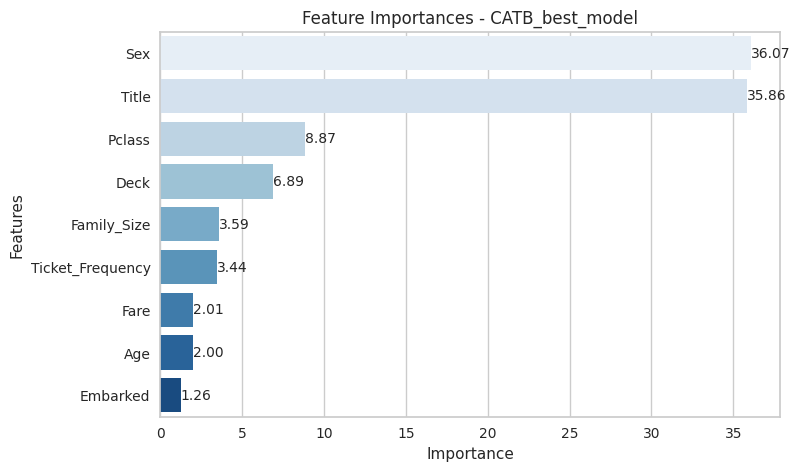

In [170]:
# Feature Importance
plot_feature_importance(CATB_best_model, submission_test,'CATB_best_model') 

<a id='stacking'></a>
## Stacking Classification Model

In [172]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=101)),
    ('ada', AdaBoostClassifier(random_state=101)),
    ('gb', GradientBoostingClassifier(random_state=101)),
    ('xgb', XGBClassifier(random_state=101, use_label_encoder=False, eval_metric='logloss'))
]

# Define meta model
meta_model = LogisticRegression(random_state=101)

# Create the StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


### Hyperparameter Optimization for Stacking Model

In [ ]:
# Define the parameter grid for GridSearch
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'ada__n_estimators': [50, 100],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.1, 0.01],
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.1, 0.01]
}

cv = StratifiedKFold(n_splits=5)

# Apply GridSearchCV
STACK_grid_model = GridSearchCV(estimator=stacking_model,
                           param_grid=param_grid,
                           scoring="recall",
                           cv=cv,
                           n_jobs=-1,
                           verbose=1)

In [ ]:
# Fit the model
STACK_grid_model.fit(X_train, y_train)

In [ ]:
print('Best Params:', STACK_grid_model.best_params_)
print('Best Recall Score(test):', STACK_grid_model.best_score_)
print('-----------------------------------------------------')

### Evaluating The Grid Model Performance

In [192]:
# Predictions
y_pred = STACK_grid_model.predict(X_test)
y_pred_train = STACK_grid_model.predict(X_train)

# Metric Scores
STACK_grid_f1 = f1_score(y_test, y_pred)  
STACK_grid_recall = recall_score(y_test, y_pred)  
STACK_grid_auc = roc_auc_score(y_test, y_pred) 

STACK_grid_accuracy_test = accuracy_score(y_test, y_pred)
STACK_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

# Precision-recall curve area (AUC-PR)
y_pred_proba = STACK_grid_model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
STACK_prc = auc(recall, precision)

# Evaluating the Model Performance using Classification Metrics
eval_metric(STACK_grid_model, X_train, y_train, X_test, y_test, 'STACK_grid_model')

STACK_grid_model Test_Set
[[101   9]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       110
           1       0.83      0.64      0.72        69

    accuracy                           0.81       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.81      0.80       179


STACK_grid_model Train_Set
[[406  33]
 [ 46 227]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       439
           1       0.87      0.83      0.85       273

    accuracy                           0.89       712
   macro avg       0.89      0.88      0.88       712
weighted avg       0.89      0.89      0.89       712



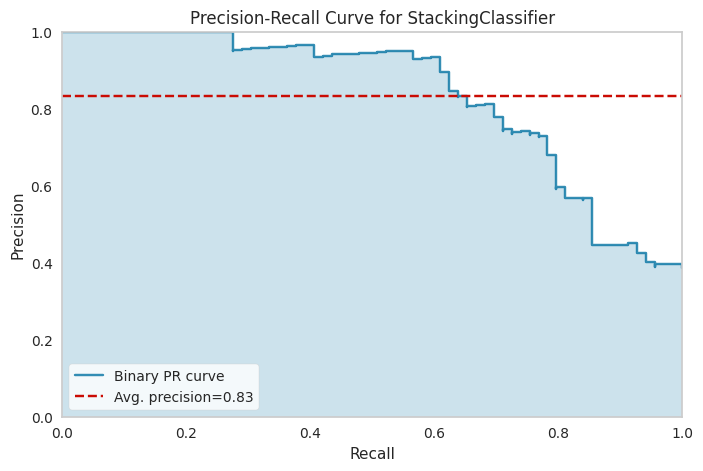

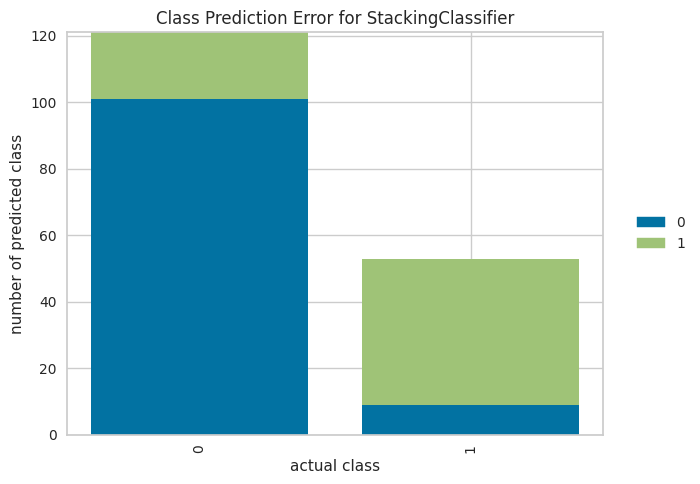

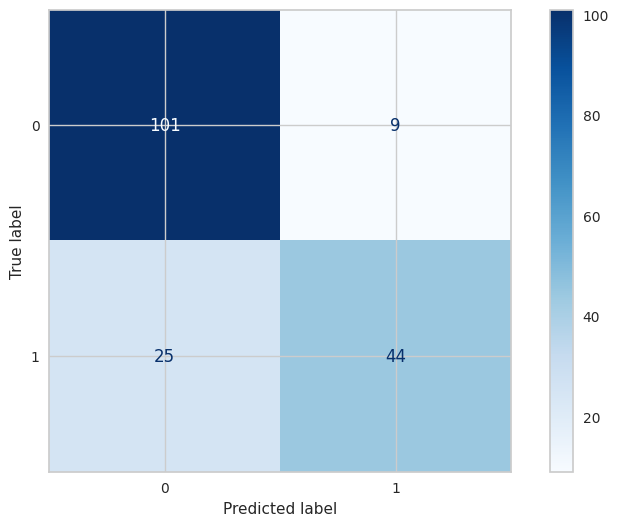

In [193]:
# Precision-Recall Curve
plt.figure(figsize=(8, 5))
viz = PrecisionRecallCurve(STACK_grid_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Errors
plt.figure(figsize=(8, 5))
visualizer = ClassPredictionError(STACK_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(STACK_grid_model, X_test, y_test, cmap='Blues')

### Prediction with Best HyperParameters and Submission

In [191]:
rf_best = RandomForestClassifier(n_estimators=100, 
                                 max_depth=None, 
                                 random_state=101)

ada_best = AdaBoostClassifier(n_estimators=50, random_state=101)

gb_best = GradientBoostingClassifier(n_estimators=200, 
                                     learning_rate=0.01, 
                                     random_state=101)

xgb_best = XGBClassifier(n_estimators=100, 
                         learning_rate=0.1, 
                         use_label_encoder=False, 
                         eval_metric='logloss', 
                         random_state=101)

# Meta model
meta_model = LogisticRegression(random_state=101)




# Recreate the StackingClassifier with the best base models
STACK_best_model = StackingClassifier(estimators=[
                                                ('rf', rf_best),
                                                ('ada', ada_best),
                                                ('gb', gb_best),
                                                ('xgb', xgb_best)
                                                ], 
                                     final_estimator=meta_model, 
                                     cv=5,
                                     n_jobs=-1,
                                     verbose=1)

# Fit the best stacking model on the training data
STACK_best_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=101)),
                               ('ada', AdaBoostClassifier(random_state=101)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=200,
                                                           random_state=101)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              d...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=101, ...))],
                   final_estimator=LogisticRegression(random_state=101),
                   n_jobs=-1, verbose=1)

In [190]:
# Submission with the best model using the Submission Test Data
submit_STACK = STACK_best_model.predict(submission_test)

STACK_best_acc = accuracy_score(gender_submission['Survived'].values, submit_STACK)

print('STACK_best_model_accuracy score with submission prediction: ',STACK_best_acc)

STACK_best_model_accuracy score with submission prediction:  0.9066985645933014


<a id='comparing-models'></a>
## Comparing All the Models

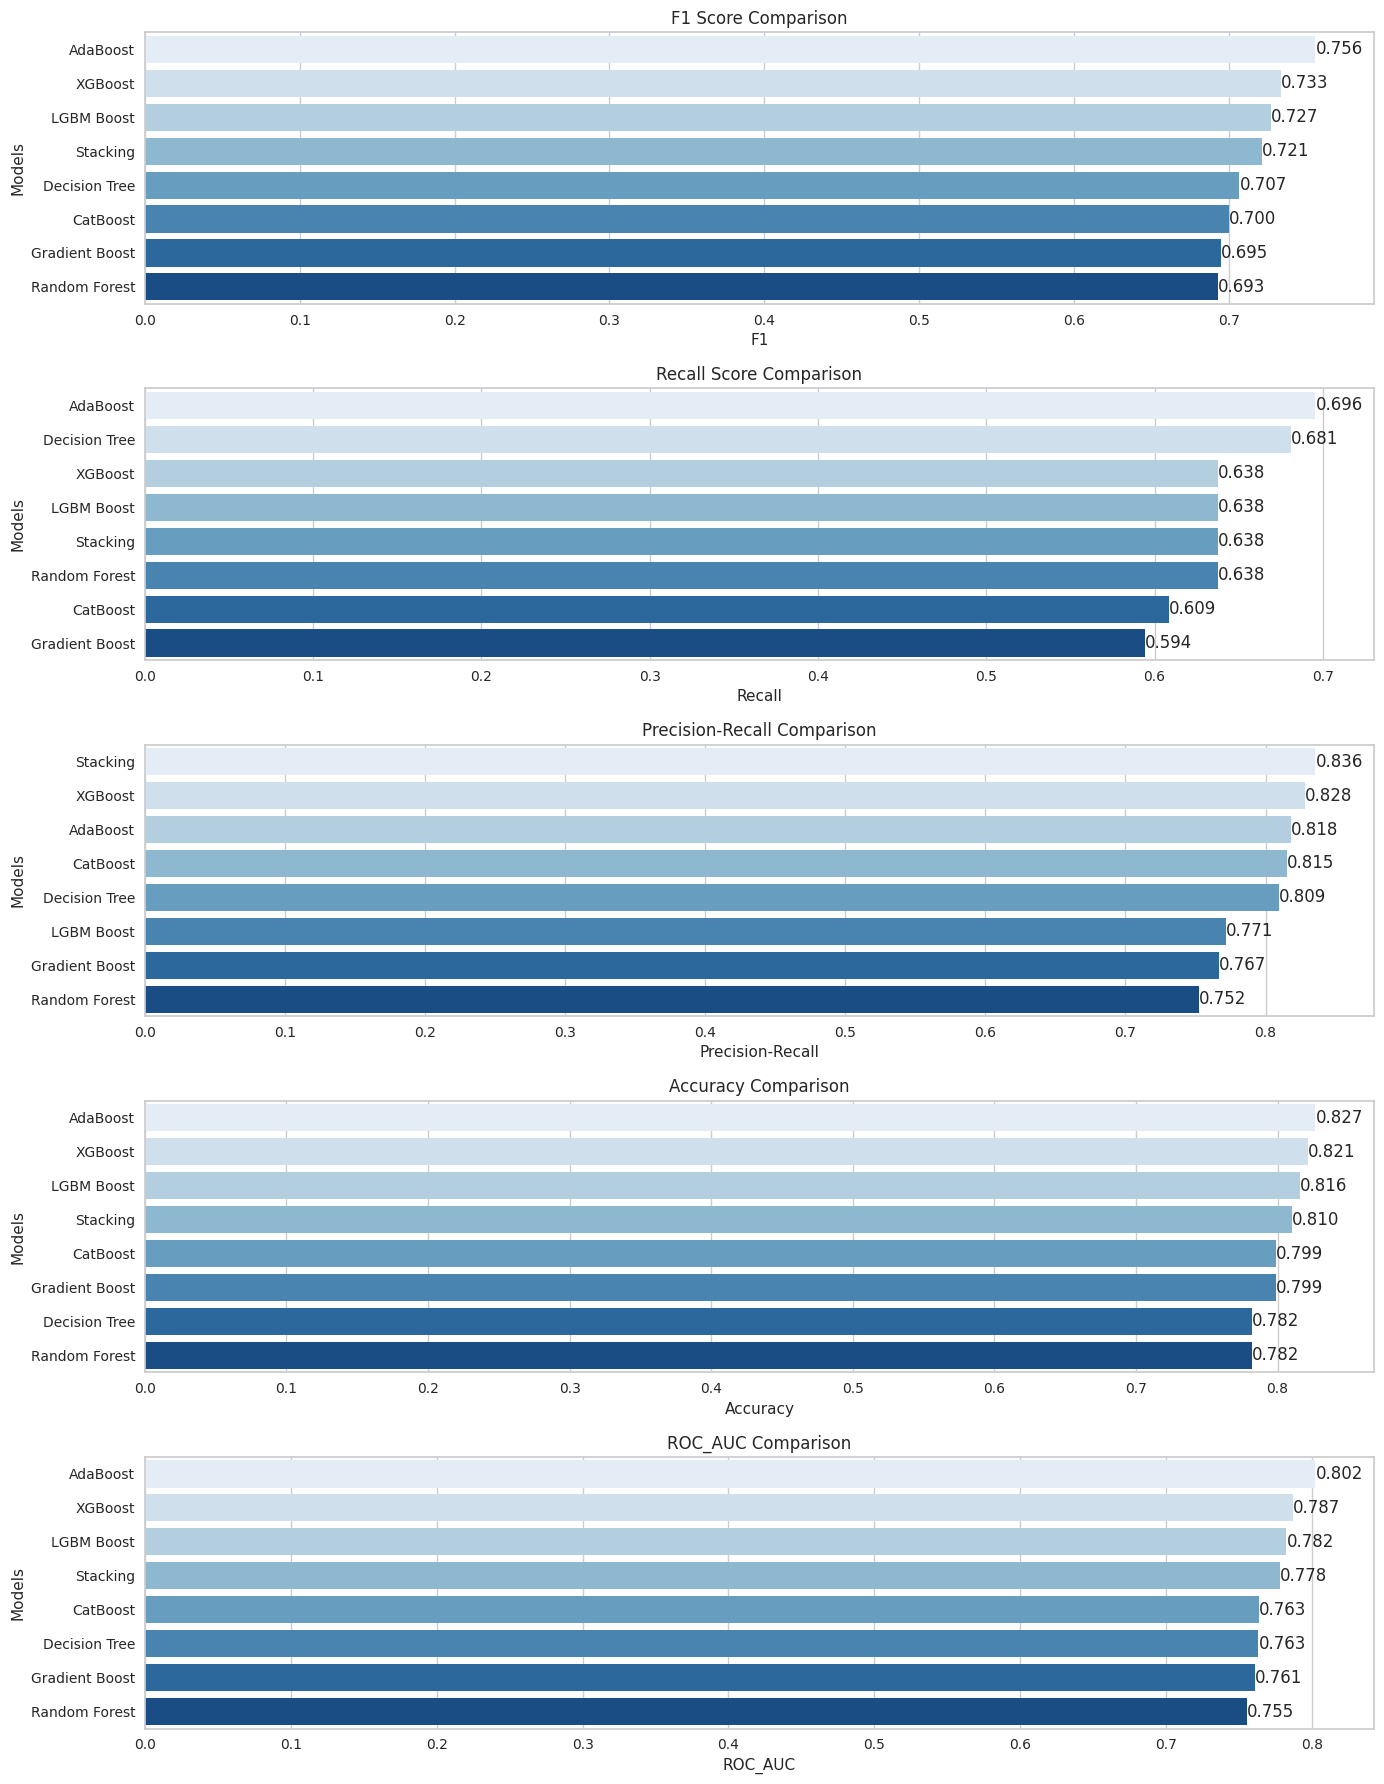

In [186]:
# F1 - Recall Scores

compare = pd.DataFrame({
    "Models": ["Decision Tree", "Random Forest", "AdaBoost", "Gradient Boost", "XGBoost", "LGBM Boost", "CatBoost", "Stacking"],
    "F1": [DTC_grid_f1, RFC_grid_f1, ADA_grid_f1, GRB_grid_f1, XGB_grid_f1, LGBM_grid_f1, CATB_grid_f1,STACK_grid_f1],
    "Recall": [DTC_grid_recall, RFC_grid_recall, ADA_grid_recall, GRB_grid_recall, XGB_grid_recall, LGBM_grid_recall, CATB_grid_recall,STACK_grid_recall],
    "Accuracy": [DTC_grid_accuracy_test, RFC_grid_accuracy_test, ADA_grid_accuracy_test, GRB_grid_accuracy_test, XGB_grid_accuracy_test, LGBM_grid_accuracy_test, CATB_grid_accuracy_test,STACK_grid_accuracy_test],
    "Precision-Recall": [DTC_prc, RFC_prc, ADA_prc, GRB_prc, XGB_prc, LGBM_prc, CATB_prc,STACK_prc],
    "ROC_AUC": [DTC_grid_auc, RFC_grid_auc, ADA_grid_auc, GRB_grid_auc, XGB_grid_auc, LGBM_grid_auc, CATB_grid_auc,STACK_grid_auc]
})

# Labels
def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha='left',
                va='center')

    
#Plot
plt.figure(figsize=(14,18))

# F1 Score 
plt.subplot(511)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Models", data=compare, palette="Blues")
labels(ax)
plt.title("F1 Score Comparison")

# Recall Score 
plt.subplot(512)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Models", data=compare, palette="Blues")
labels(ax)
plt.title("Recall Score Comparison")

# Precision-Recall Score 
plt.subplot(513)
compare = compare.sort_values(by="Precision-Recall", ascending=False)
ax = sns.barplot(x="Precision-Recall", y="Models", data=compare, palette="Blues")
labels(ax)
plt.title("Precision-Recall Comparison")

# Accuracy 
plt.subplot(514)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Models", data=compare, palette="Blues")
labels(ax)
plt.title("Accuracy Comparison")

# ROC_AUC Score 
plt.subplot(515)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax = sns.barplot(x="ROC_AUC", y="Models", data=compare, palette="Blues")
labels(ax)
plt.title("ROC_AUC Comparison")


plt.tight_layout()
plt.show()

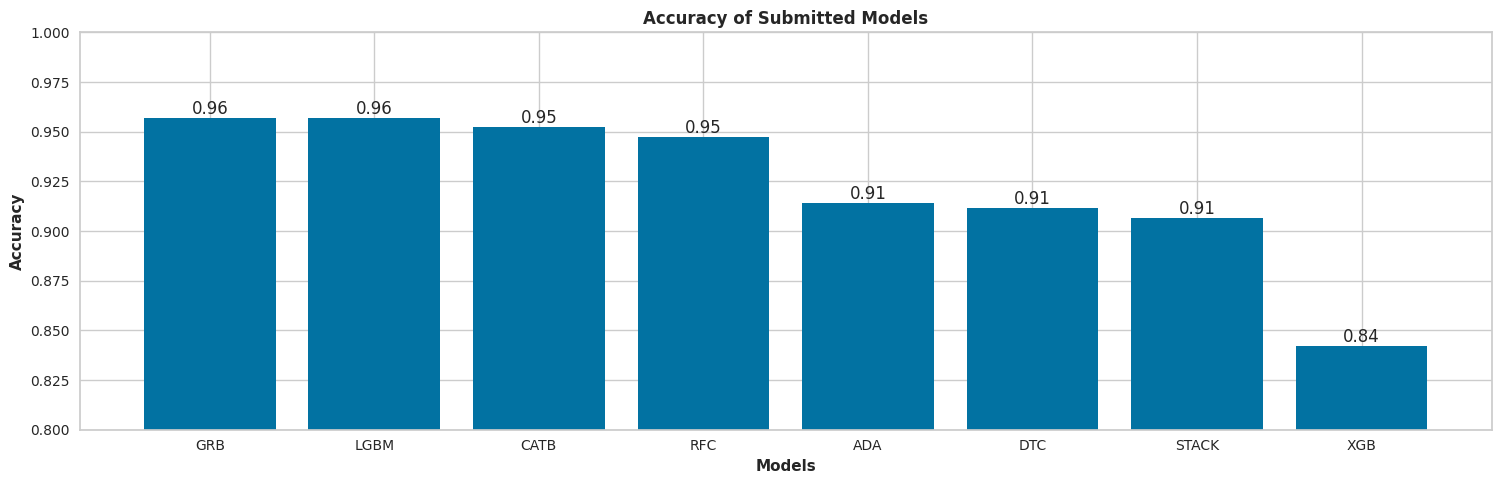

In [187]:
# Submited Models Accuracy Scores
accuracy_dict = {
    'DTC': DTC_best_acc,
    'RFC': RFC_best_acc,
    'ADA': ADA_best_acc,
    'GRB': GRB_best_acc,
    'XGB': XGB_best_acc,
    'LGBM': LGBM_best_acc,
    'CATB': CATB_best_acc,
    'STACK': STACK_best_acc
}

sorted_accuracy_dict = dict(sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True))


# Plotting accuracy scores
plt.figure(figsize=(15, 5))
bars = plt.bar(list(sorted_accuracy_dict.keys()), list(sorted_accuracy_dict.values()))

# Adding annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy of Submitted Models', fontweight='bold')
plt.tight_layout()
plt.ylim(0.8, 1)
plt.show()

<a id='final-model'></a>
## Final Model and Submission

In [188]:
# Initialize the LGBM with the best parameters
LGBM_best_model = LGBMClassifier(
                    boosting_type='dart',
                    colsample_bytree=0.6,
                    learning_rate=0.05,
                    max_depth=2,
                    n_estimators=150,
                    reg_alpha=0,
                    subsample=0.6,
                    random_state=101 
)
# Fit the model to your training data
LGBM_best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028


LGBMClassifier(boosting_type='dart', colsample_bytree=0.6, learning_rate=0.05,
               max_depth=2, n_estimators=150, random_state=101, reg_alpha=0,
               subsample=0.6)

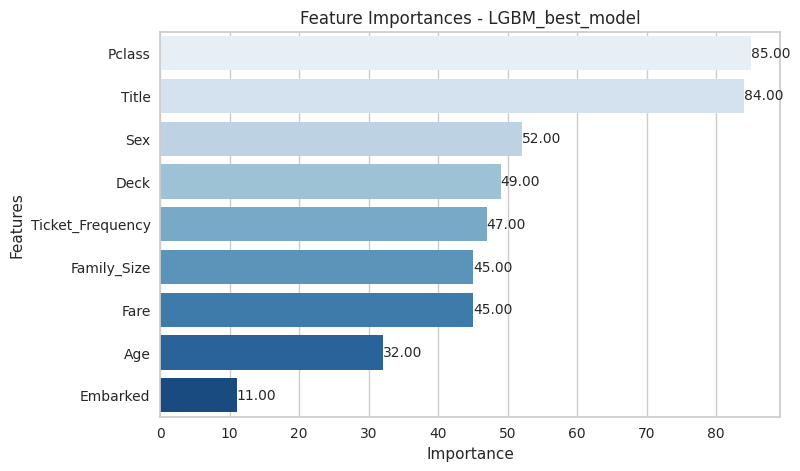

In [189]:
# Feature Importance
plot_feature_importance(LGBM_best_model, submission_test,'LGBM_best_model') 

In [185]:
# FINAL SUBMISSION with LGBM_best_model

final_submission = pd.Series(LGBM_best_model.predict(submission_test), name = "Survived").astype(int)
final_result = pd.concat([test_PassengerId, final_submission],axis = 1)

final_result

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [ ]:
final_result.to_csv("titanic_lgbm.csv", index = False)

<a id='conclusion'></a>
## Conclusion

In this project, we used AdaBoost, Gradient Boosting, XGBoost, Stacking, Random Forest, Decision Tree, CatBoost, and LGBM Boost models to predict survival outcomes on the Titanic dataset, which is inherently imbalanced.

- Although initial focus was on Recall and Precision-Recall scores due to the nature of imbalanced datasets, the competition prioritizes **Accuracy** as the key metric.
-  The results were derived from both cross-validation on the training data and a separate evaluation using an example submission dataset. Here, we focus on comparing AdaBoost and LGBM Boost to determine the most suitable model.

### Model Selection Based on Results:

- **Strong Overall Performance**: LGBM Boost has a solid accuracy score of 0.821, making it highly reliable. While AdaBoost slightly edges out in accuracy at 0.827, LGBM Boost offers a better balance across key metrics like Precision-Recall and ROC AUC. This means LGBM Boost is not just accurate but also more consistent in identifying survivors correctly while minimizing errors.

- **Balanced Metrics**: LGBM Boost's performance across various metrics shows that it's not only good at making correct predictions but also at maintaining a balance between catching true survivors and avoiding false positives. This balance makes it a more robust and dependable model.

### Metric Importance:

- **In the context of this competition**, accuracy is the critical metric because it measures the percentage of passengers correctly classified, aligning with the competition's objective to maximize correct predictions.

- **In typical scenarios with imbalanced datasets**, Recall and Precision-Recall might be prioritized, especially when the minority class represents high-risk cases (e.g., survivors, high-risk patients). In such cases, focusing on recall reduces the risk of missing critical instances, even at the cost of some accuracy.

### Business Impact:

  - For the competition, prioritizing accuracy leads to higher overall correct predictions, aligning with the evaluation criteria. However, in real-world applications where missing key cases could be costly, models might need to focus more on recall. This ensures critical cases are identified, leading to better decision-making and resource allocation.

  - **Balanced Decision-Making**: By selecting LGBM Boost, the model provides a reliable framework for making well-rounded decisions, particularly in scenarios where both accuracy and the balance between precision and recall are important. This could be crucial in applications such as customer retention, fraud detection, or medical diagnostics, where misclassifications can have significant consequences.

- **Optimizing Outcomes**: The balanced performance of LGBM Boost ensures that the model can effectively capture the right cases (survivors) without over-committing to false positives, leading to more informed and effective resource allocation and decision-making.

### Conclusion

**LGBM Boost** is the final model of choice due to its strong accuracy and balanced performance across other critical metrics. While AdaBoost offers slightly higher accuracy, LGBM Boost provides a more comprehensive and reliable performance profile, making it the optimal choice for predicting survival outcomes on the Titanic dataset and for broader applications where balanced model performance is crucial.

![](https://i.pinimg.com/originals/33/8e/c5/338ec5a6964c3cb1778b4ad6dc4da88e.gif)

<h3 align="center">If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion! 💬</h3>

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<p align="right">
  Duygu Jones | Data Scientist | 2024
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>